In [ ]:
## Synthetic Minority Over-Sampling Technique for Regression with Gaussian Noise
# Instalação a versão mais adequada para versão python em uso.
#! pip install smogn  
#! pip install imblearn
#! pip install GitPython
#! pip install numba
#! pip install cudatoolkit
#pip install tensorflow-gpu
#conda update numba
#conda update cudatoolkit
#pip install memory_profiler
#! pip install pandoc
#pip install ipykernel
#conda install -c glemaitre imbalanced-learn

In [1]:
#% pip install smogn  # Instalação a versão mais adequada para versão python em uso.
# importação das bibliotecas que serão utilizadas: (pandas, sklearn, etc)
# import smogn
# import numba.cuda  # Para uso de GPU
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import pylab as pl 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
import gc # Garbage collector, para recuperar memória após carregar o dataset inicial
import seaborn as sns # biblioteca para gráficos
from matplotlib import pyplot
from numpy import where
from numpy import mean
from sklearn import metrics
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import chi2
from sklearn.utils import resample
# from sklearn.linear_model.LogisticRegression import LogisticRegression.Classifier 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import average_precision_score
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTEENN

import time
# from patsy import dmatriceskn
#from playsound import playsound
# permitir que gráficos possam ser impressos dentro do caderno jupyter - Sempre colocar nos cadernos
%matplotlib inline


In [ ]:
# voltarvoltar
# O pacote shapash não funciona com versões do scikit-learn superiores a 1.3.0

# Obtém a data e hora local Exibe o dia e hora atual
local_time = time.localtime()
print("Data atual:", time.strftime("%Y-%m-%d", local_time))
print("Hora atual:", time.strftime("%H:%M:%S", local_time))

In [ ]:
#importação dos dados 1/2  Importar DFFull_Final.csv 
import io
df = pd.read_csv ("C:\DADOS\DFFull_Final.csv")
#df = pd.read_csv ("C:\DADOS\DFFull_Final2.csv") arquivo sem 
df.shape
# df.dtypes
# df.describe()
#df.info(verbose=True)

In [48]:
# categóricas para dummies
print("Variáveis iniciais (numéricas e categóricas)",df.shape)
# Modificar as variáveis objetos para categóricas
df["C_CODIGO_CARGO"] = df["CODIGO_CARGO2"].astype('category')
df["C_NUMERO_PARTIDO"] = df["NUMERO_PARTIDO2"].astype('category')
df["C_COD_SITUACAO_CANDIDATURA"] = df["COD_SITUACAO_CANDIDATURA2"].astype('category')
df["C_COD_GRAU_INSTRUCAO"] = df["COD_GRAU_INSTRUCAO2"].astype('category')
df["C_CODIGO_ESTADO_CIVIL"] = df["CODIGO_ESTADO_CIVIL2"].astype('category')
df["C_COD_SIT_TOT_TURNO"] = df["COD_SIT_TOT_TURNO2"].astype('category')
df["C_TIPO_SOCIO"] = df["TIPO_SOCIO2"].astype('category')
df["C_CNAE_FISCAL"] = df["CNAE_FISCAL2"].astype('category')
df["C_COD_NATUREZA_JURIDICA"] = df["COD_NATUREZA_JURIDICA2"].astype('category')
df["C_COD_SITUACAO_CADASTRAL"] = df["COD_SITUACAO_CADASTRAL2"].astype('category')
df["C_COD_PORTE_EMPRESA"] = df["COD_PORTE_EMPRESA2"].astype('category')
df["C_COD_OPCAO_SIMPLES"] = df["COD_OPCAO_SIMPLES2"].astype('category')
df["C_COD_QUALIFICACAO_SOCIO"] = df["COD_QUALIFICACAO_SOCIO2"].astype('category')
# Exclusão das variáveis objeto que foram transformadas em categóricas
df.drop('CODIGO_CARGO2', inplace=True, axis=1)
df.drop('NUMERO_PARTIDO2', inplace=True, axis=1)
df.drop('COD_SITUACAO_CANDIDATURA2', inplace=True, axis=1)
df.drop('COD_GRAU_INSTRUCAO2', inplace=True, axis=1)
df.drop('CODIGO_ESTADO_CIVIL2', inplace=True, axis=1)
df.drop('COD_SIT_TOT_TURNO2', inplace=True, axis=1)
df.drop('TIPO_SOCIO2', inplace=True, axis=1)
df.drop('CNAE_FISCAL2', inplace=True, axis=1)
df.drop('COD_NATUREZA_JURIDICA2', inplace=True, axis=1)
df.drop('COD_SITUACAO_CADASTRAL2', inplace=True, axis=1)
df.drop('COD_PORTE_EMPRESA2', inplace=True, axis=1)
df.drop('COD_OPCAO_SIMPLES2', inplace=True, axis=1)
df.drop('COD_QUALIFICACAO_SOCIO2', inplace=True, axis=1)
# Criação das variáveis Dummies
DC_CODIGO_CARGO=pd.get_dummies(df['C_CODIGO_CARGO'])
DC_NUMERO_PARTIDO=pd.get_dummies(df['C_NUMERO_PARTIDO'])
DC_COD_SITUACAO_CANDIDATURA=pd.get_dummies(df['C_COD_SITUACAO_CANDIDATURA'])
DC_COD_GRAU_INSTRUCAO=pd.get_dummies(df['C_COD_GRAU_INSTRUCAO'])
DC_CODIGO_ESTADO_CIVIL=pd.get_dummies(df['C_CODIGO_ESTADO_CIVIL'])
DC_COD_SIT_TOT_TURNO=pd.get_dummies(df['C_COD_SIT_TOT_TURNO'])
DC_TIPO_SOCIO=pd.get_dummies(df['C_TIPO_SOCIO'])
DC_CNAE_FISCAL=pd.get_dummies(df['C_CNAE_FISCAL'])
DC_COD_NATUREZA_JURIDICA=pd.get_dummies(df['C_COD_NATUREZA_JURIDICA'])
DC_COD_SITUACAO_CADASTRAL=pd.get_dummies(df['C_COD_SITUACAO_CADASTRAL'])
DC_COD_PORTE_EMPRESA=pd.get_dummies(df['C_COD_PORTE_EMPRESA'])
DC_COD_OPCAO_SIMPLES=pd.get_dummies(df['C_COD_OPCAO_SIMPLES'])
DC_COD_QUALIFICACAO_SOCIO=pd.get_dummies(df['C_COD_QUALIFICACAO_SOCIO'])
# excluir as categóricas inciais que serviram para criar os dataframes dummies adicionados ao DataFrame
df.drop('C_CODIGO_CARGO', inplace=True, axis=1)
df.drop('C_NUMERO_PARTIDO', inplace=True, axis=1)
df.drop('C_COD_SITUACAO_CANDIDATURA', inplace=True, axis=1)
df.drop('C_COD_GRAU_INSTRUCAO', inplace=True, axis=1)
df.drop('C_CODIGO_ESTADO_CIVIL', inplace=True, axis=1)
df.drop('C_COD_SIT_TOT_TURNO', inplace=True, axis=1)
df.drop('C_TIPO_SOCIO', inplace=True, axis=1)
df.drop('C_CNAE_FISCAL', inplace=True, axis=1)
df.drop('C_COD_NATUREZA_JURIDICA', inplace=True, axis=1)
df.drop('C_COD_SITUACAO_CADASTRAL', inplace=True, axis=1)
df.drop('C_COD_PORTE_EMPRESA', inplace=True, axis=1)
df.drop('C_COD_OPCAO_SIMPLES', inplace=True, axis=1)
df.drop('C_COD_QUALIFICACAO_SOCIO', inplace=True, axis=1)
# Juntar as variáveis dummies e depois colocar o target na última coluna com uso de df3.
df = pd.concat([df,DC_CODIGO_CARGO,DC_NUMERO_PARTIDO,DC_COD_SITUACAO_CANDIDATURA,DC_COD_GRAU_INSTRUCAO,DC_CODIGO_ESTADO_CIVIL,DC_COD_SIT_TOT_TURNO,DC_TIPO_SOCIO,DC_CNAE_FISCAL,DC_COD_NATUREZA_JURIDICA,DC_COD_SITUACAO_CADASTRAL,DC_COD_PORTE_EMPRESA,DC_COD_OPCAO_SIMPLES,DC_COD_QUALIFICACAO_SOCIO], axis=1)
# modificação da posição do target do início para o final do dataframe 
df3=pd.concat([df[df.columns[1:]],df[df.columns[0]]], axis=1)
df=df3
#Exclusão da variável redundante de dummy que gera efeito de multicolinearidade >>> redução para X-1 variáveis.
df.drop('CargoEleitoral0', inplace=True, axis=1)
df.drop('NUMPARTIDO00', inplace=True, axis=1)
df.drop('SITUACANDIDATURA0', inplace=True, axis=1)
df.drop('GrauInst0', inplace=True, axis=1)
df.drop('EstadoCivil0', inplace=True, axis=1)
df.drop('SITTURNO0', inplace=True, axis=1)
df.drop('TPSOCIO0', inplace=True, axis=1)
df.drop('CNAE0000000', inplace=True, axis=1)
df.drop('NATURJURID0000', inplace=True, axis=1)
df.drop('SITUACADASTRAL00', inplace=True, axis=1)
df.drop('PORTEEMPRESA00', inplace=True, axis=1)
df.drop('OPCAO_SIMPLES00', inplace=True, axis=1)
df.drop('QUALIFSOCIO00', inplace=True, axis=1)
print("Variáveis numéricas e binárias criadas das variáveis categóricas - dummies)",df.shape)

Variáveis iniciais (numéricas e categóricas) (587656, 397)


KeyError: 'CODIGO_CARGO2'

In [ ]:
# df.head()
# df.dtypes
# df.info(verbose=True)

In [ ]:
# import io
#df.to_csv('DFdummies.csv') 
# files.download('DFdummies.csv')

In [ ]:
# printing the number of samples
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))

In [ ]:
# NORMALIZAÇÃO
QTCG_SIGRHmax=max(df.QTCG_SIGRH)
QTCG_SIAPEmax=max(df.QTCG_SIAPE)
QTCG_SIGRHSIAPEmax=max(df.QTCG_SIGRHSIAPE)
QTFCSIGRHmax=max(df.QTFCSIGRH)
QTFCSIAPEmax=max(df.QTFCSIAPE)
QTFCSIGRHSIAPEmax=max(df.QTFCSIGRHSIAPE)
df['QTCG_SIGRHe'] = ((df['QTCG_SIGRH'])/QTCG_SIGRHmax)
df['QTCG_SIAPEe'] = ((df['QTCG_SIAPE'])/QTCG_SIAPEmax)
df['QTCG_SIGRHSIAPEe'] = ((df['QTCG_SIGRHSIAPE'])/QTCG_SIGRHSIAPEmax)
df['QTFCSIGRHe'] = ((df['QTFCSIGRH'])/QTFCSIGRHmax)
df['QTFCSIAPEe'] = ((df['QTFCSIAPE'])/QTFCSIAPEmax)
df['QTFCSIGRHSIAPEe'] = ((df['QTFCSIGRHSIAPE'])/QTFCSIGRHSIAPEmax)
df.drop('QTCG_SIGRH', inplace=True, axis=1)
df.drop('QTCG_SIAPE', inplace=True, axis=1)
df.drop('QTCG_SIGRHSIAPE', inplace=True, axis=1)
df.drop('QTFCSIGRH', inplace=True, axis=1)
df.drop('QTFCSIAPE', inplace=True, axis=1)
df.drop('QTFCSIGRHSIAPE', inplace=True, axis=1)
maxvalDSoc=max(df.DiasNaSociedade2)
df['DiasNaSoc'] = ((df['DiasNaSociedade2'])/maxvalDSoc)
max_valueSB = max(df.SalBrutoF2)
min_valueSB = min(df.SalBrutoF2)
DifferenceSB = (max_valueSB-min_valueSB)
df['SalBrutoF'] = ((df['SalBrutoF2']-min_valueSB)/DifferenceSB)
max_valueSL = max(df.SaliqF2)
min_valueSL = min(df.SaliqF2)
DifferenceSL = (max_valueSL-min_valueSL)
df['SaliqF'] = ((df['SaliqF2']-min_valueSL)/DifferenceSL)
df['PERCENTUAL_CAPITAL_SOCIAL'] = ((df['PERCENTUAL_CAPITAL_SOCIAL1'])/100)
df['QTD_CNAES'] = ((df['QTD_CNAES1'])/10)
df['TARGET_CORRUPCAO1'] = (df['TARGET_CORRUPCAO']) 
# modificação da posição do target do início para o final do dataframe
##################################################################################     df.drop('SalBrutoF2', inplace=True, axis=1)
df.drop('DiasNaSociedade2', inplace=True, axis=1)
df.drop('PERCENTUAL_CAPITAL_SOCIAL1', inplace=True, axis=1)
df.drop('QTD_CNAES1', inplace=True, axis=1)
df.drop('TARGET_CORRUPCAO', inplace=True, axis=1)
df['TARGET_CORRUPCAO'] = (df['TARGET_CORRUPCAO1'])
df.drop('TARGET_CORRUPCAO1', inplace=True, axis=1)
df.drop('SalBrutoF2', inplace=True, axis=1)
df.drop('SaliqF2', inplace=True, axis=1)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))
if ram_gb < 20:
  print('To enable a high-RAM runtime, select the Runtime > "Change runtime type"')
  print('menu, and then select High-RAM in the Runtime shape dropdown. Then, ')
  print('re-execute this cell.')
else:
  print('You are using a high-RAM runtime!')

In [ ]:
# disponível em https://stackoverflow.com/questions/22306341/python-sklearn-how-to-calculate-p-values
# Identificação do P-values
scores, pvalues = chi2(X, y)
print(pvalues)

In [ ]:
#quantidade de atributos pelo pvalue
len(pvalues)

In [ ]:
for i in range (0,len(pvalues-1)):
  print(scores[i]),print(pvalues[i])

In [ ]:
# exportação do p-value
#pvalue1 = pvalues()
#pvalue1.to_csv('pvalue1.csv') 
#files.download('pvalue1.csv')

In [ ]:
print(scores[0]) 

In [ ]:
df.shape

In [ ]:
# Liberar a memória utilizada pelo atual dataset:
#del dfx0 # Apaga a referência ao objeto , mas isso não remove imediatamente o objeto da memória
del dfx0
del dfx1 
del dfx2
del dfx3
gc.collect() #Força a execução do coletor de lixo, remove da memória objetos que não têm mais referências

In [ ]:
# Atribuição do primeiro dataset - sem redução de dimensionalidade
dfx0=df
# Exportando o DataFrame para CSV
caminhox0 = "D:/DADOS/dfx0.csv"
dfx0.to_csv(caminhox0, index=False, encoding='utf-8')  # index=False para não salvar o índice
print(f"Arquivo CSV salvo em: {caminhox0}")

In [ ]:
print(f"shape df: {df.shape}")
print(f"shape dfx0: {dfx0.shape}")

In [ ]:
# Liberar a memória utilizada pelo atual dataset:
del dfx0
gc.collect() #Força a execução do coletor de lixo, remove da memória objetos que não têm mais referências

In [ ]:
# grafico do map de correlação - sem exclusões de correlação
correlacao = df.corr()
sns.heatmap(correlacao)

In [ ]:
pyplot.figure(figsize=(12, 9))
sns.heatmap(correlacao)

In [ ]:
# ETAPA DE EXCLUSÃO DE ATRIBUTOS COM CORRELAÇÃO MAIOR QUE .80
# disponivel em https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf
# correlacao = df.corr()
columns = np.full((correlacao.shape[0],), True, dtype=bool)
for i in range(correlacao.shape[0]):
    for j in range(i+1, correlacao.shape[0]):
        if correlacao.iloc[i,j] >= 0.8:
            if columns[j]:
                columns[j] = False
selected_columns = df.columns[columns]
df = df[selected_columns]
df.head()
  # The dataset has only those columns with correlation less than 0.9

In [ ]:
df.shape

In [ ]:
# Atribuição do segundo dataset - com redução de dimensionalidade dos atributos de correção > 0.8
dfx1=df
# Exportando o DataFrame para CSV
caminhox1 = "D:/DADOS/dfx1.csv"
dfx1.to_csv(caminhox1, index=False, encoding='utf-8')  # index=False para não salvar o índice
print(f"Arquivo CSV salvo em: {caminhox1}")

In [ ]:
print(f"shape df: {df.shape}")
print(f"shape dfx1: {dfx1.shape}")

In [ ]:
# Liberar a memória utilizada pelo atual dataset:
del dfx1
gc.collect()

In [49]:
# ETAPA DE EXCLUSÃO DE ATRIBUTOS COM VARIANCIA MENOR QUE 0.00001
df.drop('CEPIM', inplace=True, axis=1) # variancia zero
df.drop('SITUACANDIDATURA16', inplace=True, axis=1)
df.drop('CNAE0119902', inplace=True, axis=1)
df.drop('CNAE0119903', inplace=True, axis=1)
df.drop('CNAE0119906', inplace=True, axis=1)
df.drop('CNAE0119907', inplace=True, axis=1)
df.drop('CNAE0133403', inplace=True, axis=1)
df.drop('CNAE0133404', inplace=True, axis=1)
df.drop('CNAE0141502', inplace=True, axis=1)
df.drop('CNAE0151203', inplace=True, axis=1)
df.drop('CNAE0155502', inplace=True, axis=1)
df.drop('CNAE0155503', inplace=True, axis=1)
df.drop('CNAE0159803', inplace=True, axis=1)
df.drop('CNAE0220906', inplace=True, axis=1)
df.drop('CNAE0220999', inplace=True, axis=1)
df.drop('CNAE0311604', inplace=True, axis=1)
df.drop('CNAE0321301', inplace=True, axis=1)
df.drop('CNAE0322107', inplace=True, axis=1)
df.drop('CNAE0810005', inplace=True, axis=1)
df.drop('CNAE0810007', inplace=True, axis=1)
df.drop('CNAE0891600', inplace=True, axis=1)
df.drop('CNAE0893200', inplace=True, axis=1)
df.drop('CNAE0899102', inplace=True, axis=1)
df.drop('CNAE1012103', inplace=True, axis=1)
df.drop('CNAE1042200', inplace=True, axis=1)
df.drop('CNAE1062700', inplace=True, axis=1)
df.drop('CNAE1071600', inplace=True, axis=1)
df.drop('CNAE1093701', inplace=True, axis=1)
df.drop('CNAE1099602', inplace=True, axis=1)
df.drop('CNAE1122499', inplace=True, axis=1)
df.drop('CNAE1311100', inplace=True, axis=1)
df.drop('CNAE1340502', inplace=True, axis=1)
df.drop('CNAE1421500', inplace=True, axis=1)
df.drop('CNAE1510600', inplace=True, axis=1)
df.drop('CNAE1722200', inplace=True, axis=1)
df.drop('CNAE1733800', inplace=True, axis=1)
df.drop('CNAE1741901', inplace=True, axis=1)
df.drop('CNAE1749400', inplace=True, axis=1)
df.drop('CNAE1830002', inplace=True, axis=1)
df.drop('CNAE1830003', inplace=True, axis=1)
df.drop('CNAE2012600', inplace=True, axis=1)
df.drop('CNAE2013401', inplace=True, axis=1)
df.drop('CNAE2121102', inplace=True, axis=1)
df.drop('CNAE2122000', inplace=True, axis=1)
df.drop('CNAE2311700', inplace=True, axis=1)
df.drop('CNAE2330304', inplace=True, axis=1)
df.drop('CNAE2349499', inplace=True, axis=1)
df.drop('CNAE2391501', inplace=True, axis=1)
df.drop('CNAE2399101', inplace=True, axis=1)
df.drop('CNAE2411300', inplace=True, axis=1)
df.drop('CNAE2423702', inplace=True, axis=1)
df.drop('CNAE2424502', inplace=True, axis=1)
df.drop('CNAE2439300', inplace=True, axis=1)
df.drop('CNAE2441501', inplace=True, axis=1)
df.drop('CNAE2441502', inplace=True, axis=1)
df.drop('CNAE2621300', inplace=True, axis=1)
df.drop('CNAE2632900', inplace=True, axis=1)
df.drop('CNAE2640000', inplace=True, axis=1)
df.drop('CNAE2710401', inplace=True, axis=1)
df.drop('CNAE2710402', inplace=True, axis=1)
df.drop('CNAE2710403', inplace=True, axis=1)
df.drop('CNAE2721000', inplace=True, axis=1)
df.drop('CNAE2722801', inplace=True, axis=1)
df.drop('CNAE2722802', inplace=True, axis=1)
df.drop('CNAE2732500', inplace=True, axis=1)
df.drop('CNAE2790202', inplace=True, axis=1)
df.drop('CNAE2815102', inplace=True, axis=1)
df.drop('CNAE2821601', inplace=True, axis=1)
df.drop('CNAE2824102', inplace=True, axis=1)
df.drop('CNAE2854200', inplace=True, axis=1)
df.drop('CNAE2869100', inplace=True, axis=1)
df.drop('CNAE2945000', inplace=True, axis=1)
df.drop('CNAE2949201', inplace=True, axis=1)
df.drop('CNAE3312104', inplace=True, axis=1)
df.drop('CNAE3313901', inplace=True, axis=1)
df.drop('CNAE3314712', inplace=True, axis=1)
df.drop('CNAE3316301', inplace=True, axis=1)
df.drop('CNAE3317102', inplace=True, axis=1)
df.drop('CNAE3520402', inplace=True, axis=1)
df.drop('CNAE4291000', inplace=True, axis=1)
df.drop('CNAE4299501', inplace=True, axis=1)
df.drop('CNAE4312600', inplace=True, axis=1)
df.drop('CNAE4511104', inplace=True, axis=1)
df.drop('CNAE4541204', inplace=True, axis=1)
df.drop('CNAE4542101', inplace=True, axis=1)
df.drop('CNAE4623103', inplace=True, axis=1)
df.drop('CNAE4637103', inplace=True, axis=1)
df.drop('CNAE4637105', inplace=True, axis=1)
df.drop('CNAE4643502', inplace=True, axis=1)
df.drop('CNAE4644302', inplace=True, axis=1)
df.drop('CNAE4645102', inplace=True, axis=1)
df.drop('CNAE4684201', inplace=True, axis=1)
df.drop('CNAE4686901', inplace=True, axis=1)
df.drop('CNAE4689302', inplace=True, axis=1)
df.drop('CNAE4940000', inplace=True, axis=1)
df.drop('CNAE5011401', inplace=True, axis=1)
df.drop('CNAE5022001', inplace=True, axis=1)
df.drop('CNAE5112999', inplace=True, axis=1)
df.drop('CNAE5221400', inplace=True, axis=1)
df.drop('CNAE5231102', inplace=True, axis=1)
df.drop('CNAE6022502', inplace=True, axis=1)
df.drop('CNAE6110899', inplace=True, axis=1)
df.drop('CNAE6141800', inplace=True, axis=1)
df.drop('CNAE6424704', inplace=True, axis=1)
df.drop('CNAE6433600', inplace=True, axis=1)
df.drop('CNAE6434400', inplace=True, axis=1)
df.drop('CNAE6435201', inplace=True, axis=1)
df.drop('CNAE6440900', inplace=True, axis=1)
df.drop('CNAE6530800', inplace=True, axis=1)
df.drop('CNAE6542100', inplace=True, axis=1)
df.drop('CNAE6612601', inplace=True, axis=1)
df.drop('CNAE6612603', inplace=True, axis=1)
df.drop('CNAE6619301', inplace=True, axis=1)
df.drop('CNAE6619303', inplace=True, axis=1)
df.drop('CNAE7319001', inplace=True, axis=1)
df.drop('CNAE8421300', inplace=True, axis=1)
df.drop('CNAE8622400', inplace=True, axis=1)
df.drop('CNAE8650007', inplace=True, axis=1)
df.drop('CNAE8690904', inplace=True, axis=1)
df.drop('CNAE8711505', inplace=True, axis=1)
df.drop('CNAE9102301', inplace=True, axis=1)
df.drop('CNAE9200302', inplace=True, axis=1)
df.drop('CNAE9200399', inplace=True, axis=1)
df.drop('CNAE9412001', inplace=True, axis=1)
df.drop('CNAE9603301', inplace=True, axis=1)
df.drop('CNAE9603302', inplace=True, axis=1)
df.drop('CNAE9609207', inplace=True, axis=1)
df.drop('NATURJURID1104', inplace=True, axis=1)
df.drop('NATURJURID1260', inplace=True, axis=1)
df.drop('NATURJURID2089', inplace=True, axis=1)
df.drop('NATURJURID2178', inplace=True, axis=1)
df.drop('QUALIFSOCIO23', inplace=True, axis=1)
df.drop('QUALIFSOCIO29', inplace=True, axis=1)
df.drop('NUMPARTIDO29', inplace=True, axis=1)
df.drop('SITTURNO1', inplace=True, axis=1)
df.drop('CNAE0116499', inplace=True, axis=1)
df.drop('CNAE0119905', inplace=True, axis=1)
df.drop('CNAE0131800', inplace=True, axis=1)
df.drop('CNAE0133405', inplace=True, axis=1)
df.drop('CNAE0135100', inplace=True, axis=1)
df.drop('CNAE0142300', inplace=True, axis=1)
df.drop('CNAE0153902', inplace=True, axis=1)
df.drop('CNAE0154700', inplace=True, axis=1)
df.drop('CNAE0159801', inplace=True, axis=1)
df.drop('CNAE0161001', inplace=True, axis=1)
df.drop('CNAE0163600', inplace=True, axis=1)
df.drop('CNAE0311601', inplace=True, axis=1)
df.drop('CNAE0322199', inplace=True, axis=1)
df.drop('CNAE0729404', inplace=True, axis=1)
df.drop('CNAE1012102', inplace=True, axis=1)
df.drop('CNAE1013902', inplace=True, axis=1)
df.drop('CNAE1064300', inplace=True, axis=1)
df.drop('CNAE1081301', inplace=True, axis=1)
df.drop('CNAE1099601', inplace=True, axis=1)
df.drop('CNAE1099607', inplace=True, axis=1)
df.drop('CNAE1112700', inplace=True, axis=1)
df.drop('CNAE1122403', inplace=True, axis=1)
df.drop('CNAE1330800', inplace=True, axis=1)
df.drop('CNAE1533500', inplace=True, axis=1)
df.drop('CNAE1610202', inplace=True, axis=1)
df.drop('CNAE1622601', inplace=True, axis=1)
df.drop('CNAE1629302', inplace=True, axis=1)
df.drop('CNAE1741902', inplace=True, axis=1)
df.drop('CNAE1932200', inplace=True, axis=1)
df.drop('CNAE2029100', inplace=True, axis=1)
df.drop('CNAE2073800', inplace=True, axis=1)
df.drop('CNAE2223400', inplace=True, axis=1)
df.drop('CNAE2229302', inplace=True, axis=1)
df.drop('CNAE2320600', inplace=True, axis=1)
df.drop('CNAE2451200', inplace=True, axis=1)
df.drop('CNAE2543800', inplace=True, axis=1)
df.drop('CNAE2592601', inplace=True, axis=1)
df.drop('CNAE2651500', inplace=True, axis=1)
df.drop('CNAE2660400', inplace=True, axis=1)
df.drop('CNAE2670101', inplace=True, axis=1)
df.drop('CNAE2733300', inplace=True, axis=1)
df.drop('CNAE2740601', inplace=True, axis=1)
df.drop('CNAE2759799', inplace=True, axis=1)
df.drop('CNAE2822401', inplace=True, axis=1)
df.drop('CNAE2829199', inplace=True, axis=1)
df.drop('CNAE2833000', inplace=True, axis=1)
df.drop('CNAE3092000', inplace=True, axis=1)
df.drop('CNAE3099700', inplace=True, axis=1)
df.drop('CNAE3211601', inplace=True, axis=1)
df.drop('CNAE3230200', inplace=True, axis=1)
df.drop('CNAE3240003', inplace=True, axis=1)
df.drop('CNAE3250703', inplace=True, axis=1)
df.drop('CNAE3291400', inplace=True, axis=1)
df.drop('CNAE3292202', inplace=True, axis=1)
df.drop('CNAE3311200', inplace=True, axis=1)
df.drop('CNAE3314711', inplace=True, axis=1)
df.drop('CNAE3314715', inplace=True, axis=1)
df.drop('CNAE3520401', inplace=True, axis=1)
df.drop('CNAE4211102', inplace=True, axis=1)
df.drop('CNAE4222702', inplace=True, axis=1)
df.drop('CNAE4399104', inplace=True, axis=1)
df.drop('CNAE4622200', inplace=True, axis=1)
df.drop('CNAE4635403', inplace=True, axis=1)
df.drop('CNAE4636201', inplace=True, axis=1)
df.drop('CNAE4646002', inplace=True, axis=1)
df.drop('CNAE4649403', inplace=True, axis=1)
df.drop('CNAE4649406', inplace=True, axis=1)
df.drop('CNAE4662100', inplace=True, axis=1)
df.drop('CNAE4674500', inplace=True, axis=1)
df.drop('CNAE4681802', inplace=True, axis=1)
df.drop('CNAE4681805', inplace=True, axis=1)
df.drop('CNAE4751202', inplace=True, axis=1)
df.drop('CNAE4789006', inplace=True, axis=1)
df.drop('CNAE5099801', inplace=True, axis=1)
df.drop('CNAE5120000', inplace=True, axis=1)
df.drop('CNAE5250805', inplace=True, axis=1)
df.drop('CNAE5310501', inplace=True, axis=1)
df.drop('CNAE5590602', inplace=True, axis=1)
df.drop('CNAE5912002', inplace=True, axis=1)
df.drop('CNAE6450600', inplace=True, axis=1)
df.drop('CNAE6461100', inplace=True, axis=1)
df.drop('CNAE7420002', inplace=True, axis=1)
df.drop('CNAE7420005', inplace=True, axis=1)
df.drop('CNAE8299701', inplace=True, axis=1)
df.drop('CNAE8599602', inplace=True, axis=1)
df.drop('CNAE8621602', inplace=True, axis=1)
df.drop('CNAE8711504', inplace=True, axis=1)
df.drop('CNAE9002702', inplace=True, axis=1)
df.drop('CNAE9102302', inplace=True, axis=1)
df.drop('CNAE9529103', inplace=True, axis=1)
df.drop('CNAE9601703', inplace=True, axis=1)
df.drop('CNAE9603305', inplace=True, axis=1)
df.drop('CNAE9609205', inplace=True, axis=1)
df.drop('NATURJURID1147', inplace=True, axis=1)
df.drop('NATURJURID1210', inplace=True, axis=1)
df.drop('QUALIFSOCIO04', inplace=True, axis=1)
df.drop('QUALIFSOCIO24', inplace=True, axis=1)
df.drop('NUMPARTIDO21', inplace=True, axis=1)
df.drop('SITTURNO6', inplace=True, axis=1)
df.drop('CNAE0132600', inplace=True, axis=1)
df.drop('CNAE0153901', inplace=True, axis=1)
df.drop('CNAE0162803', inplace=True, axis=1)
df.drop('CNAE0321302', inplace=True, axis=1)
df.drop('CNAE0710301', inplace=True, axis=1)
df.drop('CNAE0729401', inplace=True, axis=1)
df.drop('CNAE1011205', inplace=True, axis=1)
df.drop('CNAE1020102', inplace=True, axis=1)
df.drop('CNAE1122401', inplace=True, axis=1)
df.drop('CNAE1340599', inplace=True, axis=1)
df.drop('CNAE1742701', inplace=True, axis=1)
df.drop('CNAE2052500', inplace=True, axis=1)
df.drop('CNAE2121101', inplace=True, axis=1)
df.drop('CNAE2221800', inplace=True, axis=1)
df.drop('CNAE2319200', inplace=True, axis=1)
df.drop('CNAE2539002', inplace=True, axis=1)
df.drop('CNAE2622100', inplace=True, axis=1)
df.drop('CNAE2740602', inplace=True, axis=1)
df.drop('CNAE2811900', inplace=True, axis=1)
df.drop('CNAE2825900', inplace=True, axis=1)
df.drop('CNAE3011302', inplace=True, axis=1)
df.drop('CNAE3041500', inplace=True, axis=1)
df.drop('CNAE3314713', inplace=True, axis=1)
df.drop('CNAE3314799', inplace=True, axis=1)
df.drop('CNAE3321000', inplace=True, axis=1)
df.drop('CNAE3513100', inplace=True, axis=1)
df.drop('CNAE3701100', inplace=True, axis=1)
df.drop('CNAE3812200', inplace=True, axis=1)
df.drop('CNAE3822000', inplace=True, axis=1)
df.drop('CNAE3900500', inplace=True, axis=1)
df.drop('CNAE4212000', inplace=True, axis=1)
df.drop('CNAE4319300', inplace=True, axis=1)
df.drop('CNAE4541202', inplace=True, axis=1)
df.drop('CNAE4632002', inplace=True, axis=1)
df.drop('CNAE4633802', inplace=True, axis=1)
df.drop('CNAE4634602', inplace=True, axis=1)
df.drop('CNAE4636202', inplace=True, axis=1)
df.drop('CNAE4637106', inplace=True, axis=1)
df.drop('CNAE4641901', inplace=True, axis=1)
df.drop('CNAE4649407', inplace=True, axis=1)
df.drop('CNAE4685100', inplace=True, axis=1)
df.drop('CNAE4687702', inplace=True, axis=1)
df.drop('CNAE5232000', inplace=True, axis=1)
df.drop('CNAE5240101', inplace=True, axis=1)
df.drop('CNAE5250803', inplace=True, axis=1)
df.drop('CNAE5250804', inplace=True, axis=1)
df.drop('CNAE6120599', inplace=True, axis=1)
df.drop('CNAE6423900', inplace=True, axis=1)
df.drop('CNAE6424701', inplace=True, axis=1)
df.drop('CNAE7729203', inplace=True, axis=1)
df.drop('CNAE8299704', inplace=True, axis=1)
df.drop('CNAE8640213', inplace=True, axis=1)
df.drop('CNAE8640214', inplace=True, axis=1)
df.drop('CNAE9001903', inplace=True, axis=1)
df.drop('CNAE9603303', inplace=True, axis=1)
df.drop('CNAE9609206', inplace=True, axis=1)
df.drop('CNAE9900800', inplace=True, axis=1)
df.drop('CNAE0159802', inplace=True, axis=1)
df.drop('CNAE0210108', inplace=True, axis=1)
df.drop('CNAE1063500', inplace=True, axis=1)
df.drop('CNAE5812302', inplace=True, axis=1)

KeyError: "['CEPIM'] not found in axis"

In [ ]:
df.head()

In [ ]:
print(df.shape)

In [50]:
# ETAPA DE EXCLUSÃO DE ATRIBUTOS COM VARIANCIA entre 0.00001 e 0.0001
df.drop('NUMPARTIDO16', inplace=True, axis=1)
df.drop('SITUACANDIDATURA5', inplace=True, axis=1)
df.drop('CNAE0111301', inplace=True, axis=1)
df.drop('CNAE0133410', inplace=True, axis=1)
df.drop('CNAE0133499', inplace=True, axis=1)
df.drop('CNAE0134200', inplace=True, axis=1)
df.drop('CNAE0139306', inplace=True, axis=1)
df.drop('CNAE0152102', inplace=True, axis=1)
df.drop('CNAE0155505', inplace=True, axis=1)
df.drop('CNAE0162801', inplace=True, axis=1)
df.drop('CNAE0810001', inplace=True, axis=1)
df.drop('CNAE0990402', inplace=True, axis=1)
df.drop('CNAE0990403', inplace=True, axis=1)
df.drop('CNAE1012101', inplace=True, axis=1)
df.drop('CNAE1041400', inplace=True, axis=1)
df.drop('CNAE1352900', inplace=True, axis=1)
df.drop('CNAE1412603', inplace=True, axis=1)
df.drop('CNAE1623400', inplace=True, axis=1)
df.drop('CNAE1822901', inplace=True, axis=1)
df.drop('CNAE1830001', inplace=True, axis=1)
df.drop('CNAE1931400', inplace=True, axis=1)
df.drop('CNAE2110600', inplace=True, axis=1)
df.drop('CNAE2391502', inplace=True, axis=1)
df.drop('CNAE2399199', inplace=True, axis=1)
df.drop('CNAE2521700', inplace=True, axis=1)
df.drop('CNAE2532201', inplace=True, axis=1)
df.drop('CNAE2731700', inplace=True, axis=1)
df.drop('CNAE2840200', inplace=True, axis=1)
df.drop('CNAE2941700', inplace=True, axis=1)
df.drop('CNAE2949299', inplace=True, axis=1)
df.drop('CNAE3212400', inplace=True, axis=1)
df.drop('CNAE3250705', inplace=True, axis=1)
df.drop('CNAE3329599', inplace=True, axis=1)
df.drop('CNAE3600602', inplace=True, axis=1)
df.drop('CNAE4311802', inplace=True, axis=1)
df.drop('CNAE4399102', inplace=True, axis=1)
df.drop('CNAE4541201', inplace=True, axis=1)
df.drop('CNAE4621400', inplace=True, axis=1)
df.drop('CNAE4623106', inplace=True, axis=1)
df.drop('CNAE4665600', inplace=True, axis=1)
df.drop('CNAE4679602', inplace=True, axis=1)
df.drop('CNAE4789009', inplace=True, axis=1)
df.drop('CNAE5112901', inplace=True, axis=1)
df.drop('CNAE5211702', inplace=True, axis=1)
df.drop('CNAE5250801', inplace=True, axis=1)
df.drop('CNAE5590603', inplace=True, axis=1)
df.drop('CNAE6499902', inplace=True, axis=1)
df.drop('CNAE6499905', inplace=True, axis=1)
df.drop('CNAE6512000', inplace=True, axis=1)
df.drop('CNAE6520100', inplace=True, axis=1)
df.drop('CNAE6911703', inplace=True, axis=1)
df.drop('CNAE7719501', inplace=True, axis=1)
df.drop('CNAE8299702', inplace=True, axis=1)
df.drop('CNAE8592902', inplace=True, axis=1)
df.drop('CNAE9001905', inplace=True, axis=1)
df.drop('CNAE9329802', inplace=True, axis=1)
df.drop('CNAE9529104', inplace=True, axis=1)
df.drop('CNAE9529106', inplace=True, axis=1)
df.drop('CargoEleitoral10', inplace=True, axis=1)
df.drop('NUMPARTIDO19', inplace=True, axis=1)
df.drop('CNAE0119999', inplace=True, axis=1)
df.drop('CNAE1032599', inplace=True, axis=1)
df.drop('CNAE1061901', inplace=True, axis=1)
df.drop('CNAE1099604', inplace=True, axis=1)
df.drop('CNAE1113502', inplace=True, axis=1)
df.drop('CNAE1354500', inplace=True, axis=1)
df.drop('CNAE1539400', inplace=True, axis=1)
df.drop('CNAE2099199', inplace=True, axis=1)
df.drop('CNAE2219600', inplace=True, axis=1)
df.drop('CNAE2610800', inplace=True, axis=1)
df.drop('CNAE2790299', inplace=True, axis=1)
df.drop('CNAE4623199', inplace=True, axis=1)
df.drop('CNAE4637102', inplace=True, axis=1)
df.drop('CNAE4649410', inplace=True, axis=1)
df.drop('CNAE4684299', inplace=True, axis=1)
df.drop('CNAE4785701', inplace=True, axis=1)
df.drop('CNAE5111100', inplace=True, axis=1)
df.drop('CNAE8650005', inplace=True, axis=1)
df.drop('CNAE8711503', inplace=True, axis=1)
df.drop('CNAE9321200', inplace=True, axis=1)
df.drop('CNAE9329803', inplace=True, axis=1)
df.drop('NATURJURID2259', inplace=True, axis=1)
df.drop('CargoEleitoral9', inplace=True, axis=1)
df.drop('NUMPARTIDO77', inplace=True, axis=1)
df.drop('CNAE0133402', inplace=True, axis=1)
df.drop('CNAE0210107', inplace=True, axis=1)
df.drop('CNAE1529700', inplace=True, axis=1)
df.drop('CNAE2930103', inplace=True, axis=1)
df.drop('CNAE3839401', inplace=True, axis=1)
df.drop('CNAE4651602', inplace=True, axis=1)
df.drop('CNAE4679601', inplace=True, axis=1)
df.drop('CNAE4929903', inplace=True, axis=1)
df.drop('CNAE5590601', inplace=True, axis=1)
df.drop('CNAE6110801', inplace=True, axis=1)
df.drop('CNAE6201502', inplace=True, axis=1)
df.drop('CNAE6612602', inplace=True, axis=1)
df.drop('CNAE6621501', inplace=True, axis=1)
df.drop('CNAE8430200', inplace=True, axis=1)
df.drop('CNAE8730102', inplace=True, axis=1)
df.drop('CNAE9603399', inplace=True, axis=1)
df.drop('NATURJURID1201', inplace=True, axis=1)
df.drop('CNAE0322105', inplace=True, axis=1)
df.drop('CNAE1033301', inplace=True, axis=1)
df.drop('CNAE1111902', inplace=True, axis=1)
df.drop('CNAE1621800', inplace=True, axis=1)
df.drop('CNAE2061400', inplace=True, axis=1)
df.drop('CNAE3104700', inplace=True, axis=1)
df.drop('CNAE3313999', inplace=True, axis=1)
df.drop('CNAE3319800', inplace=True, axis=1)
df.drop('CNAE4520008', inplace=True, axis=1)
df.drop('CNAE6120501', inplace=True, axis=1)
df.drop('CNAE8711501', inplace=True, axis=1)
df.drop('CNAE9609204', inplace=True, axis=1)
df.drop('QUALIFSOCIO63', inplace=True, axis=1)
df.drop('CargoEleitoral5', inplace=True, axis=1)
df.drop('CNAE0111302', inplace=True, axis=1)
df.drop('CNAE0210106', inplace=True, axis=1)
df.drop('CNAE0810099', inplace=True, axis=1)
df.drop('CNAE1020101', inplace=True, axis=1)
df.drop('CNAE1340501', inplace=True, axis=1)
df.drop('CNAE1359600', inplace=True, axis=1)
df.drop('CNAE1811301', inplace=True, axis=1)
df.drop('CNAE2593400', inplace=True, axis=1)
df.drop('CNAE3211602', inplace=True, axis=1)
df.drop('CNAE3831901', inplace=True, axis=1)
df.drop('CNAE4330405', inplace=True, axis=1)
df.drop('CNAE4623102', inplace=True, axis=1)
df.drop('CNAE4637101', inplace=True, axis=1)
df.drop('CNAE4661300', inplace=True, axis=1)
df.drop('CNAE4679604', inplace=True, axis=1)
df.drop('CNAE5250802', inplace=True, axis=1)
df.drop('CNAE6130200', inplace=True, axis=1)
df.drop('CNAE6190602', inplace=True, axis=1)
df.drop('CNAE6511102', inplace=True, axis=1)
df.drop('CNAE0111399', inplace=True, axis=1)
df.drop('CNAE0159899', inplace=True, axis=1)
df.drop('CNAE0161003', inplace=True, axis=1)
df.drop('CNAE0899199', inplace=True, axis=1)
df.drop('CNAE1093702', inplace=True, axis=1)
df.drop('CNAE1422300', inplace=True, axis=1)
df.drop('CNAE1610201', inplace=True, axis=1)
df.drop('CNAE2013402', inplace=True, axis=1)
df.drop('CNAE2592602', inplace=True, axis=1)
df.drop('CNAE2930101', inplace=True, axis=1)
df.drop('CNAE3102100', inplace=True, axis=1)
df.drop('CNAE3240099', inplace=True, axis=1)
df.drop('CNAE3312102', inplace=True, axis=1)
df.drop('CNAE3314702', inplace=True, axis=1)
df.drop('CNAE3314709', inplace=True, axis=1)
df.drop('CNAE3821100', inplace=True, axis=1)
df.drop('CNAE4221903', inplace=True, axis=1)
df.drop('CNAE4329104', inplace=True, axis=1)
df.drop('CNAE4623108', inplace=True, axis=1)
df.drop('CNAE4643501', inplace=True, axis=1)
df.drop('CNAE4649404', inplace=True, axis=1)
df.drop('CNAE4681801', inplace=True, axis=1)
df.drop('CNAE4687703', inplace=True, axis=1)
df.drop('CNAE4763605', inplace=True, axis=1)
df.drop('CNAE6436100', inplace=True, axis=1)
df.drop('CNAE7119704', inplace=True, axis=1)
df.drop('CNAE7731400', inplace=True, axis=1)
df.drop('CNAE7739002', inplace=True, axis=1)
df.drop('CNAE8292000', inplace=True, axis=1)
df.drop('CNAE8542200', inplace=True, axis=1)
df.drop('CNAE8630507', inplace=True, axis=1)
df.drop('CNAE9529101', inplace=True, axis=1)
df.drop('NATURJURID2151', inplace=True, axis=1)
df.drop('NATURJURID3131', inplace=True, axis=1)
df.drop('QUALIFSOCIO31', inplace=True, axis=1)
df.drop('EstadoCivil5', inplace=True, axis=1)
df.drop('CNAE0155504', inplace=True, axis=1)
df.drop('CNAE0810004', inplace=True, axis=1)
df.drop('CNAE1031700', inplace=True, axis=1)
df.drop('CNAE1069400', inplace=True, axis=1)
df.drop('CNAE1351100', inplace=True, axis=1)
df.drop('CNAE2229301', inplace=True, axis=1)
df.drop('CNAE2330305', inplace=True, axis=1)
df.drop('CNAE2599301', inplace=True, axis=1)
df.drop('CNAE2950600', inplace=True, axis=1)
df.drop('CNAE3103900', inplace=True, axis=1)
df.drop('CNAE3299099', inplace=True, axis=1)
df.drop('CNAE3314710', inplace=True, axis=1)
df.drop('CNAE4322303', inplace=True, axis=1)
df.drop('CNAE4399105', inplace=True, axis=1)
df.drop('CNAE4520003', inplace=True, axis=1)
df.drop('CNAE4530702', inplace=True, axis=1)
df.drop('CNAE4637104', inplace=True, axis=1)
df.drop('CNAE4649409', inplace=True, axis=1)
df.drop('CNAE4672900', inplace=True, axis=1)
df.drop('CNAE4682600', inplace=True, axis=1)
df.drop('CNAE5212500', inplace=True, axis=1)
df.drop('CNAE7410299', inplace=True, axis=1)
df.drop('CNAE8423000', inplace=True, axis=1)
df.drop('CNAE8640212', inplace=True, axis=1)
df.drop('CNAE9529105', inplace=True, axis=1)
df.drop('CNAE9700500', inplace=True, axis=1)
df.drop('GrauInst3', inplace=True, axis=1)
df.drop('SITTURNO3', inplace=True, axis=1)
df.drop('CNAE0210101', inplace=True, axis=1)
df.drop('CNAE2229303', inplace=True, axis=1)
df.drop('CNAE3250701', inplace=True, axis=1)
df.drop('CNAE4329103', inplace=True, axis=1)
df.drop('CNAE4329199', inplace=True, axis=1)
df.drop('CNAE4618403', inplace=True, axis=1)
df.drop('CNAE4647802', inplace=True, axis=1)
df.drop('CNAE4652400', inplace=True, axis=1)
df.drop('CNAE5914600', inplace=True, axis=1)
df.drop('CNAE6621502', inplace=True, axis=1)
df.drop('CNAE7120100', inplace=True, axis=1)
df.drop('CNAE9001904', inplace=True, axis=1)
df.drop('NATURJURID3271', inplace=True, axis=1)
df.drop('CNAE0155501', inplace=True, axis=1)
df.drop('CNAE1096100', inplace=True, axis=1)
df.drop('CNAE1521100', inplace=True, axis=1)
df.drop('CNAE1622602', inplace=True, axis=1)
df.drop('CNAE1731100', inplace=True, axis=1)
df.drop('CNAE2823200', inplace=True, axis=1)
df.drop('CNAE3299003', inplace=True, axis=1)
df.drop('CNAE3831999', inplace=True, axis=1)
df.drop('CNAE4221904', inplace=True, axis=1)
df.drop('CNAE4679603', inplace=True, axis=1)
df.drop('CNAE4744006', inplace=True, axis=1)
df.drop('CNAE4911600', inplace=True, axis=1)
df.drop('CNAE5211701', inplace=True, axis=1)
df.drop('CNAE5211799', inplace=True, axis=1)
df.drop('CNAE5240199', inplace=True, axis=1)
df.drop('CNAE5510802', inplace=True, axis=1)
df.drop('CNAE7729201', inplace=True, axis=1)
df.drop('CNAE7732202', inplace=True, axis=1)
df.drop('CNAE8640211', inplace=True, axis=1)
df.drop('CNAE8690903', inplace=True, axis=1)
df.drop('NATURJURID2070', inplace=True, axis=1)
df.drop('NATURJURID3263', inplace=True, axis=1)
df.drop('QUALIFSOCIO03', inplace=True, axis=1)
df.drop('CNAE2212900', inplace=True, axis=1)
df.drop('CNAE3314707', inplace=True, axis=1)
df.drop('CNAE3702900', inplace=True, axis=1)
df.drop('CNAE4221905', inplace=True, axis=1)
df.drop('CNAE4292801', inplace=True, axis=1)
df.drop('CNAE4623101', inplace=True, axis=1)
df.drop('CNAE4637107', inplace=True, axis=1)
df.drop('CNAE4681803', inplace=True, axis=1)
df.drop('CNAE4689301', inplace=True, axis=1)
df.drop('CNAE5310502', inplace=True, axis=1)
df.drop('NATURJURID3301', inplace=True, axis=1)
df.drop('CNAE0121101', inplace=True, axis=1)
df.drop('CNAE1095300', inplace=True, axis=1)
df.drop('CNAE2330399', inplace=True, axis=1)
df.drop('CNAE3299004', inplace=True, axis=1)
df.drop('CNAE3839499', inplace=True, axis=1)
df.drop('CNAE4221902', inplace=True, axis=1)
df.drop('CNAE4222701', inplace=True, axis=1)
df.drop('CNAE4329101', inplace=True, axis=1)
df.drop('CNAE4641902', inplace=True, axis=1)
df.drop('CNAE4642702', inplace=True, axis=1)
df.drop('CNAE4649402', inplace=True, axis=1)
df.drop('CNAE5229001', inplace=True, axis=1)
df.drop('CNAE5912099', inplace=True, axis=1)
df.drop('CNAE6492100', inplace=True, axis=1)
df.drop('CNAE6630400', inplace=True, axis=1)
df.drop('CNAE7719599', inplace=True, axis=1)
df.drop('CNAE7721700', inplace=True, axis=1)
df.drop('CNAE9311500', inplace=True, axis=1)
df.drop('GrauInst5', inplace=True, axis=1)
df.drop('CNAE1011201', inplace=True, axis=1)
df.drop('CNAE1622699', inplace=True, axis=1)
df.drop('CNAE1629301', inplace=True, axis=1)
df.drop('CNAE3312103', inplace=True, axis=1)
df.drop('CNAE3832700', inplace=True, axis=1)
df.drop('CNAE4635401', inplace=True, axis=1)
df.drop('CNAE4687701', inplace=True, axis=1)
df.drop('CNAE8621601', inplace=True, axis=1)
df.drop('CNAE9609202', inplace=True, axis=1)
df.drop('CargoEleitoral4', inplace=True, axis=1)
df.drop('CNAE0322101', inplace=True, axis=1)
df.drop('CNAE1013901', inplace=True, axis=1)
df.drop('CNAE1121600', inplace=True, axis=1)
df.drop('CNAE2599399', inplace=True, axis=1)
df.drop('CNAE3329501', inplace=True, axis=1)
df.drop('CNAE4512901', inplace=True, axis=1)
df.drop('CNAE4641903', inplace=True, axis=1)
df.drop('CNAE4692300', inplace=True, axis=1)
df.drop('CNAE5590699', inplace=True, axis=1)
df.drop('CNAE5823900', inplace=True, axis=1)
df.drop('CNAE9529102', inplace=True, axis=1)
df.drop('NUMPARTIDO33', inplace=True, axis=1)
df.drop('CNAE4391600', inplace=True, axis=1)
df.drop('CNAE4612500', inplace=True, axis=1)
df.drop('CNAE4645103', inplace=True, axis=1)
df.drop('CNAE4783102', inplace=True, axis=1)
df.drop('CNAE5911101', inplace=True, axis=1)
df.drop('SITUACADASTRAL04', inplace=True, axis=1)
df.drop('CargoEleitoral3', inplace=True, axis=1)
df.drop('CNAE0122900', inplace=True, axis=1)
df.drop('CNAE1051100', inplace=True, axis=1)
df.drop('CNAE2063100', inplace=True, axis=1)
df.drop('CNAE4322301', inplace=True, axis=1)
df.drop('CNAE4330401', inplace=True, axis=1)
df.drop('CNAE4511103', inplace=True, axis=1)
df.drop('CNAE4921302', inplace=True, axis=1)
df.drop('NATURJURID2046', inplace=True, axis=1)
df.drop('NATURJURID2100', inplace=True, axis=1)
df.drop('CNAE2539001', inplace=True, axis=1)
df.drop('CNAE4543900', inplace=True, axis=1)
df.drop('CNAE5819100', inplace=True, axis=1)
df.drop('CNAE6613400', inplace=True, axis=1)
df.drop('CNAE6629100', inplace=True, axis=1)
df.drop('CNAE7119702', inplace=True, axis=1)
df.drop('CNAE1092900', inplace=True, axis=1)
df.drop('CNAE1531901', inplace=True, axis=1)
df.drop('CNAE4330403', inplace=True, axis=1)
df.drop('CNAE4512902', inplace=True, axis=1)
df.drop('CNAE4649401', inplace=True, axis=1)
df.drop('CNAE4663000', inplace=True, axis=1)
df.drop('CNAE4683400', inplace=True, axis=1)
df.drop('CNAE4722902', inplace=True, axis=1)
df.drop('NUMPARTIDO70', inplace=True, axis=1)
df.drop('CNAE1094500', inplace=True, axis=1)
df.drop('CNAE1413402', inplace=True, axis=1)
df.drop('CNAE4520006', inplace=True, axis=1)
df.drop('CNAE4744003', inplace=True, axis=1)
df.drop('CNAE4929904', inplace=True, axis=1)
df.drop('CNAE6612605', inplace=True, axis=1)
df.drop('CNAE7490105', inplace=True, axis=1)
df.drop('CNAE7990200', inplace=True, axis=1)
df.drop('NUMPARTIDO20', inplace=True, axis=1)
df.drop('CNAE4671100', inplace=True, axis=1)
df.drop('CNAE0230600', inplace=True, axis=1)
df.drop('CNAE0724301', inplace=True, axis=1)
df.drop('CNAE4631100', inplace=True, axis=1)
df.drop('CNAE4632001', inplace=True, axis=1)
df.drop('CNAE4637199', inplace=True, axis=1)
df.drop('CNAE5510803', inplace=True, axis=1)
df.drop('CNAE5913800', inplace=True, axis=1)
df.drop('CNAE9003500', inplace=True, axis=1)
df.drop('CNAE1081302', inplace=True, axis=1)
df.drop('CNAE4211101', inplace=True, axis=1)
df.drop('CNAE4669999', inplace=True, axis=1)
df.drop('CNAE4673700', inplace=True, axis=1)
df.drop('CNAE4686902', inplace=True, axis=1)
df.drop('CNAE4922101', inplace=True, axis=1)
df.drop('CNAE4930204', inplace=True, axis=1)
df.drop('CNAE5320201', inplace=True, axis=1)
df.drop('CNAE7420003', inplace=True, axis=1)
df.drop('QUALIFSOCIO54', inplace=True, axis=1)
df.drop('CNAE4632003', inplace=True, axis=1)
df.drop('CNAE4634603', inplace=True, axis=1)
df.drop('CNAE4732600', inplace=True, axis=1)
df.drop('CNAE8030700', inplace=True, axis=1)
df.drop('CNAE8630506', inplace=True, axis=1)
df.drop('CNAE9101500', inplace=True, axis=1)
df.drop('CNAE6422100', inplace=True, axis=1)
df.drop('CNAE4520004', inplace=True, axis=1)
df.drop('NUMPARTIDO17', inplace=True, axis=1)
df.drop('CNAE0115600', inplace=True, axis=1)
df.drop('CNAE1111901', inplace=True, axis=1)
df.drop('CNAE2071100', inplace=True, axis=1)
df.drop('CNAE4922102', inplace=True, axis=1)
df.drop('CNAE5229002', inplace=True, axis=1)
df.drop('CNAE5620103', inplace=True, axis=1)
df.drop('CNAE7729299', inplace=True, axis=1)
df.drop('CNAE9002701', inplace=True, axis=1)
df.drop('NUMPARTIDO27', inplace=True, axis=1)
df.drop('NUMPARTIDO36', inplace=True, axis=1)
df.drop('SITUACANDIDATURA6', inplace=True, axis=1)
df.drop('CNAE1066000', inplace=True, axis=1)
df.drop('CNAE1411801', inplace=True, axis=1)
df.drop('CNAE1414200', inplace=True, axis=1)
df.drop('CNAE3600601', inplace=True, axis=1)
df.drop('CNAE4691500', inplace=True, axis=1)
df.drop('CNAE5229099', inplace=True, axis=1)
df.drop('CNAE6511101', inplace=True, axis=1)
df.drop('CNAE6911702', inplace=True, axis=1)
df.drop('CNAE7912100', inplace=True, axis=1)
df.drop('NUMPARTIDO14', inplace=True, axis=1)
df.drop('CNAE4530706', inplace=True, axis=1)
df.drop('CNAE4634601', inplace=True, axis=1)
df.drop('CNAE4639702', inplace=True, axis=1)
df.drop('CNAE4664800', inplace=True, axis=1)
df.drop('CNAE4744004', inplace=True, axis=1)
df.drop('CNAE4789003', inplace=True, axis=1)
df.drop('CNAE8129000', inplace=True, axis=1)
df.drop('CNAE8592901', inplace=True, axis=1)
df.drop('CNAE8592903', inplace=True, axis=1)
df.drop('CNAE2222600', inplace=True, axis=1)
df.drop('CNAE3250706', inplace=True, axis=1)
df.drop('CNAE4623109', inplace=True, axis=1)
df.drop('CNAE4754703', inplace=True, axis=1)
df.drop('CNAE7733100', inplace=True, axis=1)
df.drop('CNAE4611700', inplace=True, axis=1)
df.drop('CNAE7740300', inplace=True, axis=1)
df.drop('CNAE1413401', inplace=True, axis=1)
df.drop('CNAE2342702', inplace=True, axis=1)
df.drop('CNAE2391503', inplace=True, axis=1)
df.drop('CNAE3514000', inplace=True, axis=1)
df.drop('CNAE4618402', inplace=True, axis=1)
df.drop('CNAE4763604', inplace=True, axis=1)
df.drop('CNAE7410202', inplace=True, axis=1)
df.drop('CNAE7830200', inplace=True, axis=1)
df.drop('CNAE8720499', inplace=True, axis=1)
df.drop('CNAE4713001', inplace=True, axis=1)
df.drop('CNAE2229399', inplace=True, axis=1)
df.drop('CNAE4729601', inplace=True, axis=1)
df.drop('CNAE8411600', inplace=True, axis=1)
df.drop('CNAE9200301', inplace=True, axis=1)
df.drop('CNAE0113000', inplace=True, axis=1)
df.drop('CNAE6541300', inplace=True, axis=1)
df.drop('CNAE8640208', inplace=True, axis=1)
df.drop('QUALIFSOCIO53', inplace=True, axis=1)
df.drop('NUMPARTIDO50', inplace=True, axis=1)
df.drop('EstadoCivil7', inplace=True, axis=1)
df.drop('CNAE2062200', inplace=True, axis=1)
df.drop('CNAE4647801', inplace=True, axis=1)
df.drop('CNAE4912403', inplace=True, axis=1)
df.drop('CNAE5821200', inplace=True, axis=1)
df.drop('CNAE7119703', inplace=True, axis=1)
df.drop('CNAE7420004', inplace=True, axis=1)
df.drop('CNAE9512600', inplace=True, axis=1)
df.drop('CNAE6190601', inplace=True, axis=1)
df.drop('CNAE8533300', inplace=True, axis=1)
df.drop('CNAE2511000', inplace=True, axis=1)


KeyError: "['NUMPARTIDO16'] not found in axis"

In [ ]:
# Atribuição do terceiro dataset - com redução de dimensionalidade dos atributos de correção < 0.0001
dfx2=df
# Exportando o DataFrame para CSV
caminhox2 = "D:/DADOS/dfx2.csv"
dfx2.to_csv(caminhox2, index=False, encoding='utf-8')  # index=False para não salvar o índice
print(f"Arquivo CSV salvo em: {caminhox2}")

In [ ]:
print(f"shape df: {df.shape}")
print(f"shape dfx2: {dfx2.shape}")
# Liberar a memória utilizada pelo atual dataset:
del dfx2
gc.collect() #Força a execução do coletor de lixo, remove da memória objetos que não têm mais referências

In [51]:
# excluir atributos com p-value > 0.05
df.drop('CargoEleitoral6', inplace=True, axis=1)
df.drop('CargoEleitoral7', inplace=True, axis=1)
df.drop('CNAE0151201', inplace=True, axis=1)
df.drop('CNAE0151202', inplace=True, axis=1)
df.drop('CNAE0161099', inplace=True, axis=1)
df.drop('CNAE0162899', inplace=True, axis=1)
df.drop('CNAE0810006', inplace=True, axis=1)
df.drop('CNAE1052000', inplace=True, axis=1)
df.drop('CNAE1053800', inplace=True, axis=1)
df.drop('CNAE1091101', inplace=True, axis=1)
df.drop('CNAE1091102', inplace=True, axis=1)
df.drop('CNAE1099699', inplace=True, axis=1)
df.drop('CNAE1412601', inplace=True, axis=1)
df.drop('CNAE1412602', inplace=True, axis=1)
df.drop('CNAE1811302', inplace=True, axis=1)
df.drop('CNAE1813001', inplace=True, axis=1)
df.drop('CNAE1813099', inplace=True, axis=1)
df.drop('CNAE1821100', inplace=True, axis=1)
df.drop('CNAE1822999', inplace=True, axis=1)
df.drop('CNAE2330301', inplace=True, axis=1)
df.drop('CNAE2330302', inplace=True, axis=1)
df.drop('CNAE2512800', inplace=True, axis=1)
df.drop('CNAE2542000', inplace=True, axis=1)
df.drop('CNAE3101200', inplace=True, axis=1)
df.drop('CNAE3511501', inplace=True, axis=1)
df.drop('CNAE3811400', inplace=True, axis=1)
df.drop('CNAE4110700', inplace=True, axis=1)
df.drop('CNAE4120400', inplace=True, axis=1)
df.drop('CNAE4213800', inplace=True, axis=1)
df.drop('CNAE4299599', inplace=True, axis=1)
df.drop('CNAE4313400', inplace=True, axis=1)
df.drop('CNAE4321500', inplace=True, axis=1)
df.drop('CNAE4322302', inplace=True, axis=1)
df.drop('CNAE4330402', inplace=True, axis=1)
df.drop('CNAE4330404', inplace=True, axis=1)
df.drop('CNAE4330499', inplace=True, axis=1)
df.drop('CNAE4399101', inplace=True, axis=1)
df.drop('CNAE4399103', inplace=True, axis=1)
df.drop('CNAE4511101', inplace=True, axis=1)
df.drop('CNAE4511102', inplace=True, axis=1)
df.drop('CNAE4520001', inplace=True, axis=1)
df.drop('CNAE4520002', inplace=True, axis=1)
df.drop('CNAE4520007', inplace=True, axis=1)
df.drop('CNAE4530704', inplace=True, axis=1)
df.drop('CNAE4541203', inplace=True, axis=1)
df.drop('CNAE4613300', inplace=True, axis=1)
df.drop('CNAE4614100', inplace=True, axis=1)
df.drop('CNAE4615000', inplace=True, axis=1)
df.drop('CNAE4616800', inplace=True, axis=1)
df.drop('CNAE4617600', inplace=True, axis=1)
df.drop('CNAE4618401', inplace=True, axis=1)
df.drop('CNAE4618499', inplace=True, axis=1)
df.drop('CNAE4619200', inplace=True, axis=1)
df.drop('CNAE4633801', inplace=True, axis=1)
df.drop('CNAE4635402', inplace=True, axis=1)
df.drop('CNAE4635499', inplace=True, axis=1)
df.drop('CNAE4639701', inplace=True, axis=1)
df.drop('CNAE4642701', inplace=True, axis=1)
df.drop('CNAE4644301', inplace=True, axis=1)
df.drop('CNAE4645101', inplace=True, axis=1)
df.drop('CNAE4646001', inplace=True, axis=1)
df.drop('CNAE4649408', inplace=True, axis=1)
df.drop('CNAE4649499', inplace=True, axis=1)
df.drop('CNAE4651601', inplace=True, axis=1)
df.drop('CNAE4679699', inplace=True, axis=1)
df.drop('CNAE4689399', inplace=True, axis=1)
df.drop('CNAE4711301', inplace=True, axis=1)
df.drop('CNAE4711302', inplace=True, axis=1)
df.drop('CNAE4712100', inplace=True, axis=1)
df.drop('CNAE4713002', inplace=True, axis=1)
df.drop('CNAE4721103', inplace=True, axis=1)
df.drop('CNAE4721104', inplace=True, axis=1)
df.drop('CNAE4722901', inplace=True, axis=1)
df.drop('CNAE4723700', inplace=True, axis=1)
df.drop('CNAE4724500', inplace=True, axis=1)
df.drop('CNAE4729602', inplace=True, axis=1)
df.drop('CNAE4729699', inplace=True, axis=1)
df.drop('CNAE4731800', inplace=True, axis=1)
df.drop('CNAE4741500', inplace=True, axis=1)
df.drop('CNAE4742300', inplace=True, axis=1)
df.drop('CNAE4743100', inplace=True, axis=1)
df.drop('CNAE4744001', inplace=True, axis=1)
df.drop('CNAE4744002', inplace=True, axis=1)
df.drop('CNAE4744005', inplace=True, axis=1)
df.drop('CNAE4744099', inplace=True, axis=1)
df.drop('CNAE4751201', inplace=True, axis=1)
df.drop('CNAE4752100', inplace=True, axis=1)
df.drop('CNAE4753900', inplace=True, axis=1)
df.drop('CNAE4754702', inplace=True, axis=1)
df.drop('CNAE4755501', inplace=True, axis=1)
df.drop('CNAE4755502', inplace=True, axis=1)
df.drop('CNAE4755503', inplace=True, axis=1)
df.drop('CNAE4757100', inplace=True, axis=1)
df.drop('CNAE4759801', inplace=True, axis=1)
df.drop('CNAE4759899', inplace=True, axis=1)
df.drop('CNAE4761001', inplace=True, axis=1)
df.drop('CNAE4761003', inplace=True, axis=1)
df.drop('CNAE4762800', inplace=True, axis=1)
df.drop('CNAE4763601', inplace=True, axis=1)
df.drop('CNAE4763602', inplace=True, axis=1)
df.drop('CNAE4763603', inplace=True, axis=1)
df.drop('CNAE4771701', inplace=True, axis=1)
df.drop('CNAE4771702', inplace=True, axis=1)
df.drop('CNAE4771703', inplace=True, axis=1)
df.drop('CNAE4771704', inplace=True, axis=1)
df.drop('CNAE4772500', inplace=True, axis=1)
df.drop('CNAE4773300', inplace=True, axis=1)
df.drop('CNAE4774100', inplace=True, axis=1)
df.drop('CNAE4781400', inplace=True, axis=1)
df.drop('CNAE4782201', inplace=True, axis=1)
df.drop('CNAE4782202', inplace=True, axis=1)
df.drop('CNAE4783101', inplace=True, axis=1)
df.drop('CNAE4784900', inplace=True, axis=1)
df.drop('CNAE4785799', inplace=True, axis=1)
df.drop('CNAE4789002', inplace=True, axis=1)
df.drop('CNAE4789004', inplace=True, axis=1)
df.drop('CNAE4789005', inplace=True, axis=1)
df.drop('CNAE4789007', inplace=True, axis=1)
df.drop('CNAE4789099', inplace=True, axis=1)
df.drop('CNAE4921301', inplace=True, axis=1)
df.drop('CNAE4923001', inplace=True, axis=1)
df.drop('CNAE4923002', inplace=True, axis=1)
df.drop('CNAE4924800', inplace=True, axis=1)
df.drop('CNAE4929901', inplace=True, axis=1)
df.drop('CNAE4929902', inplace=True, axis=1)
df.drop('CNAE4930201', inplace=True, axis=1)
df.drop('CNAE4930202', inplace=True, axis=1)
df.drop('CNAE5223100', inplace=True, axis=1)
df.drop('CNAE5320202', inplace=True, axis=1)
df.drop('CNAE5510801', inplace=True, axis=1)
df.drop('CNAE5611201', inplace=True, axis=1)
df.drop('CNAE5611203', inplace=True, axis=1)
df.drop('CNAE5612100', inplace=True, axis=1)
df.drop('CNAE5620101', inplace=True, axis=1)
df.drop('CNAE5620102', inplace=True, axis=1)
df.drop('CNAE5620104', inplace=True, axis=1)
df.drop('CNAE5812301', inplace=True, axis=1)
df.drop('CNAE5813100', inplace=True, axis=1)
df.drop('CNAE5822101', inplace=True, axis=1)
df.drop('CNAE5829800', inplace=True, axis=1)
df.drop('CNAE5911102', inplace=True, axis=1)
df.drop('CNAE5911199', inplace=True, axis=1)
df.drop('CNAE5920100', inplace=True, axis=1)
df.drop('CNAE6010100', inplace=True, axis=1)
df.drop('CNAE6110803', inplace=True, axis=1)
df.drop('CNAE6190699', inplace=True, axis=1)
df.drop('CNAE6201501', inplace=True, axis=1)
df.drop('CNAE6202300', inplace=True, axis=1)
df.drop('CNAE6203100', inplace=True, axis=1)
df.drop('CNAE6204000', inplace=True, axis=1)
df.drop('CNAE6209100', inplace=True, axis=1)
df.drop('CNAE6311900', inplace=True, axis=1)
df.drop('CNAE6319400', inplace=True, axis=1)
df.drop('CNAE6391700', inplace=True, axis=1)
df.drop('CNAE6399200', inplace=True, axis=1)
df.drop('CNAE6462000', inplace=True, axis=1)
df.drop('CNAE6463800', inplace=True, axis=1)
df.drop('CNAE6491300', inplace=True, axis=1)
df.drop('CNAE6493000', inplace=True, axis=1)
df.drop('CNAE6499999', inplace=True, axis=1)
df.drop('CNAE6550200', inplace=True, axis=1)
df.drop('CNAE6619302', inplace=True, axis=1)
df.drop('CNAE6619399', inplace=True, axis=1)
df.drop('CNAE6622300', inplace=True, axis=1)
df.drop('CNAE6810202', inplace=True, axis=1)
df.drop('CNAE6810203', inplace=True, axis=1)
df.drop('CNAE6821801', inplace=True, axis=1)
df.drop('CNAE6821802', inplace=True, axis=1)
df.drop('CNAE7020400', inplace=True, axis=1)
df.drop('CNAE7111100', inplace=True, axis=1)
df.drop('CNAE7112000', inplace=True, axis=1)
df.drop('CNAE7119701', inplace=True, axis=1)
df.drop('CNAE7119799', inplace=True, axis=1)
df.drop('CNAE7210000', inplace=True, axis=1)
df.drop('CNAE7220700', inplace=True, axis=1)
df.drop('CNAE7311400', inplace=True, axis=1)
df.drop('CNAE7312200', inplace=True, axis=1)
df.drop('CNAE7319002', inplace=True, axis=1)
df.drop('CNAE7319003', inplace=True, axis=1)
df.drop('CNAE7319004', inplace=True, axis=1)
df.drop('CNAE7319099', inplace=True, axis=1)
df.drop('CNAE7320300', inplace=True, axis=1)
df.drop('CNAE7420001', inplace=True, axis=1)
df.drop('CNAE7490103', inplace=True, axis=1)
df.drop('CNAE7490104', inplace=True, axis=1)
df.drop('CNAE7500100', inplace=True, axis=1)
df.drop('CNAE7711000', inplace=True, axis=1)
df.drop('CNAE7722500', inplace=True, axis=1)
df.drop('CNAE7723300', inplace=True, axis=1)
df.drop('CNAE7729202', inplace=True, axis=1)
df.drop('CNAE7732201', inplace=True, axis=1)
df.drop('CNAE7739003', inplace=True, axis=1)
df.drop('CNAE7739099', inplace=True, axis=1)
df.drop('CNAE7810800', inplace=True, axis=1)
df.drop('CNAE7820500', inplace=True, axis=1)
df.drop('CNAE7911200', inplace=True, axis=1)
df.drop('CNAE8020001', inplace=True, axis=1)
df.drop('CNAE8111700', inplace=True, axis=1)
df.drop('CNAE8112500', inplace=True, axis=1)
df.drop('CNAE8121400', inplace=True, axis=1)
df.drop('CNAE8122200', inplace=True, axis=1)
df.drop('CNAE8130300', inplace=True, axis=1)
df.drop('CNAE8211300', inplace=True, axis=1)
df.drop('CNAE8219901', inplace=True, axis=1)
df.drop('CNAE8230001', inplace=True, axis=1)
df.drop('CNAE8230002', inplace=True, axis=1)
df.drop('CNAE8291100', inplace=True, axis=1)
df.drop('CNAE8299706', inplace=True, axis=1)
df.drop('CNAE8299707', inplace=True, axis=1)
df.drop('CNAE8412400', inplace=True, axis=1)
df.drop('CNAE8511200', inplace=True, axis=1)
df.drop('CNAE8512100', inplace=True, axis=1)
df.drop('CNAE8513900', inplace=True, axis=1)
df.drop('CNAE8520100', inplace=True, axis=1)
df.drop('CNAE8541400', inplace=True, axis=1)
df.drop('CNAE8550301', inplace=True, axis=1)
df.drop('CNAE8550302', inplace=True, axis=1)
df.drop('CNAE8591100', inplace=True, axis=1)
df.drop('CNAE8592999', inplace=True, axis=1)
df.drop('CNAE8599601', inplace=True, axis=1)
df.drop('CNAE8599603', inplace=True, axis=1)
df.drop('CNAE8599604', inplace=True, axis=1)
df.drop('CNAE8599605', inplace=True, axis=1)
df.drop('CNAE8599699', inplace=True, axis=1)
df.drop('CNAE8610101', inplace=True, axis=1)
df.drop('CNAE8610102', inplace=True, axis=1)
df.drop('CNAE8630501', inplace=True, axis=1)
df.drop('CNAE8630502', inplace=True, axis=1)
df.drop('CNAE8630504', inplace=True, axis=1)
df.drop('CNAE8630599', inplace=True, axis=1)
df.drop('CNAE8640201', inplace=True, axis=1)
df.drop('CNAE8640203', inplace=True, axis=1)
df.drop('CNAE8640204', inplace=True, axis=1)
df.drop('CNAE8640205', inplace=True, axis=1)
df.drop('CNAE8640206', inplace=True, axis=1)
df.drop('CNAE8640207', inplace=True, axis=1)
df.drop('CNAE8640209', inplace=True, axis=1)
df.drop('CNAE8640210', inplace=True, axis=1)
df.drop('CNAE8640299', inplace=True, axis=1)
df.drop('CNAE8650001', inplace=True, axis=1)
df.drop('CNAE8650002', inplace=True, axis=1)
df.drop('CNAE8650003', inplace=True, axis=1)
df.drop('CNAE8650004', inplace=True, axis=1)
df.drop('CNAE8650006', inplace=True, axis=1)
df.drop('CNAE8660700', inplace=True, axis=1)
df.drop('CNAE8690901', inplace=True, axis=1)
df.drop('CNAE8690999', inplace=True, axis=1)
df.drop('CNAE8711502', inplace=True, axis=1)
df.drop('CNAE8712300', inplace=True, axis=1)
df.drop('CNAE8720401', inplace=True, axis=1)
df.drop('CNAE8730199', inplace=True, axis=1)
df.drop('CNAE8800600', inplace=True, axis=1)
df.drop('CNAE8888888', inplace=True, axis=1)
df.drop('CNAE9001901', inplace=True, axis=1)
df.drop('CNAE9001902', inplace=True, axis=1)
df.drop('CNAE9001906', inplace=True, axis=1)
df.drop('CNAE9001999', inplace=True, axis=1)
df.drop('CNAE9103100', inplace=True, axis=1)
df.drop('CNAE9313100', inplace=True, axis=1)
df.drop('CNAE9319101', inplace=True, axis=1)
df.drop('CNAE9319199', inplace=True, axis=1)
df.drop('CNAE9329801', inplace=True, axis=1)
df.drop('CNAE9329804', inplace=True, axis=1)
df.drop('CNAE9329899', inplace=True, axis=1)
df.drop('CNAE9411100', inplace=True, axis=1)
df.drop('CNAE9412099', inplace=True, axis=1)
df.drop('CNAE9420100', inplace=True, axis=1)
df.drop('CNAE9491000', inplace=True, axis=1)
df.drop('CNAE9492800', inplace=True, axis=1)
df.drop('CNAE9499500', inplace=True, axis=1)
df.drop('CNAE9511800', inplace=True, axis=1)
df.drop('CNAE9521500', inplace=True, axis=1)
df.drop('CNAE9601701', inplace=True, axis=1)
df.drop('CNAE9602501', inplace=True, axis=1)
df.drop('CNAE9602502', inplace=True, axis=1)
df.drop('CNAE9603304', inplace=True, axis=1)
df.drop('CNAE9609208', inplace=True, axis=1)
df.drop('CNAE9609299', inplace=True, axis=1)
df.drop('EstadoCivil3', inplace=True, axis=1)
df.drop('EstadoCivil9', inplace=True, axis=1)
df.drop('GrauInst4', inplace=True, axis=1)
df.drop('GrauInst7', inplace=True, axis=1)
df.drop('NATURJURID2011', inplace=True, axis=1)
df.drop('NATURJURID2054', inplace=True, axis=1)
df.drop('NATURJURID2127', inplace=True, axis=1)
df.drop('NATURJURID2135', inplace=True, axis=1)
df.drop('NATURJURID2143', inplace=True, axis=1)
df.drop('NATURJURID2232', inplace=True, axis=1)
df.drop('NATURJURID2240', inplace=True, axis=1)
df.drop('NATURJURID2313', inplace=True, axis=1)
df.drop('NATURJURID2321', inplace=True, axis=1)
df.drop('NATURJURID3069', inplace=True, axis=1)
df.drop('NATURJURID3220', inplace=True, axis=1)
df.drop('NATURJURID3999', inplace=True, axis=1)
df.drop('NUMPARTIDO10', inplace=True, axis=1)
df.drop('NUMPARTIDO11', inplace=True, axis=1)
df.drop('NUMPARTIDO12', inplace=True, axis=1)
df.drop('NUMPARTIDO13', inplace=True, axis=1)
df.drop('NUMPARTIDO15', inplace=True, axis=1)
df.drop('NUMPARTIDO22', inplace=True, axis=1)
df.drop('NUMPARTIDO23', inplace=True, axis=1)
df.drop('NUMPARTIDO25', inplace=True, axis=1)
df.drop('NUMPARTIDO28', inplace=True, axis=1)
df.drop('NUMPARTIDO31', inplace=True, axis=1)
df.drop('NUMPARTIDO40', inplace=True, axis=1)
df.drop('NUMPARTIDO44', inplace=True, axis=1)
df.drop('NUMPARTIDO45', inplace=True, axis=1)
df.drop('NUMPARTIDO51', inplace=True, axis=1)
df.drop('NUMPARTIDO54', inplace=True, axis=1)
df.drop('NUMPARTIDO55', inplace=True, axis=1)
df.drop('NUMPARTIDO65', inplace=True, axis=1)
df.drop('NUMPARTIDO90', inplace=True, axis=1)
df.drop('OPCAO_SIMPLES5', inplace=True, axis=1)
df.drop('OPCAO_SIMPLES7', inplace=True, axis=1)
df.drop('PORTEEMPRESA03', inplace=True, axis=1)
df.drop('QUALIFSOCIO01', inplace=True, axis=1)
df.drop('QUALIFSOCIO05', inplace=True, axis=1)
df.drop('QUALIFSOCIO08', inplace=True, axis=1)
df.drop('QUALIFSOCIO10', inplace=True, axis=1)
df.drop('QUALIFSOCIO28', inplace=True, axis=1)
df.drop('QUALIFSOCIO30', inplace=True, axis=1)
df.drop('QUALIFSOCIO33', inplace=True, axis=1)
df.drop('SITTURNO-1', inplace=True, axis=1)
df.drop('SITTURNO2', inplace=True, axis=1)
df.drop('SITTURNO4', inplace=True, axis=1)
df.drop('SITUACADASTRAL01', inplace=True, axis=1)
df.drop('SITUACADASTRAL03', inplace=True, axis=1)
df.drop('SITUACANDIDATURA14', inplace=True, axis=1)

KeyError: "['SITTURNO-1'] not found in axis"

In [ ]:
print(df.shape)

In [ ]:
df.head()

In [ ]:
# Atribuição do terceiro dataset - com redução de dimensionalidade dos atributos de  p-value > 0.05
dfx3=df
# Exportando o DataFrame para CSV
caminhox3 = "D:/DADOS/dfx3.csv"
dfx3.to_csv(caminhox3, index=False, encoding='utf-8')  # index=False para não salvar o índice
print(f"Arquivo CSV salvo em: {caminhox3}")

In [ ]:
print(f"shape df: {df.shape}")
print(f"shape dfx3: {dfx3.shape}")
# Liberar a memória utilizada pelo atual dataset:
del dfx3
gc.collect() #Força a execução do coletor de lixo, remove da memória objetos que não têm mais referências

In [ ]:
df.head()

In [162]:
#importação dos dados (DFx.csv) 
import io
dfx0 = pd.read_csv ("D:\DADOS\dfx0.csv")
dfx1 = pd.read_csv ("D:\DADOS\dfx1.csv")
dfx2 = pd.read_csv ("D:\DADOS\dfx2.csv")
dfx3 = pd.read_csv ("D:\DADOS\dfx3.csv")

In [23]:
print(f"shape dfx0: {dfx0.shape}")
print(f"shape dfx1: {dfx1.shape}")
print(f"shape dfx2: {dfx2.shape}")
print(f"shape dfx3: {dfx3.shape}")

shape dfx0: (303036, 1127)
shape dfx1: (303036, 1113)
shape dfx2: (303036, 397)
shape dfx3: (303036, 69)


In [ ]:

dfx0.head()

In [ ]:
dfx1.head()

In [ ]:
dfx2.head()

In [2]:
dfx3 = pd.read_csv ("D:\DADOS\dfx3.csv")
df=dfx3
df.head()


,CEIS,InabilitadosTCDF,CargoEleitoral8,NUMPARTIDO43,GrauInst6,EstadoCivil1,TPSOCIO2,CNAE4399199,CNAE4520005,CNAE4530701,...,QUALIFSOCIO65,QTCG_SIGRHe,QTCG_SIAPEe,QTFCSIGRHe,QTFCSIAPEe,DiasNaSoc,SalBrutoF,PERCENTUAL_CAPITAL_SOCIAL,QTD_CNAES,TARGET_CORRUPCAO
0,0,0,False,False,False,False,True,False,False,False,...,False,0.00,0.0,0.076923,0.0,0.171572,0.028575,0.2,1.0,0
1,0,0,False,False,False,False,False,False,False,False,...,False,0.05,0.0,0.076923,0.0,0.000000,0.000662,0.0,0.0,0
2,0,0,False,False,False,False,False,False,False,False,...,False,0.00,0.0,0.076923,0.0,0.000000,0.012523,0.0,0.0,0
3,0,0,False,False,False,False,False,False,False,False,...,False,0.00,0.0,0.076923,0.0,0.000000,0.019506,0.0,0.0,0
4,0,0,False,False,False,False,False,False,False,False,...,False,0.20,0.0,0.076923,0.0,0.000000,0.005529,0.0,0.0,0


In [3]:
df.head()

,CEIS,InabilitadosTCDF,CargoEleitoral8,NUMPARTIDO43,GrauInst6,EstadoCivil1,TPSOCIO2,CNAE4399199,CNAE4520005,CNAE4530701,...,QUALIFSOCIO65,QTCG_SIGRHe,QTCG_SIAPEe,QTFCSIGRHe,QTFCSIAPEe,DiasNaSoc,SalBrutoF,PERCENTUAL_CAPITAL_SOCIAL,QTD_CNAES,TARGET_CORRUPCAO
0,0,0,False,False,False,False,True,False,False,False,...,False,0.00,0.0,0.076923,0.0,0.171572,0.028575,0.2,1.0,0
1,0,0,False,False,False,False,False,False,False,False,...,False,0.05,0.0,0.076923,0.0,0.000000,0.000662,0.0,0.0,0
2,0,0,False,False,False,False,False,False,False,False,...,False,0.00,0.0,0.076923,0.0,0.000000,0.012523,0.0,0.0,0
3,0,0,False,False,False,False,False,False,False,False,...,False,0.00,0.0,0.076923,0.0,0.000000,0.019506,0.0,0.0,0
4,0,0,False,False,False,False,False,False,False,False,...,False,0.20,0.0,0.076923,0.0,0.000000,0.005529,0.0,0.0,0


Algorithm runtime: 3.0458295345306396 seconds
ROC AUC: 0.686


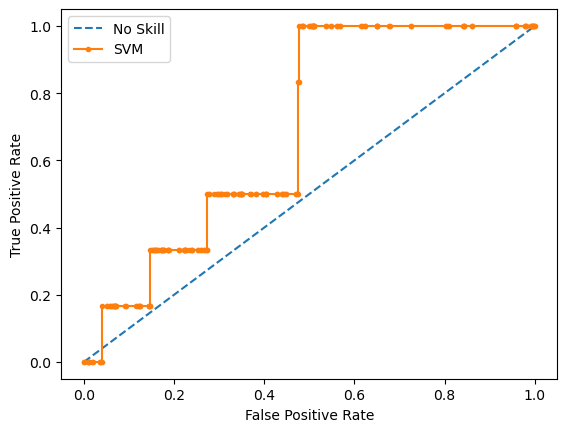

Mean ROC AUC (Cross-Validation): 0.675


In [4]:
## import time
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.utils import resample
from sklearn.decomposition import PCA
from matplotlib import pyplot
#df=dfx3;
#df=dfx2;
#df=dfx1;
df=dfx0;

#voltarsvm

# Amostragem do dataset
df_sampled = resample(df, n_samples=20000, random_state=1)
X = df_sampled.iloc[:, :-1]
y = df_sampled.iloc[:, -1]

# Reduzir dimensionalidade
pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, random_state=1, stratify=y)

# Definir o modelo com balanceamento de classes
model = SVC(kernel='linear', class_weight='balanced')

# Medir o tempo de treinamento
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time
print("Algorithm runtime:", runtime, "seconds")

# Avaliação do modelo usando ROC AUC
y_scores = model.decision_function(X_test)  # Use `decision_function` sem probabilidades
roc_auc = roc_auc_score(y_test, y_scores)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot da curva ROC
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, y_scores)
pyplot.plot(fpr, tpr, marker='.', label='SVM')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Validação cruzada com ROC AUC
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
scores = cross_val_score(model, X_reduced, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (Cross-Validation): %.3f' % np.mean(scores))


In [5]:
from sklearn.utils import resample
import numpy as np

# Número de iterações para o bootstrap
n_iterations = 1000
auc_scores = []

# Realizar bootstrap
for i in range(n_iterations):
    # Amostragem com reposição dos índices do conjunto de teste
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    
    # Calcular o ROC AUC para o conjunto reamostrado
    auc = roc_auc_score(np.array(y_test)[indices], np.array(y_scores)[indices])
    auc_scores.append(auc)

# Calcular os percentis para IC 95%
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)

# Exibir resultados
print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")


C:\ProgramData\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_ranking.py:375: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
C:\ProgramData\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\metrics\_ranking.py:375: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


ROC AUC: 0.723, IC 95%: [nan, nan]


In [7]:
from sklearn.utils import resample
import numpy as np

# Número de iterações para o bootstrap
n_iterations = 1000
auc_scores = []

# Realizar bootstrap
for i in range(n_iterations):
    # Amostragem com reposição dos índices do conjunto de teste
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    
    # Verificar se há ambas as classes na amostra
    y_sample = np.array(y_test)[indices]
    if len(np.unique(y_sample)) < 2:  # Checar se há menos de 2 classes
        continue  # Pular esta iteração
    
    # Calcular o ROC AUC para o conjunto reamostrado
    auc = roc_auc_score(y_sample, np.array(y_scores)[indices])
    auc_scores.append(auc)

# Garantir que temos resultados válidos
if len(auc_scores) > 0:
    # Calcular os percentis para IC 95%
    lower = np.percentile(auc_scores, 2.5)
    upper = np.percentile(auc_scores, 97.5)
    print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")
else:
    print("Não foi possível calcular o intervalo de confiança devido à falta de diversidade nas classes nas amostras.")


ROC AUC: 0.723, IC 95%: [0.434, 0.963]


ROC AUC (Original): 0.723
ROC AUC (Bootstrap Média): 0.726
IC 95%: [0.456, 0.947]


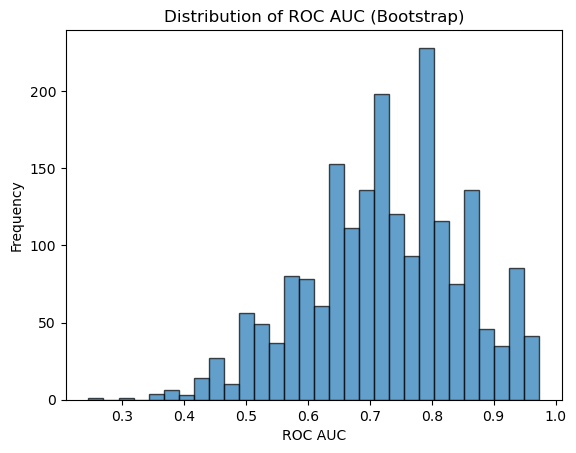

In [8]:
from sklearn.utils import resample
import numpy as np
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Número de iterações para o bootstrap
n_iterations = 2000  # Aumentado para maior precisão
auc_scores = []

# Frequência das classes no conjunto original
class_counts = np.bincount(y_test)

# Realizar bootstrap
for i in range(n_iterations):
    # Reamostragem estratificada
    indices = resample(
        range(len(y_test)),
        replace=True,
        n_samples=len(y_test),
        stratify=y_test
    )
    
    # Verificar se há ambas as classes na amostra reamostrada
    y_sample = np.array(y_test)[indices]
    if len(np.unique(y_sample)) < 2:  # Ignorar amostras sem diversidade de classes
        continue
    
    # Calcular o ROC AUC para o conjunto reamostrado
    auc = roc_auc_score(y_sample, np.array(y_scores)[indices])
    auc_scores.append(auc)

# Garantir que temos resultados válidos
if len(auc_scores) > 0:
    # Calcular os percentis para IC 95%
    lower = np.percentile(auc_scores, 2.5)
    upper = np.percentile(auc_scores, 97.5)
    print(f"ROC AUC (Original): {roc_auc:.3f}")
    print(f"ROC AUC (Bootstrap Média): {np.mean(auc_scores):.3f}")
    print(f"IC 95%: [{lower:.3f}, {upper:.3f}]")
else:
    print("Não foi possível calcular o intervalo de confiança devido à falta de diversidade nas classes nas amostras.")

# Plot da distribuição dos valores de ROC AUC do bootstrap
plt.hist(auc_scores, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('ROC AUC')
plt.ylabel('Frequency')
plt.title('Distribution of ROC AUC (Bootstrap)')
plt.show()


In [ ]:
# Liberar a memória utilizada pelo atual dataset:
#del dfx0 # Apaga a referência ao objeto , mas isso não remove imediatamente o objeto da memória
#dfx0 = "" #redefinido como uma string vazia (""), substitui o antigo objeto por uma referência de menor tamanho
#del dfx1 
#dfx1 = "" 
#del dfx2
#dfx2 = ""
#del dfx3
#dfx3 = ""
#gc.collect() #Força a execução do coletor de lixo, remove da memória objetos que não têm mais referências

In [ ]:
#### pequeno código somente para emitir o beep de término de atividade


In [17]:
#### pequeno código somente para emitir o beep de término de atividade

import winsound
winsound.Beep(262, 5000) #dó
winsound.Beep(294, 5000)#ré


In [20]:
#### pequeno código somente para emitir o beep de término de atividade
import pygame

def play_mp3_pygame(file_path):
    # Inicializar o mixer de áudio
    pygame.mixer.init()
    # Carregar o arquivo MP3
    pygame.mixer.music.load(file_path)
    # Reproduzir o arquivo
    pygame.mixer.music.play()
    print("Playing:", file_path)
    
    # Aguardar até que a reprodução termine
    while pygame.mixer.music.get_busy():
        continue

# Caminho completo para o arquivo MP3
mp3_path = "E:\OneDrive - Tribunal de Contas do Distrito Federal\_COMUM\sonsmp3\good-job.mp3"
#mp3_path = "C:/caminho/para/o/seu/arquivo.mp3"
play_mp3_pygame(mp3_path)


Playing: E:\OneDrive - Tribunal de Contas do Distrito Federal\_COMUM\sonsmp3\good-job.mp3


In [ ]:
#### NÍVEL DE ALGORITMOS 
#### (1)  weights = {0:0.0014, 1:1.0} weighted logistic regression model on an imbalanced classification dataset
import time
print('weighted logistic regression')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
weights = {0:0.0014, 1:1.0}
modelw = LogisticRegression(solver='lbfgs', class_weight=weights, max_iter=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scoresROCAUC1w = cross_val_score(modelw, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scoresROCAUC1w = cross_val_score(modelw, X, y, scoring='roc_auc', cv=cv, n_jobs=1)# mudança do job para ver se a memória aguenta
print('weights = {0:0.0014, 1:1.0}')
print('Mean ROC AUC: %.3f' % mean(scoresROCAUC1w))
model = LogisticRegression(solver='lbfgs')# curva roc - teste para incluir as variáveis # fit a model
start_time = time.time()  # Record the start time
model.fit(X_train, y_train)
end_time = time.time()  # Record the end time
runtime = end_time - start_time  # Calculate the runtime
print("Algorithm runtime:", runtime, "seconds")
yhat = model.predict_proba(X_test)# predict probabilities
pos_probs = yhat[:, 1]# retrieve just the probabilities for the positive class
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')# plot no skill roc curve
fpr, tpr, _ = roc_curve(y_test, pos_probs)# calculate roc curve for model
pyplot.plot(fpr, tpr, marker='.', label='Logistic')# plot model roc curve
pyplot.xlabel('False Positive Rate')# axis labels
pyplot.ylabel('True Positive Rate')# axis labels
pyplot.legend()# show the legend
pyplot.show() # show the plot
roc_auc0 = roc_auc_score(y_test, pos_probs) # calculate roc auc
print(roc_auc0)
print('roc_auc' % roc_auc0)
# Bootstrap para intervalos de confiança
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    # Reamostragem com substituição
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)
# Calcular intervalos de confiança
lower = np.percentile(auc_scores, 2.5)  # Percentil 2.5%
upper = np.percentile(auc_scores, 97.5)  # Percentil 97.5%
print(f"ROC AUC: {roc_auc0:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")
# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# Calcular o valor médio da precisão (AP - Average Precision)
average_precision = average_precision_score(y_test, pos_probs)
print('Average Precision-Recall Score: %.3f' % average_precision)
# Plotar curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

In [ ]:
df.head()

In [ ]:
####   Heuristic Weights Logistic Regression regression model on an imbalanced classification dataset
import time
print('Heuristic Weights Logistic Regression')
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
modelw = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=500) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scoresROCAUC1w = cross_val_score(modelw, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scoresROCAUC1w = cross_val_score(modelw, X, y, scoring='roc_auc', cv=cv, n_jobs=1)# mudança do job para ver se a memória aguenta
print('weights = {0:0.0014, 1:1.0}')
print('Mean ROC AUC: %.3f' % mean(scoresROCAUC1w))
model = LogisticRegression(solver='lbfgs')# curva roc - teste para incluir as variáveis # fit a model
start_time = time.time()  # Record the start time
model.fit(X_train, y_train)
end_time = time.time()  # Record the end time
runtime = end_time - start_time  # Calculate the runtime
print("Algorithm runtime:", runtime, "seconds")
yhat = model.predict_proba(X_test)# predict probabilities
pos_probs = yhat[:, 1]# retrieve just the probabilities for the positive class
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')# plot no skill roc curve
fpr, tpr, _ = roc_curve(y_test, pos_probs)# calculate roc curve for model
pyplot.plot(fpr, tpr, marker='.', label='Logistic')# plot model roc curve
pyplot.xlabel('False Positive Rate')# axis labels
pyplot.ylabel('True Positive Rate')# axis labels
pyplot.legend()# show the legend
pyplot.show() # show the plot
roc_auc0 = roc_auc_score(y_test, pos_probs) # calculate roc auc
print(roc_auc0)
print('roc_auc' % roc_auc0)
# Bootstrap para intervalos de confiança
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    # Reamostragem com substituição
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)
# Calcular intervalos de confiança
lower = np.percentile(auc_scores, 2.5)  # Percentil 2.5%
upper = np.percentile(auc_scores, 97.5)  # Percentil 97.5%
print(f"ROC AUC: {roc_auc0:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")
# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# Calcular o valor médio da precisão (AP - Average Precision)
average_precision = average_precision_score(y_test, pos_probs)
print('Average Precision-Recall Score: %.3f' % average_precision)
# Plotar curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

In [ ]:
# resolver instalação 
# NEURAL NETWORK ##### class weighted neural network on an imbalanced classification dataset (p.230)
import time
import numpy as np
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.utils import resample
from matplotlib import pyplot
#from keras.layers import Dense
#from keras.models import Sequential
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential


# Função para definir o modelo de rede neural
def define_model(n_input):
    model = Sequential()
    model.add(Dense(10, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='sgd')
    return model

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Pesos das classes
weights = {0: 0.0014, 1: 1.0}

# Definição do modelo
n_input = X_train.shape[1]
model = define_model(n_input)

# Medir tempo de execução do treinamento
start_time = time.time()
history = model.fit(X_train, y_train, class_weight=weights, epochs=100, verbose=0)
end_time = time.time()
runtime = end_time - start_time
print("Algorithm runtime:", runtime, "seconds")

# Avaliação do modelo
pos_probs = model.predict(X_test).ravel()  # Obtendo probabilidades para a classe positiva
roc_auc = roc_auc_score(y_test, pos_probs)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot da curva ROC
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='Neural Network')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Bootstrap para intervalos de confiança do ROC AUC
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
average_precision = average_precision_score(y_test, pos_probs)
print(f'Average Precision-Recall Score: {average_precision:.3f}')

# Plot da curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='Neural Network')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
# !pip install tensorflow


In [ ]:
# Não está rodando - testar partes
# svm with class weight on an imbalanced classification dataset
import time
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.utils import resample
from matplotlib import pyplot

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Definir o modelo com balanceamento de classes
model = SVC(gamma='scale', class_weight='balanced', probability=True)

# Medir o tempo de treinamento
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time
print("Algorithm runtime:", runtime, "seconds")

# Avaliação do modelo usando ROC AUC
pos_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot da curva ROC
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='SVM')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Bootstrap para intervalos de confiança do ROC AUC
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
average_precision = average_precision_score(y_test, pos_probs)
print(f'Average Precision-Recall Score: {average_precision:.3f}')

# Plot da curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='SVM')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

# Validação cruzada com ROC AUC
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (Cross-Validation): %.3f' % np.mean(scores))

In [ ]:
# em partes zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz

In [ ]:
# svm with class weight on an imbalanced classification dataset
import time
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler  # Alterar para MinMaxScaler se necessário
#from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from matplotlib import pyplot
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
# Escalamento dos dados
scaler = StandardScaler()  # Alterar para MinMaxScaler() se necessário
#scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Aplicar SMOTE para balancear as classes no conjunto de treinamento
smote = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
# Definir o modelo com balanceamento de classes
# model = SVC(gamma='scale', class_weight='balanced', probability=True) original que trava
# model = SVC(gamma='auto', class_weight='balanced', probability=True) não deu certo
# model = SVC(kernel='linear', class_weight='balanced', probability=True) # não deu certo
model = SVC(kernel='poly', class_weight='balanced', probability=True) 
# model = SVC(gamma=0.1, class_weight='balanced', probability=True) opção 2
# model = SVC(gamma='sigmoid', class_weight='balanced', probability=True) opção 2
# Medir o tempo de treinamento
start_time = time.time()
model.fit(X_train_balanced, y_train_balanced) ######################################################
#model.fit(X_train, y_train)                  ######################################################
end_time = time.time()
runtime = end_time - start_time
print("Algorithm runtime:", runtime, "seconds")
# Obtém a data e hora local Exibe o dia e hora atual
local_time = time.localtime()
print("Data atual:", time.strftime("%Y-%m-%d", local_time))
print("Hora atual:", time.strftime("%H:%M:%S", local_time))

In [ ]:
# Avaliação do modelo usando ROC AUC
pos_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print(f"ROC AUC: {roc_auc:.3f}")
# Obtém a data e hora local Exibe o dia e hora atual
local_time = time.localtime()
print("Data atual:", time.strftime("%Y-%m-%d", local_time))
print("Hora atual:", time.strftime("%H:%M:%S", local_time))

In [ ]:
# Plot da curva ROC
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='SVM')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Obtém a data e hora local Exibe o dia e hora atual
local_time = time.localtime()
print("Data atual:", time.strftime("%Y-%m-%d", local_time))
print("Hora atual:", time.strftime("%H:%M:%S", local_time))

In [ ]:
# Bootstrap para intervalos de confiança do ROC AUC
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)

In [ ]:
# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

In [ ]:
# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
average_precision = average_precision_score(y_test, pos_probs)
print(f'Average Precision-Recall Score: {average_precision:.3f}')

In [ ]:
# Plot da curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='SVM')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

In [ ]:
# Validação cruzada com ROC AUC
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (Cross-Validation): %.3f' % np.mean(scores))

In [ ]:
# em partes zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz

In [ ]:
# não roda ???????
# evaluates a decision tree model on the imbalanced dataset
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.utils import resample
from matplotlib import pyplot

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Definir o modelo
model = DecisionTreeClassifier()

# Medir o tempo de treinamento
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time
print("Algorithm runtime:", runtime, "seconds")

# Avaliação do modelo usando ROC AUC
pos_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot da curva ROC
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='Decision Tree')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Bootstrap para intervalos de confiança do ROC AUC
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
average_precision = average_precision_score(y_test, pos_probs)
print(f'Average Precision-Recall Score: {average_precision:.3f}')

# Plot da curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='Decision Tree')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

# Validação cruzada com ROC AUC
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (Cross-Validation): %.3f' % np.mean(scores))


In [ ]:
# decision tree with class weight on an imbalanced classification dataset Heuristic Decision Tree
import time
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.utils import resample
from matplotlib import pyplot
#df=dfx3
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Definir o modelo com balanceamento de classes
model = DecisionTreeClassifier(class_weight='balanced')

# Medir o tempo de treinamento
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time
print("Algorithm runtime:", runtime, "seconds")

# Avaliação do modelo usando ROC AUC
pos_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot da curva ROC
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='Decision Tree (Balanced)')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Bootstrap para intervalos de confiança do ROC AUC
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
average_precision = average_precision_score(y_test, pos_probs)
print(f'Average Precision-Recall Score: {average_precision:.3f}')

# Plot da curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='Decision Tree (Balanced)')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

# Validação cruzada com ROC AUC
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (Cross-Validation): %.3f' % np.mean(scores))

In [ ]:
# easy ensemble for imbalanced classification (Ensemble Algorithm) p. 286
import time
import numpy as np
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.utils import resample
from matplotlib import pyplot

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Definir o modelo Easy Ensemble
model = EasyEnsembleClassifier(n_estimators=10)

# Medir o tempo de treinamento
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time
print("Algorithm runtime:", runtime, "seconds")

# Avaliação do modelo usando ROC AUC
pos_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot da curva ROC
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='Easy Ensemble')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Bootstrap para intervalos de confiança do ROC AUC
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
average_precision = average_precision_score(y_test, pos_probs)
print(f'Average Precision-Recall Score: {average_precision:.3f}')

# Plot da curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='Easy Ensemble')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

# Validação cruzada com ROC AUC
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (Cross-Validation): %.3f' % np.mean(scores))

In [ ]:
# bagged decision trees with random undersampling for imbalanced classification - Ensemble Algorithm - p. 280
import time
import numpy as np
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.utils import resample
from matplotlib import pyplot

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Definir o modelo Balanced Bagging
model = BalancedBaggingClassifier()

# Medir o tempo de treinamento
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time
print("Algorithm runtime:", runtime, "seconds")

# Avaliação do modelo usando ROC AUC
pos_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot da curva ROC
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='Balanced Bagging')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Bootstrap para intervalos de confiança do ROC AUC
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
average_precision = average_precision_score(y_test, pos_probs)
print(f'Average Precision-Recall Score: {average_precision:.3f}')

# Plot da curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='Balanced Bagging')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

# Validação cruzada com ROC AUC
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (Cross-Validation): %.3f' % np.mean(scores))


In [ ]:
# class balanced random forest for imbalanced classification - Ensemble Algorithm- p. 283
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.utils import resample
from matplotlib import pyplot

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Definir o modelo Balanced Random Forest
model = RandomForestClassifier(n_estimators=10, class_weight='balanced')

# Medir o tempo de treinamento
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time
print("Algorithm runtime:", runtime, "seconds")

# Avaliação do modelo usando ROC AUC
pos_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot da curva ROC
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='Balanced Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Bootstrap para intervalos de confiança do ROC AUC
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
average_precision = average_precision_score(y_test, pos_probs)
print(f'Average Precision-Recall Score: {average_precision:.3f}')

# Plot da curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='Balanced Random Forest')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

# Validação cruzada com ROC AUC
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (Cross-Validation): %.3f' % np.mean(scores))


In [ ]:
# bootstrap class balanced random forest for imbalanced classification  Bootstrap Aggregation, or Bagging (Ensemble Algorithm) p. 283/284
import time
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.utils import resample
from matplotlib import pyplot
#df=dfx
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Definir o modelo Random Forest com balanced_subsample
model = RandomForestClassifier(n_estimators=10, class_weight='balanced_subsample')

# Medir o tempo de treinamento
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time
print("Algorithm runtime:", runtime, "seconds")

# Avaliação do modelo usando ROC AUC
pos_probs = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot da curva ROC
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='Random Forest (Balanced Subsample)')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Bootstrap para intervalos de confiança do ROC AUC
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
average_precision = average_precision_score(y_test, pos_probs)
print(f'Average Precision-Recall Score: {average_precision:.3f}')

# Plot da curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='Random Forest (Balanced Subsample)')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

# Validação cruzada com ROC AUC
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (Cross-Validation): %.3f' % np.mean(scores))


In [ ]:
# SMOTE 1 ### COMPLICADO PIPELINE combination of SMOTE and random undersampling for imbalanced classification
import time
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from matplotlib import pyplot

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Definir o modelo Logistic Regression com pipeline SMOTE + RandomUnderSampler
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
model = LogisticRegression()
steps = [('o', over), ('u', under), ('m', model)]
pipeline = Pipeline(steps=steps)

# Medir o tempo de treinamento
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
runtime = end_time - start_time
print("Algorithm runtime:", runtime, "seconds")

# Avaliação do modelo usando ROC AUC
pos_probs = pipeline.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print(f"ROC AUC: {roc_auc:.3f}")

# Plot da curva ROC
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
fpr, tpr, _ = roc_curve(y_test, pos_probs)
pyplot.plot(fpr, tpr, marker='.', label='SMOTE + Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# Bootstrap para intervalos de confiança do ROC AUC
n_iterations = 1000
auc_scores = []
for i in range(n_iterations):
    indices = resample(range(len(y_test)), replace=True, n_samples=len(y_test))
    auc = roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])
    auc_scores.append(auc)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"ROC AUC: {roc_auc:.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Calcular precisão e revocação
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
average_precision = average_precision_score(y_test, pos_probs)
print(f'Average Precision-Recall Score: {average_precision:.3f}')

# Plot da curva Precision-Recall
pyplot.plot(recall, precision, marker='.', label='SMOTE + Logistic Regression')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.title('Precision-Recall Curve')
pyplot.legend()
pyplot.show()

# Validação cruzada com ROC AUC
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (Cross-Validation): %.3f' % np.mean(scores))


In [ ]:
#################### DADOS SMOTE - NÍVEL DE DADOS       ####################

# REGRESSÃO LOGÍSTICA SEM TRATAMENTO PARA EXECUTAR COM DADOS BALANCEADOS POR SMOTE EM R

In [32]:
#importação dos dados 
import io
df_adas = pd.read_csv ("E:\GoogleDrive\Colab Notebooks\df_adas.csv")
df_dbsmote = pd.read_csv ("E:\GoogleDrive\Colab Notebooks\df_dbsmote.csv")
df_ans = pd.read_csv ("E:\GoogleDrive\Colab Notebooks\df_ans.csv")
df_sls = pd.read_csv ("E:\GoogleDrive\Colab Notebooks\df_sls.csv")
df_smote = pd.read_csv ("E:\GoogleDrive\Colab Notebooks\df_smote.csv")
#df.shape

In [161]:
dfx3.shape

NameError: name 'dfx3' is not defined

In [148]:
df_smote.shape

(605204, 397)

In [147]:
df_smote.head()

,QTCG_SIGRH,QTCG_SIAPE,QTFCSIGRH,QTFCSIAPE,CEIS,InabilitadosTCDF,CargoEleitoral6,CargoEleitoral7,CargoEleitoral8,NUMPARTIDO10,...,QUALIFSOCIO30,QUALIFSOCIO33,QUALIFSOCIO49,QUALIFSOCIO52,QUALIFSOCIO65,DiasNaSoc,SalBrutoF,PERCENTUAL_CAPITAL_SOCIAL,QTD_CNAES,TARGET_CORRUPCAO
0,0.0,4.0,2.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,1.0,0.0,0.0,0.053248,0.015213,0.4500,0.5,1
1,0.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0.0,0.0,0.0,0.130312,0.000015,0.1666,0.1,1
2,0.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0.0,0.0,0.0,0.156000,0.013807,0.7500,0.1,1
3,0.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,1.0,0.0,0.0,0.026350,0.004527,0.8000,0.2,1
4,3.0,0.0,3.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0.0,0.0,0.0,0.000000,0.021341,0.0000,0.0,1


In [143]:
df_smote.drop(df_smote.columns[-1], axis=1, inplace=True) # exclui a última coluna
df_smote = df_smote.iloc[:, 1:] # exclui a primeira coluna
df_smote.drop('X',inplace=True,axis=1)
df_smote.head()

,Unnamed: 0,QTCG_SIGRH,QTCG_SIAPE,QTFCSIGRH,QTFCSIAPE,CEIS,InabilitadosTCDF,CargoEleitoral6,CargoEleitoral7,CargoEleitoral8,...,QUALIFSOCIO30,QUALIFSOCIO33,QUALIFSOCIO49,QUALIFSOCIO52,QUALIFSOCIO65,DiasNaSoc,SalBrutoF,PERCENTUAL_CAPITAL_SOCIAL,QTD_CNAES,TARGET_CORRUPCAO
0,1,0.0,4.0,2.0,0.0,0.0,0,0.0,0,0.0,...,0,0,1.0,0.0,0.0,0.053248,0.015213,0.4500,0.5,1
1,2,0.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,...,0,0,0.0,0.0,0.0,0.130312,0.000015,0.1666,0.1,1
2,3,0.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,...,0,0,0.0,0.0,0.0,0.156000,0.013807,0.7500,0.1,1
3,4,0.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,...,0,0,1.0,0.0,0.0,0.026350,0.004527,0.8000,0.2,1
4,5,3.0,0.0,3.0,0.0,0.0,0,0.0,0,0.0,...,0,0,0.0,0.0,0.0,0.000000,0.021341,0.0000,0.0,1


In [149]:
df=df_smote

In [150]:
df.shape

(605204, 397)

In [80]:
df_smote.shape

(605170, 70)

In [61]:
df_ans.head()

,Unnamed: 0,X,QTCG_SIGRH,QTCG_SIAPE,QTFCSIGRH,QTFCSIAPE,CEIS,InabilitadosTCDF,CargoEleitoral6,CargoEleitoral7,...,QUALIFSOCIO33,QUALIFSOCIO49,QUALIFSOCIO52,QUALIFSOCIO65,DiasNaSoc,SalBrutoF,PERCENTUAL_CAPITAL_SOCIAL,QTD_CNAES,TARGET_CORRUPCAO,class
0,1,114265.0,7.0,0.0,6.0,0.0,0.0,0,0.0,0,...,0,0.0,0.0,0.0,0.000000,0.000842,0.00,0.0,1,1
1,2,99925.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0,...,0,1.0,0.0,0.0,0.159082,0.024878,0.50,0.1,1,1
2,3,116970.0,0.0,0.0,2.0,0.0,0.0,0,0.0,0,...,0,1.0,0.0,0.0,0.020642,0.006545,0.01,0.2,1,1
3,4,132281.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0,...,0,0.0,0.0,0.0,0.000000,0.024957,0.00,0.0,1,1
4,5,270715.0,0.0,0.0,1.0,0.0,0.0,0,0.0,0,...,0,1.0,0.0,0.0,0.170316,0.013132,0.99,0.1,1,1


In [62]:
df_adas.drop(df_adas.columns[-1], axis=1, inplace=True) # exclui a última coluna
df_adas = df_adas.iloc[:, 1:] # exclui a primeira coluna
df_adas.drop('X',inplace=True,axis=1)
df_adas.head()

,QTCG_SIGRH,QTCG_SIAPE,QTFCSIGRH,QTFCSIAPE,CEIS,InabilitadosTCDF,CargoEleitoral6,CargoEleitoral7,CargoEleitoral8,NUMPARTIDO10,...,QUALIFSOCIO30,QUALIFSOCIO33,QUALIFSOCIO49,QUALIFSOCIO52,QUALIFSOCIO65,DiasNaSoc,SalBrutoF,PERCENTUAL_CAPITAL_SOCIAL,QTD_CNAES,TARGET_CORRUPCAO
0,7.0,0.0,6.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0.0,0.0,0.0,0.000000,0.000842,0.00,0.0,1
1,0.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,1.0,0.0,0.0,0.159082,0.024878,0.50,0.1,1
2,0.0,0.0,2.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,1.0,0.0,0.0,0.020642,0.006545,0.01,0.2,1
3,0.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,0.0,0.0,0.0,0.000000,0.024957,0.00,0.0,1
4,0.0,0.0,1.0,0.0,0.0,0,0.0,0,0.0,0,...,0,0,1.0,0.0,0.0,0.170316,0.013132,0.99,0.1,1


In [63]:
df=df_adas

In [109]:
df.head()

,QTCG_SIGRH,QTCG_SIAPE,QTFCSIGRH,QTFCSIAPE,CEIS,InabilitadosTCDF,CargoEleitoral8,NUMPARTIDO43,GrauInst6,EstadoCivil1,...,QUALIFSOCIO18,QUALIFSOCIO22,QUALIFSOCIO49,QUALIFSOCIO52,QUALIFSOCIO65,DiasNaSoc,SalBrutoF,PERCENTUAL_CAPITAL_SOCIAL,QTD_CNAES,TARGET_CORRUPCAO
0,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.061742,0.022039,0.2,0.1,1
1,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.006559,0.0,0.0,1
2,0.0,1.0,1.0,0.0,1.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.037721,0.000988,0.5,0.1,1
3,0.0,0.0,2.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.092202,0.005971,0.1,0.5,1
4,0.0,0.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.067496,0.010452,0.0,0.3,1


In [158]:
df.shape

(605204, 70)

In [159]:
# printing the number of samples
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print('majority class: %d' % np.sum(y == 0))
print('minority class: %d' % np.sum(y == 1))

majority class: 302608
minority class: 302596


In [138]:
print(y.isnull().sum())  # Verifica a quantidade de valores ausentes


0


In [137]:
df = df.dropna(subset=[df.columns[-1]])  # Remove linhas onde y (última coluna) é NaN
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [160]:
#### DADOS SMOTE - NÍVEL DE DADOS
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
import numpy as np
print('simple logistic regression')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
# Model with class weights
weights = {0: 1, 1: 1}
modelw = LogisticRegression(solver='saga', class_weight=weights, max_iter=200)
# Cross-validation with parallelism
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scoresROCAUC1w = cross_val_score(modelw, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scoresROCAUC1w))
# Logistic regression model
model = LogisticRegression(solver='saga')
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
pos_probs = yhat[:, 1]
# Bootstrap for confidence intervals with parallelism
n_iterations = 1000

def compute_auc(indices, y_test, pos_probs):
    return roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])

auc_scores = Parallel(n_jobs=-1)(
    delayed(compute_auc)(resample(range(len(y_test)), replace=True, n_samples=len(y_test)), y_test, pos_probs)
    for _ in range(n_iterations)
)

# Confidence intervals
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"ROC AUC: {np.mean(auc_scores):.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

import winsound
winsound.Beep(800, 2000) #dó

simple logistic regression
Mean ROC AUC: 0.785


C:\ProgramData\Anaconda3\envs\pytorch_env\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


ROC AUC: 0.784, IC 95%: [0.782, 0.786]


In [165]:
#### DADOS SMOTE - NÍVEL DE DADOS
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import numpy as np

# Configurações iniciais
print('Logistic Regression with SMOTE and Bootstrap for Confidence Intervals')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Configuração do pipeline com SMOTE e RandomUnderSampler
model = LogisticRegression(solver='saga', class_weight='balanced', max_iter=200)
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('over', over), ('under', under), ('model', model)]
pipeline = Pipeline(steps=steps)

# Validação cruzada com paralelismo
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (cross-validation): %.3f' % np.mean(scores))

# Ajuste do modelo final no conjunto de treinamento
pipeline.fit(X_train, y_train)
yhat = pipeline.predict_proba(X_test)

# Probabilidades para a classe positiva
pos_probs = yhat[:, 1]

# Bootstrap para intervalos de confiança
n_iterations = 1000
def compute_auc(indices, y_test, pos_probs):
    return roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])

auc_scores = Parallel(n_jobs=-1)(
    delayed(compute_auc)(resample(range(len(y_test)), replace=True, n_samples=len(y_test)), y_test, pos_probs)
    for _ in range(n_iterations)
)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"Bootstrap ROC AUC: {np.mean(auc_scores):.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Beep ao finalizar
import winsound
winsound.Beep(800, 2000)

Logistic Regression with SMOTE and Bootstrap for Confidence Intervals
Mean ROC AUC (cross-validation): 0.650
Bootstrap ROC AUC: 0.665, IC 95%: [0.601, 0.727]


In [ ]:
###### SMOTEENN
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
import numpy as np

# Configurações iniciais
print('Logistic Regression with SMOTEENN and Bootstrap for Confidence Intervals')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Configuração do pipeline com SMOTEENN
model = LogisticRegression(solver='saga', class_weight='balanced', max_iter=200)
smote_enn = SMOTEENN(sampling_strategy='auto')
steps = [('smoteenn', smote_enn), ('model', model)]
pipeline = Pipeline(steps=steps)

# Validação cruzada com paralelismo
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (cross-validation): %.3f' % np.mean(scores))

# Ajuste do modelo final no conjunto de treinamento
pipeline.fit(X_train, y_train)
yhat = pipeline.predict_proba(X_test)

# Probabilidades para a classe positiva
pos_probs = yhat[:, 1]

# Bootstrap para intervalos de confiança
n_iterations = 1000
def compute_auc(indices, y_test, pos_probs):
    return roc_auc_score(np.array(y_test)[indices], np.array(pos_probs)[indices])

auc_scores = Parallel(n_jobs=-1)(
    delayed(compute_auc)(resample(range(len(y_test)), replace=True, n_samples=len(y_test)), y_test, pos_probs)
    for _ in range(n_iterations)
)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"Bootstrap ROC AUC: {np.mean(auc_scores):.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Beep ao finalizar
import winsound
winsound.Beep(800, 2000)


Logistic Regression with SMOTEENN and Bootstrap for Confidence Intervals


In [3]:
########  SMOTEENN
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
import numpy as np

# Configurações iniciais
print('Logistic Regression with SMOTEENN and Optimized Bootstrap')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Amostragem do conjunto de dados (opcional para grandes datasets)
if len(X) > 10000:  # Ajuste o valor conforme o tamanho do seu dataset
    X = X.sample(frac=0.5, random_state=1)
    y = y.loc[X.index]

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Configuração do pipeline com SMOTEENN
model = LogisticRegression(solver='saga', class_weight='balanced', max_iter=200)
smote_enn = SMOTEENN(sampling_strategy='auto', n_jobs=-1)
steps = [('smoteenn', smote_enn), ('model', model)]
pipeline = Pipeline(steps=steps)

# Validação cruzada com paralelismo e divisões reduzidas
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (cross-validation): %.3f' % np.mean(scores))

# Ajuste do modelo final no conjunto de treinamento
pipeline.fit(X_train, y_train)
yhat = pipeline.predict_proba(X_test)

# Probabilidades para a classe positiva
pos_probs = yhat[:, 1]

# Bootstrap para intervalos de confiança otimizado
n_iterations = 500  # Reduzido de 1000 para 500
bootstrap_sample_size = int(len(y_test) * 0.8)  # Amostra de 80% do conjunto de teste

def compute_auc(indices, y_test, pos_probs):
    sampled_y = np.array(y_test)[indices]
    sampled_probs = np.array(pos_probs)[indices]
    return roc_auc_score(sampled_y, sampled_probs)

auc_scores = Parallel(n_jobs=-1)(
    delayed(compute_auc)(resample(range(len(y_test)), replace=True, n_samples=bootstrap_sample_size), y_test, pos_probs)
    for _ in range(n_iterations)
)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f"Bootstrap ROC AUC: {np.mean(auc_scores):.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]")

# Beep ao finalizar
import winsound
winsound.Beep(800, 2000)
# Beep ao finalizar

Logistic Regression with SMOTEENN and Optimized Bootstrap
Mean ROC AUC (cross-validation): 0.585
Bootstrap ROC AUC: 0.631, IC 95%: [0.534, 0.728]


In [ ]:
# Logistic Regression with SMOTETomek and Bootstrap
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
from sklearn.metrics import roc_auc_score
from joblib import Parallel, delayed
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import numpy as np

# Configurações iniciais
print('Logistic Regression with SMOTETomek and Bootstrap (Optimized)')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Configuração do pipeline com SMOTETomek
model = LogisticRegression(solver='saga', class_weight='balanced', max_iter=200)
resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority', n_jobs=-1))
steps = [('resample', resample), ('model', model)]
pipeline = Pipeline(steps=steps)

# Validação cruzada com paralelismo e menos divisões
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=1, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC (cross-validation): %.3f' % np.mean(scores))

# Ajuste do modelo final no conjunto de treinamento
pipeline.fit(X_train, y_train)
yhat = pipeline.predict_proba(X_test)

# Probabilidades para a classe positiva
pos_probs = yhat[:, 1]

# Bootstrap para intervalos de confiança com menos iterações e tamanho reduzido
n_iterations = 500
bootstrap_sample_size = int(len(y_test) * 0.8)

def compute_auc(indices, y_test, pos_probs):
    sampled_y = np.array(y_test)[indices]
    sampled_probs = np.array(pos_probs)[indices]
    return roc_auc_score(sampled_y, sampled_probs)

auc_scores = Parallel(n_jobs=-1)(
    delayed(compute_auc)(resample(range(len(y_test)), replace=True, n_samples=bootstrap_sample_size), y_test, pos_probs)
    for _ in range(n_iterations)
)

# Intervalos de confiança
lower = np.percentile(auc_scores, 2.5)
upper = np.percentile(auc_scores, 97.5)
print(f\"Bootstrap ROC AUC: {np.mean(auc_scores):.3f}, IC 95%: [{lower:.3f}, {upper:.3f}]\")


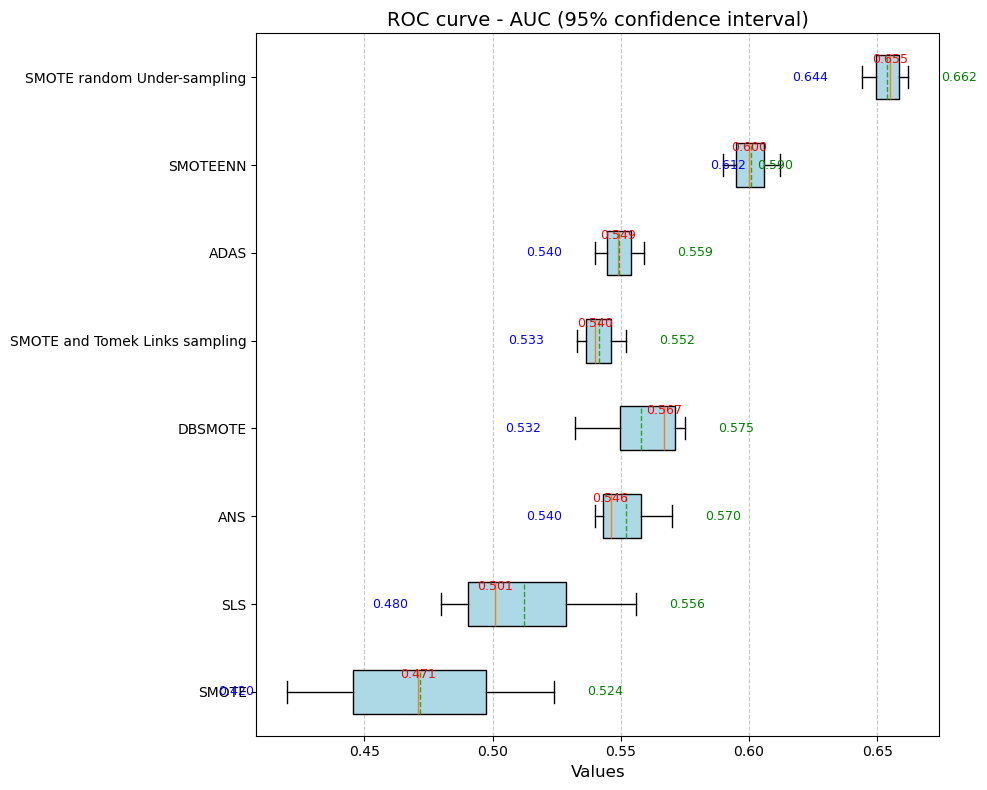

In [8]:
# boxplot DadOS
import matplotlib.pyplot as plt

# Dados dos algoritmos
algoritmos = [
     "SMOTE","SLS", "ANS", "DBSMOTE", 
     "SMOTE and Tomek Links sampling", 
     "ADAS",  "SMOTEENN", "SMOTE random Under-sampling",
    ]

# Valores centrais (mediana), mínimos e máximos
mediana = [0.471, 0.501, 0.546, 0.567, 0.540, 0.549, 0.600, 0.655]
ic_inferiores = [0.420, 0.480, 0.540, 0.532, 0.533, 0.540, 0.612,  0.644]
ic_superiores = [0.524, 0.556, 0.570, 0.575, 0.552, 0.559, 0.590, 0.662]

# Preparando os dados para o boxplot
data = [[ic_inferiores[i], mediana[i], ic_superiores[i]] for i in range(len(algoritmos))]

# Criando o boxplot
fig, ax = plt.subplots(figsize=(10, 8))
box = ax.boxplot(data, vert=False, patch_artist=True, showmeans=True, meanline=True,
                 boxprops=dict(facecolor='lightblue'), tick_labels=algoritmos)


# Adicionando os valores no gráfico
for i in range(len(algoritmos)):
    # Valores mínimos
    ax.text(ic_inferiores[i] - 0.02, i + 1, f"{ic_inferiores[i]:.3f}", ha='center', va='center', fontsize=9, color='blue')
    # Valores medianos
    ax.text(mediana[i], i + 1.2, f"{mediana[i]:.3f}", ha='center', va='center', fontsize=9, color='red')
    # Valores máximos
    ax.text(ic_superiores[i] + 0.02, i + 1, f"{ic_superiores[i]:.3f}", ha='center', va='center', fontsize=9, color='green')

# Configurações do gráfico
plt.title("ROC curve - AUC (95% confidence interval)", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrando o gráfico
plt.show()



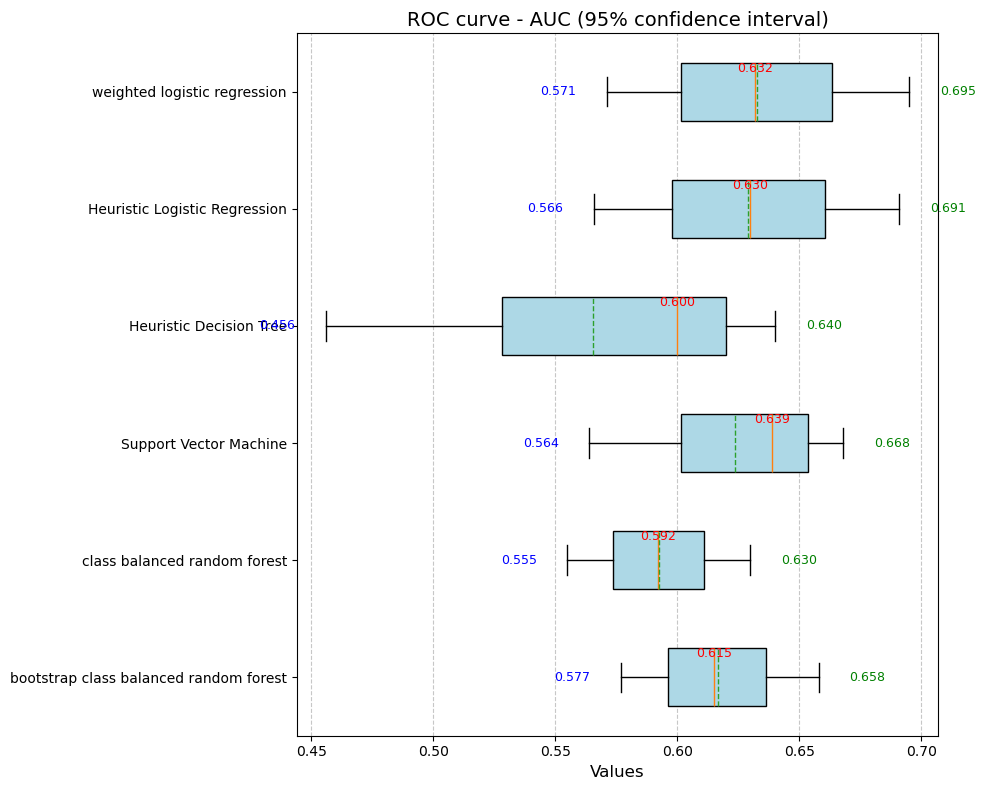

In [13]:
# boxplot funcionando opção ALG
import matplotlib.pyplot as plt

# Dados dos algoritmos
algoritmos = [
    "bootstrap class balanced random forest", "class balanced random forest", 
    "Support Vector Machine" ,"Heuristic Decision Tree",  
    "Heuristic Logistic Regression","weighted logistic regression"
]

# Valores centrais (mediana), mínimos e máximos
mediana = [0.615, 0.592, 0.639, 0.600, 0.630, 0.632]
ic_inferiores = [0.577, 0.555, 0.564, 0.456, 0.566, 0.571]
ic_superiores = [0.658, 0.630, 0.668, 0.640, 0.691, 0.695]

# Preparando os dados para o boxplot
data = [[ic_inferiores[i], mediana[i], ic_superiores[i]] for i in range(len(algoritmos))]

# Criando o boxplot
fig, ax = plt.subplots(figsize=(10, 8))
box = ax.boxplot(data, vert=False, patch_artist=True, showmeans=True, meanline=True,
                 boxprops=dict(facecolor='lightblue'), tick_labels=algoritmos)


# Adicionando os valores no gráfico
for i in range(len(algoritmos)):
    # Valores mínimos
    ax.text(ic_inferiores[i] - 0.02, i + 1, f"{ic_inferiores[i]:.3f}", ha='center', va='center', fontsize=9, color='blue')
    # Valores medianos
    ax.text(mediana[i], i + 1.2, f"{mediana[i]:.3f}", ha='center', va='center', fontsize=9, color='red')
    # Valores máximos
    ax.text(ic_superiores[i] + 0.02, i + 1, f"{ic_superiores[i]:.3f}", ha='center', va='center', fontsize=9, color='green')

# Configurações do gráfico
plt.title("ROC curve - AUC (95% confidence interval)", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrando o gráfico

plt.show()


In [152]:

df.drop('CNAE3240003', inplace=True, axis=1) if 'CNAE3240003' in df.columns else None
df.drop('CNAE3250703', inplace=True, axis=1) if 'CNAE3250703' in df.columns else None
df.drop('CNAE3291400', inplace=True, axis=1) if 'CNAE3291400' in df.columns else None
df.drop('CNAE3292202', inplace=True, axis=1) if 'CNAE3292202' in df.columns else None
df.drop('CNAE3311200', inplace=True, axis=1) if 'CNAE3311200' in df.columns else None
df.drop('CNAE3314711', inplace=True, axis=1) if 'CNAE3314711' in df.columns else None
df.drop('CNAE3314715', inplace=True, axis=1) if 'CNAE3314715' in df.columns else None
df.drop('CNAE3520401', inplace=True, axis=1) if 'CNAE3520401' in df.columns else None
df.drop('CNAE4211102', inplace=True, axis=1) if 'CNAE4211102' in df.columns else None
df.drop('CNAE4222702', inplace=True, axis=1) if 'CNAE4222702' in df.columns else None
df.drop('CNAE4399104', inplace=True, axis=1) if 'CNAE4399104' in df.columns else None
df.drop('CNAE4622200', inplace=True, axis=1) if 'CNAE4622200' in df.columns else None
df.drop('CNAE4635403', inplace=True, axis=1) if 'CNAE4635403' in df.columns else None
df.drop('CNAE4636201', inplace=True, axis=1) if 'CNAE4636201' in df.columns else None
df.drop('CNAE4646002', inplace=True, axis=1) if 'CNAE4646002' in df.columns else None
df.drop('CNAE4649403', inplace=True, axis=1) if 'CNAE4649403' in df.columns else None
df.drop('CNAE4649406', inplace=True, axis=1) if 'CNAE4649406' in df.columns else None
df.drop('CNAE4662100', inplace=True, axis=1) if 'CNAE4662100' in df.columns else None
df.drop('CNAE4674500', inplace=True, axis=1) if 'CNAE4674500' in df.columns else None
df.drop('CNAE4681802', inplace=True, axis=1) if 'CNAE4681802' in df.columns else None
df.drop('CNAE4681805', inplace=True, axis=1) if 'CNAE4681805' in df.columns else None
df.drop('CNAE4751202', inplace=True, axis=1) if 'CNAE4751202' in df.columns else None
df.drop('CNAE4789006', inplace=True, axis=1) if 'CNAE4789006' in df.columns else None
df.drop('CNAE5099801', inplace=True, axis=1) if 'CNAE5099801' in df.columns else None
df.drop('CNAE5120000', inplace=True, axis=1) if 'CNAE5120000' in df.columns else None
df.drop('CNAE5250805', inplace=True, axis=1) if 'CNAE5250805' in df.columns else None
df.drop('CNAE5310501', inplace=True, axis=1) if 'CNAE5310501' in df.columns else None
df.drop('CNAE5590602', inplace=True, axis=1) if 'CNAE5590602' in df.columns else None
df.drop('CNAE5912002', inplace=True, axis=1) if 'CNAE5912002' in df.columns else None
df.drop('CNAE6450600', inplace=True, axis=1) if 'CNAE6450600' in df.columns else None
df.drop('CNAE6461100', inplace=True, axis=1) if 'CNAE6461100' in df.columns else None
df.drop('CNAE7420002', inplace=True, axis=1) if 'CNAE7420002' in df.columns else None
df.drop('CNAE7420005', inplace=True, axis=1) if 'CNAE7420005' in df.columns else None
df.drop('CNAE8299701', inplace=True, axis=1) if 'CNAE8299701' in df.columns else None
df.drop('CNAE8599602', inplace=True, axis=1) if 'CNAE8599602' in df.columns else None
df.drop('CNAE8621602', inplace=True, axis=1) if 'CNAE8621602' in df.columns else None
df.drop('CNAE8711504', inplace=True, axis=1) if 'CNAE8711504' in df.columns else None
df.drop('CNAE9002702', inplace=True, axis=1) if 'CNAE9002702' in df.columns else None
df.drop('CNAE9102302', inplace=True, axis=1) if 'CNAE9102302' in df.columns else None
df.drop('CNAE9529103', inplace=True, axis=1) if 'CNAE9529103' in df.columns else None
df.drop('CNAE9601703', inplace=True, axis=1) if 'CNAE9601703' in df.columns else None
df.drop('CNAE9603305', inplace=True, axis=1) if 'CNAE9603305' in df.columns else None
df.drop('CNAE9609205', inplace=True, axis=1) if 'CNAE9609205' in df.columns else None
df.drop('NATURJURID1147', inplace=True, axis=1) if 'NATURJURID1147' in df.columns else None
df.drop('NATURJURID1210', inplace=True, axis=1) if 'NATURJURID1210' in df.columns else None
df.drop('QUALIFSOCIO04', inplace=True, axis=1) if 'QUALIFSOCIO04' in df.columns else None
df.drop('QUALIFSOCIO24', inplace=True, axis=1) if 'QUALIFSOCIO24' in df.columns else None
df.drop('NUMPARTIDO21', inplace=True, axis=1) if 'NUMPARTIDO21' in df.columns else None
df.drop('SITTURNO6', inplace=True, axis=1) if 'SITTURNO6' in df.columns else None
df.drop('CNAE0132600', inplace=True, axis=1) if 'CNAE0132600' in df.columns else None
df.drop('CNAE0153901', inplace=True, axis=1) if 'CNAE0153901' in df.columns else None
df.drop('CNAE0162803', inplace=True, axis=1) if 'CNAE0162803' in df.columns else None
df.drop('CNAE0321302', inplace=True, axis=1) if 'CNAE0321302' in df.columns else None
df.drop('CNAE0710301', inplace=True, axis=1) if 'CNAE0710301' in df.columns else None
df.drop('CNAE0729401', inplace=True, axis=1) if 'CNAE0729401' in df.columns else None
df.drop('CNAE1011205', inplace=True, axis=1) if 'CNAE1011205' in df.columns else None
df.drop('CNAE1020102', inplace=True, axis=1) if 'CNAE1020102' in df.columns else None
df.drop('CNAE1122401', inplace=True, axis=1) if 'CNAE1122401' in df.columns else None
df.drop('CNAE1340599', inplace=True, axis=1) if 'CNAE1340599' in df.columns else None
df.drop('CNAE1742701', inplace=True, axis=1) if 'CNAE1742701' in df.columns else None
df.drop('CNAE2052500', inplace=True, axis=1) if 'CNAE2052500' in df.columns else None
df.drop('CNAE2121101', inplace=True, axis=1) if 'CNAE2121101' in df.columns else None
df.drop('CNAE2221800', inplace=True, axis=1) if 'CNAE2221800' in df.columns else None
df.drop('CNAE2319200', inplace=True, axis=1) if 'CNAE2319200' in df.columns else None
df.drop('CNAE2539002', inplace=True, axis=1) if 'CNAE2539002' in df.columns else None
df.drop('CNAE2622100', inplace=True, axis=1) if 'CNAE2622100' in df.columns else None
df.drop('CNAE2740602', inplace=True, axis=1) if 'CNAE2740602' in df.columns else None
df.drop('CNAE2811900', inplace=True, axis=1) if 'CNAE2811900' in df.columns else None
df.drop('CNAE2825900', inplace=True, axis=1) if 'CNAE2825900' in df.columns else None
df.drop('CNAE3011302', inplace=True, axis=1) if 'CNAE3011302' in df.columns else None
df.drop('CNAE3041500', inplace=True, axis=1) if 'CNAE3041500' in df.columns else None
df.drop('CNAE3314713', inplace=True, axis=1) if 'CNAE3314713' in df.columns else None
df.drop('CNAE3314799', inplace=True, axis=1) if 'CNAE3314799' in df.columns else None
df.drop('CNAE3321000', inplace=True, axis=1) if 'CNAE3321000' in df.columns else None
df.drop('CNAE3513100', inplace=True, axis=1) if 'CNAE3513100' in df.columns else None
df.drop('CNAE3701100', inplace=True, axis=1) if 'CNAE3701100' in df.columns else None
df.drop('CNAE3812200', inplace=True, axis=1) if 'CNAE3812200' in df.columns else None
df.drop('CNAE3822000', inplace=True, axis=1) if 'CNAE3822000' in df.columns else None
df.drop('CNAE3900500', inplace=True, axis=1) if 'CNAE3900500' in df.columns else None
df.drop('CNAE4212000', inplace=True, axis=1) if 'CNAE4212000' in df.columns else None
df.drop('CNAE4319300', inplace=True, axis=1) if 'CNAE4319300' in df.columns else None
df.drop('CNAE4541202', inplace=True, axis=1) if 'CNAE4541202' in df.columns else None
df.drop('CNAE4632002', inplace=True, axis=1) if 'CNAE4632002' in df.columns else None
df.drop('CNAE4633802', inplace=True, axis=1) if 'CNAE4633802' in df.columns else None
df.drop('CNAE4634602', inplace=True, axis=1) if 'CNAE4634602' in df.columns else None
df.drop('CNAE4636202', inplace=True, axis=1) if 'CNAE4636202' in df.columns else None
df.drop('CNAE4637106', inplace=True, axis=1) if 'CNAE4637106' in df.columns else None
df.drop('CNAE4641901', inplace=True, axis=1) if 'CNAE4641901' in df.columns else None
df.drop('CNAE4649407', inplace=True, axis=1) if 'CNAE4649407' in df.columns else None
df.drop('CNAE4685100', inplace=True, axis=1) if 'CNAE4685100' in df.columns else None
df.drop('CNAE4687702', inplace=True, axis=1) if 'CNAE4687702' in df.columns else None
df.drop('CNAE5232000', inplace=True, axis=1) if 'CNAE5232000' in df.columns else None
df.drop('CNAE5240101', inplace=True, axis=1) if 'CNAE5240101' in df.columns else None
df.drop('CNAE5250803', inplace=True, axis=1) if 'CNAE5250803' in df.columns else None
df.drop('CNAE5250804', inplace=True, axis=1) if 'CNAE5250804' in df.columns else None
df.drop('CNAE6120599', inplace=True, axis=1) if 'CNAE6120599' in df.columns else None
df.drop('CNAE6423900', inplace=True, axis=1) if 'CNAE6423900' in df.columns else None
df.drop('CNAE6424701', inplace=True, axis=1) if 'CNAE6424701' in df.columns else None
df.drop('CNAE7729203', inplace=True, axis=1) if 'CNAE7729203' in df.columns else None
df.drop('CNAE8299704', inplace=True, axis=1) if 'CNAE8299704' in df.columns else None
df.drop('CNAE8640213', inplace=True, axis=1) if 'CNAE8640213' in df.columns else None
df.drop('CNAE8640214', inplace=True, axis=1) if 'CNAE8640214' in df.columns else None
df.drop('CNAE9001903', inplace=True, axis=1) if 'CNAE9001903' in df.columns else None
df.drop('CNAE9603303', inplace=True, axis=1) if 'CNAE9603303' in df.columns else None
df.drop('CNAE9609206', inplace=True, axis=1) if 'CNAE9609206' in df.columns else None
df.drop('CNAE9900800', inplace=True, axis=1) if 'CNAE9900800' in df.columns else None
df.drop('CNAE0159802', inplace=True, axis=1) if 'CNAE0159802' in df.columns else None
df.drop('CNAE0210108', inplace=True, axis=1) if 'CNAE0210108' in df.columns else None
df.drop('CNAE1063500', inplace=True, axis=1) if 'CNAE1063500' in df.columns else None
df.drop('CNAE5812302', inplace=True, axis=1) if 'CNAE5812302' in df.columns else None
df.drop('NUMPARTIDO16', inplace=True, axis=1) if 'NUMPARTIDO16' in df.columns else None
df.drop('SITUACANDIDATURA5', inplace=True, axis=1) if 'SITUACANDIDATURA5' in df.columns else None
df.drop('CNAE0111301', inplace=True, axis=1) if 'CNAE0111301' in df.columns else None
df.drop('CNAE0133410', inplace=True, axis=1) if 'CNAE0133410' in df.columns else None
df.drop('CNAE0133499', inplace=True, axis=1) if 'CNAE0133499' in df.columns else None
df.drop('CNAE0134200', inplace=True, axis=1) if 'CNAE0134200' in df.columns else None
df.drop('CNAE0139306', inplace=True, axis=1) if 'CNAE0139306' in df.columns else None
df.drop('CNAE0152102', inplace=True, axis=1) if 'CNAE0152102' in df.columns else None
df.drop('CNAE0155505', inplace=True, axis=1) if 'CNAE0155505' in df.columns else None
df.drop('CNAE0162801', inplace=True, axis=1) if 'CNAE0162801' in df.columns else None
df.drop('CNAE0810001', inplace=True, axis=1) if 'CNAE0810001' in df.columns else None
df.drop('CNAE0990402', inplace=True, axis=1) if 'CNAE0990402' in df.columns else None
df.drop('CNAE0990403', inplace=True, axis=1) if 'CNAE0990403' in df.columns else None
df.drop('CNAE1012101', inplace=True, axis=1) if 'CNAE1012101' in df.columns else None
df.drop('CNAE1041400', inplace=True, axis=1) if 'CNAE1041400' in df.columns else None
df.drop('CNAE1352900', inplace=True, axis=1) if 'CNAE1352900' in df.columns else None
df.drop('CNAE1412603', inplace=True, axis=1) if 'CNAE1412603' in df.columns else None
df.drop('CNAE1623400', inplace=True, axis=1) if 'CNAE1623400' in df.columns else None
df.drop('CNAE1822901', inplace=True, axis=1) if 'CNAE1822901' in df.columns else None
df.drop('CNAE1830001', inplace=True, axis=1) if 'CNAE1830001' in df.columns else None
df.drop('CNAE1931400', inplace=True, axis=1) if 'CNAE1931400' in df.columns else None
df.drop('CNAE2110600', inplace=True, axis=1) if 'CNAE2110600' in df.columns else None
df.drop('CNAE2391502', inplace=True, axis=1) if 'CNAE2391502' in df.columns else None
df.drop('CNAE2399199', inplace=True, axis=1) if 'CNAE2399199' in df.columns else None
df.drop('CNAE2521700', inplace=True, axis=1) if 'CNAE2521700' in df.columns else None
df.drop('CNAE2532201', inplace=True, axis=1) if 'CNAE2532201' in df.columns else None
df.drop('CNAE2731700', inplace=True, axis=1) if 'CNAE2731700' in df.columns else None
df.drop('CNAE2840200', inplace=True, axis=1) if 'CNAE2840200' in df.columns else None
df.drop('CNAE2941700', inplace=True, axis=1) if 'CNAE2941700' in df.columns else None
df.drop('CNAE2949299', inplace=True, axis=1) if 'CNAE2949299' in df.columns else None
df.drop('CNAE3212400', inplace=True, axis=1) if 'CNAE3212400' in df.columns else None
df.drop('CNAE3250705', inplace=True, axis=1) if 'CNAE3250705' in df.columns else None
df.drop('CNAE3329599', inplace=True, axis=1) if 'CNAE3329599' in df.columns else None
df.drop('CNAE3600602', inplace=True, axis=1) if 'CNAE3600602' in df.columns else None
df.drop('CNAE4311802', inplace=True, axis=1) if 'CNAE4311802' in df.columns else None
df.drop('CNAE4399102', inplace=True, axis=1) if 'CNAE4399102' in df.columns else None
df.drop('CNAE4541201', inplace=True, axis=1) if 'CNAE4541201' in df.columns else None
df.drop('CNAE4621400', inplace=True, axis=1) if 'CNAE4621400' in df.columns else None
df.drop('CNAE4623106', inplace=True, axis=1) if 'CNAE4623106' in df.columns else None
df.drop('CNAE4665600', inplace=True, axis=1) if 'CNAE4665600' in df.columns else None
df.drop('CNAE4679602', inplace=True, axis=1) if 'CNAE4679602' in df.columns else None
df.drop('CNAE4789009', inplace=True, axis=1) if 'CNAE4789009' in df.columns else None
df.drop('CNAE5112901', inplace=True, axis=1) if 'CNAE5112901' in df.columns else None
df.drop('CNAE5211702', inplace=True, axis=1) if 'CNAE5211702' in df.columns else None
df.drop('CNAE5250801', inplace=True, axis=1) if 'CNAE5250801' in df.columns else None
df.drop('CNAE5590603', inplace=True, axis=1) if 'CNAE5590603' in df.columns else None
df.drop('CNAE6499902', inplace=True, axis=1) if 'CNAE6499902' in df.columns else None
df.drop('CNAE6499905', inplace=True, axis=1) if 'CNAE6499905' in df.columns else None
df.drop('CNAE6512000', inplace=True, axis=1) if 'CNAE6512000' in df.columns else None
df.drop('CNAE6520100', inplace=True, axis=1) if 'CNAE6520100' in df.columns else None
df.drop('CNAE6911703', inplace=True, axis=1) if 'CNAE6911703' in df.columns else None
df.drop('CNAE7719501', inplace=True, axis=1) if 'CNAE7719501' in df.columns else None
df.drop('CNAE8299702', inplace=True, axis=1) if 'CNAE8299702' in df.columns else None
df.drop('CNAE8592902', inplace=True, axis=1) if 'CNAE8592902' in df.columns else None
df.drop('CNAE9001905', inplace=True, axis=1) if 'CNAE9001905' in df.columns else None
df.drop('CNAE9329802', inplace=True, axis=1) if 'CNAE9329802' in df.columns else None
df.drop('CNAE9529104', inplace=True, axis=1) if 'CNAE9529104' in df.columns else None
df.drop('CNAE9529106', inplace=True, axis=1) if 'CNAE9529106' in df.columns else None
df.drop('CargoEleitoral10', inplace=True, axis=1) if 'CargoEleitoral10' in df.columns else None
df.drop('NUMPARTIDO19', inplace=True, axis=1) if 'NUMPARTIDO19' in df.columns else None
df.drop('CNAE0119999', inplace=True, axis=1) if 'CNAE0119999' in df.columns else None
df.drop('CNAE1032599', inplace=True, axis=1) if 'CNAE1032599' in df.columns else None
df.drop('CNAE1061901', inplace=True, axis=1) if 'CNAE1061901' in df.columns else None
df.drop('CNAE1099604', inplace=True, axis=1) if 'CNAE1099604' in df.columns else None
df.drop('CNAE1113502', inplace=True, axis=1) if 'CNAE1113502' in df.columns else None
df.drop('CNAE1354500', inplace=True, axis=1) if 'CNAE1354500' in df.columns else None
df.drop('CNAE1539400', inplace=True, axis=1) if 'CNAE1539400' in df.columns else None
df.drop('CNAE2099199', inplace=True, axis=1) if 'CNAE2099199' in df.columns else None
df.drop('CNAE2219600', inplace=True, axis=1) if 'CNAE2219600' in df.columns else None
df.drop('CNAE2610800', inplace=True, axis=1) if 'CNAE2610800' in df.columns else None
df.drop('CNAE2790299', inplace=True, axis=1) if 'CNAE2790299' in df.columns else None
df.drop('CNAE4623199', inplace=True, axis=1) if 'CNAE4623199' in df.columns else None
df.drop('CNAE4637102', inplace=True, axis=1) if 'CNAE4637102' in df.columns else None
df.drop('CNAE4649410', inplace=True, axis=1) if 'CNAE4649410' in df.columns else None
df.drop('CNAE4684299', inplace=True, axis=1) if 'CNAE4684299' in df.columns else None
df.drop('CNAE4785701', inplace=True, axis=1) if 'CNAE4785701' in df.columns else None
df.drop('CNAE5111100', inplace=True, axis=1) if 'CNAE5111100' in df.columns else None
df.drop('CNAE8650005', inplace=True, axis=1) if 'CNAE8650005' in df.columns else None
df.drop('CNAE8711503', inplace=True, axis=1) if 'CNAE8711503' in df.columns else None
df.drop('CNAE9321200', inplace=True, axis=1) if 'CNAE9321200' in df.columns else None
df.drop('CNAE9329803', inplace=True, axis=1) if 'CNAE9329803' in df.columns else None
df.drop('NATURJURID2259', inplace=True, axis=1) if 'NATURJURID2259' in df.columns else None
df.drop('CargoEleitoral9', inplace=True, axis=1) if 'CargoEleitoral9' in df.columns else None
df.drop('NUMPARTIDO77', inplace=True, axis=1) if 'NUMPARTIDO77' in df.columns else None
df.drop('CNAE0133402', inplace=True, axis=1) if 'CNAE0133402' in df.columns else None
df.drop('CNAE0210107', inplace=True, axis=1) if 'CNAE0210107' in df.columns else None
df.drop('CNAE1529700', inplace=True, axis=1) if 'CNAE1529700' in df.columns else None
df.drop('CNAE2930103', inplace=True, axis=1) if 'CNAE2930103' in df.columns else None
df.drop('CNAE3839401', inplace=True, axis=1) if 'CNAE3839401' in df.columns else None
df.drop('CNAE4651602', inplace=True, axis=1) if 'CNAE4651602' in df.columns else None
df.drop('CNAE4679601', inplace=True, axis=1) if 'CNAE4679601' in df.columns else None
df.drop('CNAE4929903', inplace=True, axis=1) if 'CNAE4929903' in df.columns else None
df.drop('CNAE5590601', inplace=True, axis=1) if 'CNAE5590601' in df.columns else None
df.drop('CNAE6110801', inplace=True, axis=1) if 'CNAE6110801' in df.columns else None
df.drop('CNAE6201502', inplace=True, axis=1) if 'CNAE6201502' in df.columns else None
df.drop('CNAE6612602', inplace=True, axis=1) if 'CNAE6612602' in df.columns else None
df.drop('CNAE6621501', inplace=True, axis=1) if 'CNAE6621501' in df.columns else None
df.drop('CNAE8430200', inplace=True, axis=1) if 'CNAE8430200' in df.columns else None
df.drop('CNAE8730102', inplace=True, axis=1) if 'CNAE8730102' in df.columns else None
df.drop('CNAE9603399', inplace=True, axis=1) if 'CNAE9603399' in df.columns else None
df.drop('NATURJURID1201', inplace=True, axis=1) if 'NATURJURID1201' in df.columns else None
df.drop('CNAE0322105', inplace=True, axis=1) if 'CNAE0322105' in df.columns else None
df.drop('CNAE1033301', inplace=True, axis=1) if 'CNAE1033301' in df.columns else None
df.drop('CNAE1111902', inplace=True, axis=1) if 'CNAE1111902' in df.columns else None
df.drop('CNAE1621800', inplace=True, axis=1) if 'CNAE1621800' in df.columns else None
df.drop('CNAE2061400', inplace=True, axis=1) if 'CNAE2061400' in df.columns else None
df.drop('CNAE3104700', inplace=True, axis=1) if 'CNAE3104700' in df.columns else None
df.drop('CNAE3313999', inplace=True, axis=1) if 'CNAE3313999' in df.columns else None
df.drop('CNAE3319800', inplace=True, axis=1) if 'CNAE3319800' in df.columns else None
df.drop('CNAE4520008', inplace=True, axis=1) if 'CNAE4520008' in df.columns else None
df.drop('CNAE6120501', inplace=True, axis=1) if 'CNAE6120501' in df.columns else None
df.drop('CNAE8711501', inplace=True, axis=1) if 'CNAE8711501' in df.columns else None
df.drop('CNAE9609204', inplace=True, axis=1) if 'CNAE9609204' in df.columns else None
df.drop('QUALIFSOCIO63', inplace=True, axis=1) if 'QUALIFSOCIO63' in df.columns else None
df.drop('CargoEleitoral5', inplace=True, axis=1) if 'CargoEleitoral5' in df.columns else None
df.drop('CNAE0111302', inplace=True, axis=1) if 'CNAE0111302' in df.columns else None
df.drop('CNAE0210106', inplace=True, axis=1) if 'CNAE0210106' in df.columns else None
df.drop('CNAE0810099', inplace=True, axis=1) if 'CNAE0810099' in df.columns else None
df.drop('CNAE1020101', inplace=True, axis=1) if 'CNAE1020101' in df.columns else None
df.drop('CNAE1340501', inplace=True, axis=1) if 'CNAE1340501' in df.columns else None
df.drop('CNAE1359600', inplace=True, axis=1) if 'CNAE1359600' in df.columns else None
df.drop('CNAE1811301', inplace=True, axis=1) if 'CNAE1811301' in df.columns else None
df.drop('CNAE2593400', inplace=True, axis=1) if 'CNAE2593400' in df.columns else None
df.drop('CNAE3211602', inplace=True, axis=1) if 'CNAE3211602' in df.columns else None
df.drop('CNAE3831901', inplace=True, axis=1) if 'CNAE3831901' in df.columns else None
df.drop('CNAE4330405', inplace=True, axis=1) if 'CNAE4330405' in df.columns else None
df.drop('CNAE4623102', inplace=True, axis=1) if 'CNAE4623102' in df.columns else None
df.drop('CNAE4637101', inplace=True, axis=1) if 'CNAE4637101' in df.columns else None
df.drop('CNAE4661300', inplace=True, axis=1) if 'CNAE4661300' in df.columns else None
df.drop('CNAE4679604', inplace=True, axis=1) if 'CNAE4679604' in df.columns else None
df.drop('CNAE5250802', inplace=True, axis=1) if 'CNAE5250802' in df.columns else None
df.drop('CNAE6130200', inplace=True, axis=1) if 'CNAE6130200' in df.columns else None
df.drop('CNAE6190602', inplace=True, axis=1) if 'CNAE6190602' in df.columns else None
df.drop('CNAE6511102', inplace=True, axis=1) if 'CNAE6511102' in df.columns else None
df.drop('CNAE0111399', inplace=True, axis=1) if 'CNAE0111399' in df.columns else None
df.drop('CNAE0159899', inplace=True, axis=1) if 'CNAE0159899' in df.columns else None
df.drop('CNAE0161003', inplace=True, axis=1) if 'CNAE0161003' in df.columns else None
df.drop('CNAE0899199', inplace=True, axis=1) if 'CNAE0899199' in df.columns else None
df.drop('CNAE1093702', inplace=True, axis=1) if 'CNAE1093702' in df.columns else None
df.drop('CNAE1422300', inplace=True, axis=1) if 'CNAE1422300' in df.columns else None
df.drop('CNAE1610201', inplace=True, axis=1) if 'CNAE1610201' in df.columns else None
df.drop('CNAE2013402', inplace=True, axis=1) if 'CNAE2013402' in df.columns else None
df.drop('CNAE2592602', inplace=True, axis=1) if 'CNAE2592602' in df.columns else None
df.drop('CNAE2930101', inplace=True, axis=1) if 'CNAE2930101' in df.columns else None
df.drop('CNAE3102100', inplace=True, axis=1) if 'CNAE3102100' in df.columns else None
df.drop('CNAE3240099', inplace=True, axis=1) if 'CNAE3240099' in df.columns else None
df.drop('CNAE3312102', inplace=True, axis=1) if 'CNAE3312102' in df.columns else None
df.drop('CNAE3314702', inplace=True, axis=1) if 'CNAE3314702' in df.columns else None
df.drop('CNAE3314709', inplace=True, axis=1) if 'CNAE3314709' in df.columns else None
df.drop('CNAE3821100', inplace=True, axis=1) if 'CNAE3821100' in df.columns else None
df.drop('CNAE4221903', inplace=True, axis=1) if 'CNAE4221903' in df.columns else None
df.drop('CNAE4329104', inplace=True, axis=1) if 'CNAE4329104' in df.columns else None
df.drop('CNAE4623108', inplace=True, axis=1) if 'CNAE4623108' in df.columns else None
df.drop('CNAE4643501', inplace=True, axis=1) if 'CNAE4643501' in df.columns else None
df.drop('CNAE4649404', inplace=True, axis=1) if 'CNAE4649404' in df.columns else None
df.drop('CNAE4681801', inplace=True, axis=1) if 'CNAE4681801' in df.columns else None
df.drop('CNAE4687703', inplace=True, axis=1) if 'CNAE4687703' in df.columns else None
df.drop('CNAE4763605', inplace=True, axis=1) if 'CNAE4763605' in df.columns else None
df.drop('CNAE6436100', inplace=True, axis=1) if 'CNAE6436100' in df.columns else None
df.drop('CNAE7119704', inplace=True, axis=1) if 'CNAE7119704' in df.columns else None
df.drop('CNAE7731400', inplace=True, axis=1) if 'CNAE7731400' in df.columns else None
df.drop('CNAE7739002', inplace=True, axis=1) if 'CNAE7739002' in df.columns else None
df.drop('CNAE8292000', inplace=True, axis=1) if 'CNAE8292000' in df.columns else None
df.drop('CNAE8542200', inplace=True, axis=1) if 'CNAE8542200' in df.columns else None
df.drop('CNAE8630507', inplace=True, axis=1) if 'CNAE8630507' in df.columns else None
df.drop('CNAE9529101', inplace=True, axis=1) if 'CNAE9529101' in df.columns else None
df.drop('NATURJURID2151', inplace=True, axis=1) if 'NATURJURID2151' in df.columns else None
df.drop('NATURJURID3131', inplace=True, axis=1) if 'NATURJURID3131' in df.columns else None
df.drop('QUALIFSOCIO31', inplace=True, axis=1) if 'QUALIFSOCIO31' in df.columns else None
df.drop('EstadoCivil5', inplace=True, axis=1) if 'EstadoCivil5' in df.columns else None
df.drop('CNAE0155504', inplace=True, axis=1) if 'CNAE0155504' in df.columns else None
df.drop('CNAE0810004', inplace=True, axis=1) if 'CNAE0810004' in df.columns else None
df.drop('CNAE1031700', inplace=True, axis=1) if 'CNAE1031700' in df.columns else None
df.drop('CNAE1069400', inplace=True, axis=1) if 'CNAE1069400' in df.columns else None
df.drop('CNAE1351100', inplace=True, axis=1) if 'CNAE1351100' in df.columns else None
df.drop('CNAE2229301', inplace=True, axis=1) if 'CNAE2229301' in df.columns else None
df.drop('CNAE2330305', inplace=True, axis=1) if 'CNAE2330305' in df.columns else None
df.drop('CNAE2599301', inplace=True, axis=1) if 'CNAE2599301' in df.columns else None
df.drop('CNAE2950600', inplace=True, axis=1) if 'CNAE2950600' in df.columns else None
df.drop('CNAE3103900', inplace=True, axis=1) if 'CNAE3103900' in df.columns else None
df.drop('CNAE3299099', inplace=True, axis=1) if 'CNAE3299099' in df.columns else None
df.drop('CNAE3314710', inplace=True, axis=1) if 'CNAE3314710' in df.columns else None
df.drop('CNAE4322303', inplace=True, axis=1) if 'CNAE4322303' in df.columns else None
df.drop('CNAE4399105', inplace=True, axis=1) if 'CNAE4399105' in df.columns else None
df.drop('CNAE4520003', inplace=True, axis=1) if 'CNAE4520003' in df.columns else None
df.drop('CNAE4530702', inplace=True, axis=1) if 'CNAE4530702' in df.columns else None
df.drop('CNAE4637104', inplace=True, axis=1) if 'CNAE4637104' in df.columns else None
df.drop('CNAE4649409', inplace=True, axis=1) if 'CNAE4649409' in df.columns else None
df.drop('CNAE4672900', inplace=True, axis=1) if 'CNAE4672900' in df.columns else None
df.drop('CNAE4682600', inplace=True, axis=1) if 'CNAE4682600' in df.columns else None
df.drop('CNAE5212500', inplace=True, axis=1) if 'CNAE5212500' in df.columns else None
df.drop('CNAE7410299', inplace=True, axis=1) if 'CNAE7410299' in df.columns else None
df.drop('CNAE8423000', inplace=True, axis=1) if 'CNAE8423000' in df.columns else None
df.drop('CNAE8640212', inplace=True, axis=1) if 'CNAE8640212' in df.columns else None
df.drop('CNAE9529105', inplace=True, axis=1) if 'CNAE9529105' in df.columns else None
df.drop('CNAE9700500', inplace=True, axis=1) if 'CNAE9700500' in df.columns else None
df.drop('GrauInst3', inplace=True, axis=1) if 'GrauInst3' in df.columns else None
df.drop('SITTURNO3', inplace=True, axis=1) if 'SITTURNO3' in df.columns else None

In [153]:
df.drop('CEPIM', inplace=True, axis=1) if 'CEPIM' in df.columns else None
df.drop('SITUACANDIDATURA16', inplace=True, axis=1) if 'SITUACANDIDATURA16' in df.columns else None
df.drop('CNAE0119902', inplace=True, axis=1) if 'CNAE0119902' in df.columns else None
df.drop('CNAE0119903', inplace=True, axis=1) if 'CNAE0119903' in df.columns else None
df.drop('CNAE0119906', inplace=True, axis=1) if 'CNAE0119906' in df.columns else None
df.drop('CNAE0119907', inplace=True, axis=1) if 'CNAE0119907' in df.columns else None
df.drop('CNAE0133403', inplace=True, axis=1) if 'CNAE0133403' in df.columns else None
df.drop('CNAE0133404', inplace=True, axis=1) if 'CNAE0133404' in df.columns else None
df.drop('CNAE0141502', inplace=True, axis=1) if 'CNAE0141502' in df.columns else None
df.drop('CNAE0151203', inplace=True, axis=1) if 'CNAE0151203' in df.columns else None
df.drop('CNAE0155502', inplace=True, axis=1) if 'CNAE0155502' in df.columns else None
df.drop('CNAE0155503', inplace=True, axis=1) if 'CNAE0155503' in df.columns else None
df.drop('CNAE0159803', inplace=True, axis=1) if 'CNAE0159803' in df.columns else None
df.drop('CNAE0220906', inplace=True, axis=1) if 'CNAE0220906' in df.columns else None
df.drop('CNAE0220999', inplace=True, axis=1) if 'CNAE0220999' in df.columns else None
df.drop('CNAE0311604', inplace=True, axis=1) if 'CNAE0311604' in df.columns else None
df.drop('CNAE0321301', inplace=True, axis=1) if 'CNAE0321301' in df.columns else None
df.drop('CNAE0322107', inplace=True, axis=1) if 'CNAE0322107' in df.columns else None
df.drop('CNAE0810005', inplace=True, axis=1) if 'CNAE0810005' in df.columns else None
df.drop('CNAE0810007', inplace=True, axis=1) if 'CNAE0810007' in df.columns else None
df.drop('CNAE0891600', inplace=True, axis=1) if 'CNAE0891600' in df.columns else None
df.drop('CNAE0893200', inplace=True, axis=1) if 'CNAE0893200' in df.columns else None
df.drop('CNAE0899102', inplace=True, axis=1) if 'CNAE0899102' in df.columns else None
df.drop('CNAE1012103', inplace=True, axis=1) if 'CNAE1012103' in df.columns else None
df.drop('CNAE1042200', inplace=True, axis=1) if 'CNAE1042200' in df.columns else None
df.drop('CNAE1062700', inplace=True, axis=1) if 'CNAE1062700' in df.columns else None
df.drop('CNAE1071600', inplace=True, axis=1) if 'CNAE1071600' in df.columns else None
df.drop('CNAE1093701', inplace=True, axis=1) if 'CNAE1093701' in df.columns else None
df.drop('CNAE1099602', inplace=True, axis=1) if 'CNAE1099602' in df.columns else None
df.drop('CNAE1122499', inplace=True, axis=1) if 'CNAE1122499' in df.columns else None
df.drop('CNAE1311100', inplace=True, axis=1) if 'CNAE1311100' in df.columns else None
df.drop('CNAE1340502', inplace=True, axis=1) if 'CNAE1340502' in df.columns else None
df.drop('CNAE1421500', inplace=True, axis=1) if 'CNAE1421500' in df.columns else None
df.drop('CNAE1510600', inplace=True, axis=1) if 'CNAE1510600' in df.columns else None
df.drop('CNAE1722200', inplace=True, axis=1) if 'CNAE1722200' in df.columns else None
df.drop('CNAE1733800', inplace=True, axis=1) if 'CNAE1733800' in df.columns else None
df.drop('CNAE1741901', inplace=True, axis=1) if 'CNAE1741901' in df.columns else None
df.drop('CNAE1749400', inplace=True, axis=1) if 'CNAE1749400' in df.columns else None
df.drop('CNAE1830002', inplace=True, axis=1) if 'CNAE1830002' in df.columns else None
df.drop('CNAE1830003', inplace=True, axis=1) if 'CNAE1830003' in df.columns else None
df.drop('CNAE2012600', inplace=True, axis=1) if 'CNAE2012600' in df.columns else None
df.drop('CNAE2013401', inplace=True, axis=1) if 'CNAE2013401' in df.columns else None
df.drop('CNAE2121102', inplace=True, axis=1) if 'CNAE2121102' in df.columns else None
df.drop('CNAE2122000', inplace=True, axis=1) if 'CNAE2122000' in df.columns else None
df.drop('CNAE2311700', inplace=True, axis=1) if 'CNAE2311700' in df.columns else None
df.drop('CNAE2330304', inplace=True, axis=1) if 'CNAE2330304' in df.columns else None
df.drop('CNAE2349499', inplace=True, axis=1) if 'CNAE2349499' in df.columns else None
df.drop('CNAE2391501', inplace=True, axis=1) if 'CNAE2391501' in df.columns else None
df.drop('CNAE2399101', inplace=True, axis=1) if 'CNAE2399101' in df.columns else None
df.drop('CNAE2411300', inplace=True, axis=1) if 'CNAE2411300' in df.columns else None
df.drop('CNAE2423702', inplace=True, axis=1) if 'CNAE2423702' in df.columns else None
df.drop('CNAE2424502', inplace=True, axis=1) if 'CNAE2424502' in df.columns else None
df.drop('CNAE2439300', inplace=True, axis=1) if 'CNAE2439300' in df.columns else None
df.drop('CNAE2441501', inplace=True, axis=1) if 'CNAE2441501' in df.columns else None
df.drop('CNAE2441502', inplace=True, axis=1) if 'CNAE2441502' in df.columns else None
df.drop('CNAE2621300', inplace=True, axis=1) if 'CNAE2621300' in df.columns else None
df.drop('CNAE2632900', inplace=True, axis=1) if 'CNAE2632900' in df.columns else None
df.drop('CNAE2640000', inplace=True, axis=1) if 'CNAE2640000' in df.columns else None
df.drop('CNAE2710401', inplace=True, axis=1) if 'CNAE2710401' in df.columns else None
df.drop('CNAE2710402', inplace=True, axis=1) if 'CNAE2710402' in df.columns else None
df.drop('CNAE2710403', inplace=True, axis=1) if 'CNAE2710403' in df.columns else None
df.drop('CNAE2721000', inplace=True, axis=1) if 'CNAE2721000' in df.columns else None
df.drop('CNAE2722801', inplace=True, axis=1) if 'CNAE2722801' in df.columns else None
df.drop('CNAE2722802', inplace=True, axis=1) if 'CNAE2722802' in df.columns else None
df.drop('CNAE2732500', inplace=True, axis=1) if 'CNAE2732500' in df.columns else None
df.drop('CNAE2790202', inplace=True, axis=1) if 'CNAE2790202' in df.columns else None
df.drop('CNAE2815102', inplace=True, axis=1) if 'CNAE2815102' in df.columns else None
df.drop('CNAE2821601', inplace=True, axis=1) if 'CNAE2821601' in df.columns else None
df.drop('CNAE2824102', inplace=True, axis=1) if 'CNAE2824102' in df.columns else None
df.drop('CNAE2854200', inplace=True, axis=1) if 'CNAE2854200' in df.columns else None
df.drop('CNAE2869100', inplace=True, axis=1) if 'CNAE2869100' in df.columns else None
df.drop('CNAE2945000', inplace=True, axis=1) if 'CNAE2945000' in df.columns else None
df.drop('CNAE2949201', inplace=True, axis=1) if 'CNAE2949201' in df.columns else None
df.drop('CNAE3312104', inplace=True, axis=1) if 'CNAE3312104' in df.columns else None
df.drop('CNAE3313901', inplace=True, axis=1) if 'CNAE3313901' in df.columns else None
df.drop('CNAE3314712', inplace=True, axis=1) if 'CNAE3314712' in df.columns else None
df.drop('CNAE3316301', inplace=True, axis=1) if 'CNAE3316301' in df.columns else None
df.drop('CNAE3317102', inplace=True, axis=1) if 'CNAE3317102' in df.columns else None
df.drop('CNAE3520402', inplace=True, axis=1) if 'CNAE3520402' in df.columns else None
df.drop('CNAE4291000', inplace=True, axis=1) if 'CNAE4291000' in df.columns else None
df.drop('CNAE4299501', inplace=True, axis=1) if 'CNAE4299501' in df.columns else None
df.drop('CNAE4312600', inplace=True, axis=1) if 'CNAE4312600' in df.columns else None
df.drop('CNAE4511104', inplace=True, axis=1) if 'CNAE4511104' in df.columns else None
df.drop('CNAE4541204', inplace=True, axis=1) if 'CNAE4541204' in df.columns else None
df.drop('CNAE4542101', inplace=True, axis=1) if 'CNAE4542101' in df.columns else None
df.drop('CNAE4623103', inplace=True, axis=1) if 'CNAE4623103' in df.columns else None
df.drop('CNAE4637103', inplace=True, axis=1) if 'CNAE4637103' in df.columns else None
df.drop('CNAE4637105', inplace=True, axis=1) if 'CNAE4637105' in df.columns else None
df.drop('CNAE4643502', inplace=True, axis=1) if 'CNAE4643502' in df.columns else None
df.drop('CNAE4644302', inplace=True, axis=1) if 'CNAE4644302' in df.columns else None
df.drop('CNAE4645102', inplace=True, axis=1) if 'CNAE4645102' in df.columns else None
df.drop('CNAE4684201', inplace=True, axis=1) if 'CNAE4684201' in df.columns else None
df.drop('CNAE4686901', inplace=True, axis=1) if 'CNAE4686901' in df.columns else None
df.drop('CNAE4689302', inplace=True, axis=1) if 'CNAE4689302' in df.columns else None
df.drop('CNAE4940000', inplace=True, axis=1) if 'CNAE4940000' in df.columns else None
df.drop('CNAE5011401', inplace=True, axis=1) if 'CNAE5011401' in df.columns else None
df.drop('CNAE5022001', inplace=True, axis=1) if 'CNAE5022001' in df.columns else None
df.drop('CNAE5112999', inplace=True, axis=1) if 'CNAE5112999' in df.columns else None
df.drop('CNAE5221400', inplace=True, axis=1) if 'CNAE5221400' in df.columns else None
df.drop('CNAE5231102', inplace=True, axis=1) if 'CNAE5231102' in df.columns else None
df.drop('CNAE6022502', inplace=True, axis=1) if 'CNAE6022502' in df.columns else None
df.drop('CNAE6110899', inplace=True, axis=1) if 'CNAE6110899' in df.columns else None
df.drop('CNAE6141800', inplace=True, axis=1) if 'CNAE6141800' in df.columns else None
df.drop('CNAE6424704', inplace=True, axis=1) if 'CNAE6424704' in df.columns else None
df.drop('CNAE6433600', inplace=True, axis=1) if 'CNAE6433600' in df.columns else None
df.drop('CNAE6434400', inplace=True, axis=1) if 'CNAE6434400' in df.columns else None
df.drop('CNAE6435201', inplace=True, axis=1) if 'CNAE6435201' in df.columns else None
df.drop('CNAE6440900', inplace=True, axis=1) if 'CNAE6440900' in df.columns else None
df.drop('CNAE6530800', inplace=True, axis=1) if 'CNAE6530800' in df.columns else None
df.drop('CNAE6542100', inplace=True, axis=1) if 'CNAE6542100' in df.columns else None
df.drop('CNAE6612601', inplace=True, axis=1) if 'CNAE6612601' in df.columns else None
df.drop('CNAE6612603', inplace=True, axis=1) if 'CNAE6612603' in df.columns else None
df.drop('CNAE6619301', inplace=True, axis=1) if 'CNAE6619301' in df.columns else None
df.drop('CNAE6619303', inplace=True, axis=1) if 'CNAE6619303' in df.columns else None
df.drop('CNAE7319001', inplace=True, axis=1) if 'CNAE7319001' in df.columns else None
df.drop('CNAE8421300', inplace=True, axis=1) if 'CNAE8421300' in df.columns else None
df.drop('CNAE8622400', inplace=True, axis=1) if 'CNAE8622400' in df.columns else None
df.drop('CNAE8650007', inplace=True, axis=1) if 'CNAE8650007' in df.columns else None
df.drop('CNAE8690904', inplace=True, axis=1) if 'CNAE8690904' in df.columns else None
df.drop('CNAE8711505', inplace=True, axis=1) if 'CNAE8711505' in df.columns else None
df.drop('CNAE9102301', inplace=True, axis=1) if 'CNAE9102301' in df.columns else None
df.drop('CNAE9200302', inplace=True, axis=1) if 'CNAE9200302' in df.columns else None
df.drop('CNAE9200399', inplace=True, axis=1) if 'CNAE9200399' in df.columns else None
df.drop('CNAE9412001', inplace=True, axis=1) if 'CNAE9412001' in df.columns else None
df.drop('CNAE9603301', inplace=True, axis=1) if 'CNAE9603301' in df.columns else None
df.drop('CNAE9603302', inplace=True, axis=1) if 'CNAE9603302' in df.columns else None
df.drop('CNAE9609207', inplace=True, axis=1) if 'CNAE9609207' in df.columns else None
df.drop('NATURJURID1104', inplace=True, axis=1) if 'NATURJURID1104' in df.columns else None
df.drop('NATURJURID1260', inplace=True, axis=1) if 'NATURJURID1260' in df.columns else None
df.drop('NATURJURID2089', inplace=True, axis=1) if 'NATURJURID2089' in df.columns else None
df.drop('NATURJURID2178', inplace=True, axis=1) if 'NATURJURID2178' in df.columns else None
df.drop('QUALIFSOCIO23', inplace=True, axis=1) if 'QUALIFSOCIO23' in df.columns else None
df.drop('QUALIFSOCIO29', inplace=True, axis=1) if 'QUALIFSOCIO29' in df.columns else None
df.drop('NUMPARTIDO29', inplace=True, axis=1) if 'NUMPARTIDO29' in df.columns else None
df.drop('SITTURNO1', inplace=True, axis=1) if 'SITTURNO1' in df.columns else None
df.drop('CNAE0116499', inplace=True, axis=1) if 'CNAE0116499' in df.columns else None
df.drop('CNAE0119905', inplace=True, axis=1) if 'CNAE0119905' in df.columns else None
df.drop('CNAE0131800', inplace=True, axis=1) if 'CNAE0131800' in df.columns else None
df.drop('CNAE0133405', inplace=True, axis=1) if 'CNAE0133405' in df.columns else None
df.drop('CNAE0135100', inplace=True, axis=1) if 'CNAE0135100' in df.columns else None
df.drop('CNAE0142300', inplace=True, axis=1) if 'CNAE0142300' in df.columns else None
df.drop('CNAE0153902', inplace=True, axis=1) if 'CNAE0153902' in df.columns else None
df.drop('CNAE0154700', inplace=True, axis=1) if 'CNAE0154700' in df.columns else None
df.drop('CNAE0159801', inplace=True, axis=1) if 'CNAE0159801' in df.columns else None
df.drop('CNAE0161001', inplace=True, axis=1) if 'CNAE0161001' in df.columns else None
df.drop('CNAE0163600', inplace=True, axis=1) if 'CNAE0163600' in df.columns else None
df.drop('CNAE0311601', inplace=True, axis=1) if 'CNAE0311601' in df.columns else None
df.drop('CNAE0322199', inplace=True, axis=1) if 'CNAE0322199' in df.columns else None
df.drop('CNAE0729404', inplace=True, axis=1) if 'CNAE0729404' in df.columns else None
df.drop('CNAE1012102', inplace=True, axis=1) if 'CNAE1012102' in df.columns else None
df.drop('CNAE1013902', inplace=True, axis=1) if 'CNAE1013902' in df.columns else None
df.drop('CNAE1064300', inplace=True, axis=1) if 'CNAE1064300' in df.columns else None
df.drop('CNAE1081301', inplace=True, axis=1) if 'CNAE1081301' in df.columns else None
df.drop('CNAE1099601', inplace=True, axis=1) if 'CNAE1099601' in df.columns else None
df.drop('CNAE1099607', inplace=True, axis=1) if 'CNAE1099607' in df.columns else None
df.drop('CNAE1112700', inplace=True, axis=1) if 'CNAE1112700' in df.columns else None
df.drop('CNAE1122403', inplace=True, axis=1) if 'CNAE1122403' in df.columns else None
df.drop('CNAE1330800', inplace=True, axis=1) if 'CNAE1330800' in df.columns else None
df.drop('CNAE1533500', inplace=True, axis=1) if 'CNAE1533500' in df.columns else None
df.drop('CNAE1610202', inplace=True, axis=1) if 'CNAE1610202' in df.columns else None
df.drop('CNAE1622601', inplace=True, axis=1) if 'CNAE1622601' in df.columns else None
df.drop('CNAE1629302', inplace=True, axis=1) if 'CNAE1629302' in df.columns else None
df.drop('CNAE1741902', inplace=True, axis=1) if 'CNAE1741902' in df.columns else None
df.drop('CNAE1932200', inplace=True, axis=1) if 'CNAE1932200' in df.columns else None
df.drop('CNAE2029100', inplace=True, axis=1) if 'CNAE2029100' in df.columns else None
df.drop('CNAE2073800', inplace=True, axis=1) if 'CNAE2073800' in df.columns else None
df.drop('CNAE2223400', inplace=True, axis=1) if 'CNAE2223400' in df.columns else None
df.drop('CNAE2229302', inplace=True, axis=1) if 'CNAE2229302' in df.columns else None
df.drop('CNAE2320600', inplace=True, axis=1) if 'CNAE2320600' in df.columns else None
df.drop('CNAE2451200', inplace=True, axis=1) if 'CNAE2451200' in df.columns else None
df.drop('CNAE2543800', inplace=True, axis=1) if 'CNAE2543800' in df.columns else None
df.drop('CNAE2592601', inplace=True, axis=1) if 'CNAE2592601' in df.columns else None
df.drop('CNAE2651500', inplace=True, axis=1) if 'CNAE2651500' in df.columns else None
df.drop('CNAE2660400', inplace=True, axis=1) if 'CNAE2660400' in df.columns else None
df.drop('CNAE2670101', inplace=True, axis=1) if 'CNAE2670101' in df.columns else None
df.drop('CNAE2733300', inplace=True, axis=1) if 'CNAE2733300' in df.columns else None
df.drop('CNAE2740601', inplace=True, axis=1) if 'CNAE2740601' in df.columns else None
df.drop('CNAE2759799', inplace=True, axis=1) if 'CNAE2759799' in df.columns else None
df.drop('CNAE2822401', inplace=True, axis=1) if 'CNAE2822401' in df.columns else None
df.drop('CNAE2829199', inplace=True, axis=1) if 'CNAE2829199' in df.columns else None
df.drop('CNAE2833000', inplace=True, axis=1) if 'CNAE2833000' in df.columns else None
df.drop('CNAE3092000', inplace=True, axis=1) if 'CNAE3092000' in df.columns else None
df.drop('CNAE3099700', inplace=True, axis=1) if 'CNAE3099700' in df.columns else None
df.drop('CNAE3211601', inplace=True, axis=1) if 'CNAE3211601' in df.columns else None
df.drop('CNAE3230200', inplace=True, axis=1) if 'CNAE3230200' in df.columns else None

In [154]:
df.drop('CargoEleitoral4', inplace=True, axis=1) if 'CargoEleitoral4' in df.columns else None
df.drop('CNAE0322101', inplace=True, axis=1) if 'CNAE0322101' in df.columns else None
df.drop('CNAE1013901', inplace=True, axis=1) if 'CNAE1013901' in df.columns else None
df.drop('CNAE1121600', inplace=True, axis=1) if 'CNAE1121600' in df.columns else None
df.drop('CNAE2599399', inplace=True, axis=1) if 'CNAE2599399' in df.columns else None
df.drop('CNAE3329501', inplace=True, axis=1) if 'CNAE3329501' in df.columns else None
df.drop('CNAE4512901', inplace=True, axis=1) if 'CNAE4512901' in df.columns else None
df.drop('CNAE4641903', inplace=True, axis=1) if 'CNAE4641903' in df.columns else None
df.drop('CNAE4692300', inplace=True, axis=1) if 'CNAE4692300' in df.columns else None
df.drop('CNAE5590699', inplace=True, axis=1) if 'CNAE5590699' in df.columns else None
df.drop('CNAE5823900', inplace=True, axis=1) if 'CNAE5823900' in df.columns else None
df.drop('CNAE9529102', inplace=True, axis=1) if 'CNAE9529102' in df.columns else None
df.drop('NUMPARTIDO33', inplace=True, axis=1) if 'NUMPARTIDO33' in df.columns else None
df.drop('CNAE4391600', inplace=True, axis=1) if 'CNAE4391600' in df.columns else None
df.drop('CNAE4612500', inplace=True, axis=1) if 'CNAE4612500' in df.columns else None
df.drop('CNAE4645103', inplace=True, axis=1) if 'CNAE4645103' in df.columns else None
df.drop('CNAE4783102', inplace=True, axis=1) if 'CNAE4783102' in df.columns else None
df.drop('CNAE5911101', inplace=True, axis=1) if 'CNAE5911101' in df.columns else None
df.drop('SITUACADASTRAL04', inplace=True, axis=1) if 'SITUACADASTRAL04' in df.columns else None
df.drop('CargoEleitoral3', inplace=True, axis=1) if 'CargoEleitoral3' in df.columns else None
df.drop('CNAE0122900', inplace=True, axis=1) if 'CNAE0122900' in df.columns else None
df.drop('CNAE1051100', inplace=True, axis=1) if 'CNAE1051100' in df.columns else None
df.drop('CNAE2063100', inplace=True, axis=1) if 'CNAE2063100' in df.columns else None
df.drop('CNAE4322301', inplace=True, axis=1) if 'CNAE4322301' in df.columns else None
df.drop('CNAE4330401', inplace=True, axis=1) if 'CNAE4330401' in df.columns else None
df.drop('CNAE4511103', inplace=True, axis=1) if 'CNAE4511103' in df.columns else None
df.drop('CNAE4921302', inplace=True, axis=1) if 'CNAE4921302' in df.columns else None
df.drop('NATURJURID2046', inplace=True, axis=1) if 'NATURJURID2046' in df.columns else None
df.drop('NATURJURID2100', inplace=True, axis=1) if 'NATURJURID2100' in df.columns else None
df.drop('CNAE2539001', inplace=True, axis=1) if 'CNAE2539001' in df.columns else None
df.drop('CNAE4543900', inplace=True, axis=1) if 'CNAE4543900' in df.columns else None
df.drop('CNAE5819100', inplace=True, axis=1) if 'CNAE5819100' in df.columns else None
df.drop('CNAE6613400', inplace=True, axis=1) if 'CNAE6613400' in df.columns else None
df.drop('CNAE6629100', inplace=True, axis=1) if 'CNAE6629100' in df.columns else None
df.drop('CNAE7119702', inplace=True, axis=1) if 'CNAE7119702' in df.columns else None
df.drop('CNAE1092900', inplace=True, axis=1) if 'CNAE1092900' in df.columns else None
df.drop('CNAE1531901', inplace=True, axis=1) if 'CNAE1531901' in df.columns else None
df.drop('CNAE4330403', inplace=True, axis=1) if 'CNAE4330403' in df.columns else None
df.drop('CNAE4512902', inplace=True, axis=1) if 'CNAE4512902' in df.columns else None
df.drop('CNAE4649401', inplace=True, axis=1) if 'CNAE4649401' in df.columns else None
df.drop('CNAE4663000', inplace=True, axis=1) if 'CNAE4663000' in df.columns else None
df.drop('CNAE4683400', inplace=True, axis=1) if 'CNAE4683400' in df.columns else None
df.drop('CNAE4722902', inplace=True, axis=1) if 'CNAE4722902' in df.columns else None
df.drop('NUMPARTIDO70', inplace=True, axis=1) if 'NUMPARTIDO70' in df.columns else None
df.drop('CNAE1094500', inplace=True, axis=1) if 'CNAE1094500' in df.columns else None
df.drop('CNAE1413402', inplace=True, axis=1) if 'CNAE1413402' in df.columns else None
df.drop('CNAE4520006', inplace=True, axis=1) if 'CNAE4520006' in df.columns else None
df.drop('CNAE4744003', inplace=True, axis=1) if 'CNAE4744003' in df.columns else None
df.drop('CNAE4929904', inplace=True, axis=1) if 'CNAE4929904' in df.columns else None
df.drop('CNAE6612605', inplace=True, axis=1) if 'CNAE6612605' in df.columns else None
df.drop('CNAE7490105', inplace=True, axis=1) if 'CNAE7490105' in df.columns else None
df.drop('CNAE7990200', inplace=True, axis=1) if 'CNAE7990200' in df.columns else None
df.drop('NUMPARTIDO20', inplace=True, axis=1) if 'NUMPARTIDO20' in df.columns else None
df.drop('CNAE4671100', inplace=True, axis=1) if 'CNAE4671100' in df.columns else None
df.drop('CNAE0230600', inplace=True, axis=1) if 'CNAE0230600' in df.columns else None
df.drop('CNAE0724301', inplace=True, axis=1) if 'CNAE0724301' in df.columns else None
df.drop('CNAE4631100', inplace=True, axis=1) if 'CNAE4631100' in df.columns else None
df.drop('CNAE4632001', inplace=True, axis=1) if 'CNAE4632001' in df.columns else None
df.drop('CNAE4637199', inplace=True, axis=1) if 'CNAE4637199' in df.columns else None
df.drop('CNAE5510803', inplace=True, axis=1) if 'CNAE5510803' in df.columns else None
df.drop('CNAE5913800', inplace=True, axis=1) if 'CNAE5913800' in df.columns else None
df.drop('CNAE9003500', inplace=True, axis=1) if 'CNAE9003500' in df.columns else None
df.drop('CNAE1081302', inplace=True, axis=1) if 'CNAE1081302' in df.columns else None
df.drop('CNAE4211101', inplace=True, axis=1) if 'CNAE4211101' in df.columns else None
df.drop('CNAE4669999', inplace=True, axis=1) if 'CNAE4669999' in df.columns else None
df.drop('CNAE4673700', inplace=True, axis=1) if 'CNAE4673700' in df.columns else None
df.drop('CNAE4686902', inplace=True, axis=1) if 'CNAE4686902' in df.columns else None
df.drop('CNAE4922101', inplace=True, axis=1) if 'CNAE4922101' in df.columns else None
df.drop('CNAE4930204', inplace=True, axis=1) if 'CNAE4930204' in df.columns else None
df.drop('CNAE5320201', inplace=True, axis=1) if 'CNAE5320201' in df.columns else None
df.drop('CNAE7420003', inplace=True, axis=1) if 'CNAE7420003' in df.columns else None
df.drop('QUALIFSOCIO54', inplace=True, axis=1) if 'QUALIFSOCIO54' in df.columns else None
df.drop('CNAE4632003', inplace=True, axis=1) if 'CNAE4632003' in df.columns else None
df.drop('CNAE4634603', inplace=True, axis=1) if 'CNAE4634603' in df.columns else None
df.drop('CNAE4732600', inplace=True, axis=1) if 'CNAE4732600' in df.columns else None
df.drop('CNAE8030700', inplace=True, axis=1) if 'CNAE8030700' in df.columns else None
df.drop('CNAE8630506', inplace=True, axis=1) if 'CNAE8630506' in df.columns else None
df.drop('CNAE9101500', inplace=True, axis=1) if 'CNAE9101500' in df.columns else None
df.drop('CNAE6422100', inplace=True, axis=1) if 'CNAE6422100' in df.columns else None
df.drop('CNAE4520004', inplace=True, axis=1) if 'CNAE4520004' in df.columns else None

In [155]:
df.drop('CNAE0210101', inplace=True, axis=1) if 'CNAE0210101' in df.columns else None
df.drop('CNAE2229303', inplace=True, axis=1) if 'CNAE2229303' in df.columns else None
df.drop('CNAE3250701', inplace=True, axis=1) if 'CNAE3250701' in df.columns else None
df.drop('CNAE4329103', inplace=True, axis=1) if 'CNAE4329103' in df.columns else None
df.drop('CNAE4329199', inplace=True, axis=1) if 'CNAE4329199' in df.columns else None
df.drop('CNAE4618403', inplace=True, axis=1) if 'CNAE4618403' in df.columns else None
df.drop('CNAE4647802', inplace=True, axis=1) if 'CNAE4647802' in df.columns else None
df.drop('CNAE4652400', inplace=True, axis=1) if 'CNAE4652400' in df.columns else None
df.drop('CNAE5914600', inplace=True, axis=1) if 'CNAE5914600' in df.columns else None
df.drop('CNAE6621502', inplace=True, axis=1) if 'CNAE6621502' in df.columns else None
df.drop('CNAE7120100', inplace=True, axis=1) if 'CNAE7120100' in df.columns else None
df.drop('CNAE9001904', inplace=True, axis=1) if 'CNAE9001904' in df.columns else None
df.drop('NATURJURID3271', inplace=True, axis=1) if 'NATURJURID3271' in df.columns else None
df.drop('CNAE0155501', inplace=True, axis=1) if 'CNAE0155501' in df.columns else None
df.drop('CNAE1096100', inplace=True, axis=1) if 'CNAE1096100' in df.columns else None
df.drop('CNAE1521100', inplace=True, axis=1) if 'CNAE1521100' in df.columns else None
df.drop('CNAE1622602', inplace=True, axis=1) if 'CNAE1622602' in df.columns else None
df.drop('CNAE1731100', inplace=True, axis=1) if 'CNAE1731100' in df.columns else None
df.drop('CNAE2823200', inplace=True, axis=1) if 'CNAE2823200' in df.columns else None
df.drop('CNAE3299003', inplace=True, axis=1) if 'CNAE3299003' in df.columns else None
df.drop('CNAE3831999', inplace=True, axis=1) if 'CNAE3831999' in df.columns else None
df.drop('CNAE4221904', inplace=True, axis=1) if 'CNAE4221904' in df.columns else None
df.drop('CNAE4679603', inplace=True, axis=1) if 'CNAE4679603' in df.columns else None
df.drop('CNAE4744006', inplace=True, axis=1) if 'CNAE4744006' in df.columns else None
df.drop('CNAE4911600', inplace=True, axis=1) if 'CNAE4911600' in df.columns else None
df.drop('CNAE5211701', inplace=True, axis=1) if 'CNAE5211701' in df.columns else None
df.drop('CNAE5211799', inplace=True, axis=1) if 'CNAE5211799' in df.columns else None
df.drop('CNAE5240199', inplace=True, axis=1) if 'CNAE5240199' in df.columns else None
df.drop('CNAE5510802', inplace=True, axis=1) if 'CNAE5510802' in df.columns else None
df.drop('CNAE7729201', inplace=True, axis=1) if 'CNAE7729201' in df.columns else None
df.drop('CNAE7732202', inplace=True, axis=1) if 'CNAE7732202' in df.columns else None
df.drop('CNAE8640211', inplace=True, axis=1) if 'CNAE8640211' in df.columns else None
df.drop('CNAE8690903', inplace=True, axis=1) if 'CNAE8690903' in df.columns else None
df.drop('NATURJURID2070', inplace=True, axis=1) if 'NATURJURID2070' in df.columns else None
df.drop('NATURJURID3263', inplace=True, axis=1) if 'NATURJURID3263' in df.columns else None
df.drop('QUALIFSOCIO03', inplace=True, axis=1) if 'QUALIFSOCIO03' in df.columns else None
df.drop('CNAE2212900', inplace=True, axis=1) if 'CNAE2212900' in df.columns else None
df.drop('CNAE3314707', inplace=True, axis=1) if 'CNAE3314707' in df.columns else None
df.drop('CNAE3702900', inplace=True, axis=1) if 'CNAE3702900' in df.columns else None
df.drop('CNAE4221905', inplace=True, axis=1) if 'CNAE4221905' in df.columns else None
df.drop('CNAE4292801', inplace=True, axis=1) if 'CNAE4292801' in df.columns else None
df.drop('CNAE4623101', inplace=True, axis=1) if 'CNAE4623101' in df.columns else None
df.drop('CNAE4637107', inplace=True, axis=1) if 'CNAE4637107' in df.columns else None
df.drop('CNAE4681803', inplace=True, axis=1) if 'CNAE4681803' in df.columns else None
df.drop('CNAE4689301', inplace=True, axis=1) if 'CNAE4689301' in df.columns else None
df.drop('CNAE5310502', inplace=True, axis=1) if 'CNAE5310502' in df.columns else None
df.drop('NATURJURID3301', inplace=True, axis=1) if 'NATURJURID3301' in df.columns else None
df.drop('CNAE0121101', inplace=True, axis=1) if 'CNAE0121101' in df.columns else None
df.drop('CNAE1095300', inplace=True, axis=1) if 'CNAE1095300' in df.columns else None
df.drop('CNAE2330399', inplace=True, axis=1) if 'CNAE2330399' in df.columns else None
df.drop('CNAE3299004', inplace=True, axis=1) if 'CNAE3299004' in df.columns else None
df.drop('CNAE3839499', inplace=True, axis=1) if 'CNAE3839499' in df.columns else None
df.drop('CNAE4221902', inplace=True, axis=1) if 'CNAE4221902' in df.columns else None
df.drop('CNAE4222701', inplace=True, axis=1) if 'CNAE4222701' in df.columns else None
df.drop('CNAE4329101', inplace=True, axis=1) if 'CNAE4329101' in df.columns else None
df.drop('CNAE4641902', inplace=True, axis=1) if 'CNAE4641902' in df.columns else None
df.drop('CNAE4642702', inplace=True, axis=1) if 'CNAE4642702' in df.columns else None
df.drop('CNAE4649402', inplace=True, axis=1) if 'CNAE4649402' in df.columns else None
df.drop('CNAE5229001', inplace=True, axis=1) if 'CNAE5229001' in df.columns else None
df.drop('CNAE5912099', inplace=True, axis=1) if 'CNAE5912099' in df.columns else None
df.drop('CNAE6492100', inplace=True, axis=1) if 'CNAE6492100' in df.columns else None
df.drop('CNAE6630400', inplace=True, axis=1) if 'CNAE6630400' in df.columns else None
df.drop('CNAE7719599', inplace=True, axis=1) if 'CNAE7719599' in df.columns else None
df.drop('CNAE7721700', inplace=True, axis=1) if 'CNAE7721700' in df.columns else None
df.drop('CNAE9311500', inplace=True, axis=1) if 'CNAE9311500' in df.columns else None
df.drop('GrauInst5', inplace=True, axis=1) if 'GrauInst5' in df.columns else None
df.drop('CNAE1011201', inplace=True, axis=1) if 'CNAE1011201' in df.columns else None
df.drop('CNAE1622699', inplace=True, axis=1) if 'CNAE1622699' in df.columns else None
df.drop('CNAE1629301', inplace=True, axis=1) if 'CNAE1629301' in df.columns else None
df.drop('CNAE3312103', inplace=True, axis=1) if 'CNAE3312103' in df.columns else None
df.drop('CNAE3832700', inplace=True, axis=1) if 'CNAE3832700' in df.columns else None
df.drop('CNAE4635401', inplace=True, axis=1) if 'CNAE4635401' in df.columns else None
df.drop('CNAE4687701', inplace=True, axis=1) if 'CNAE4687701' in df.columns else None
df.drop('CNAE8621601', inplace=True, axis=1) if 'CNAE8621601' in df.columns else None
df.drop('CNAE9609202', inplace=True, axis=1) if 'CNAE9609202' in df.columns else None
df.drop('CargoEleitoral4', inplace=True, axis=1) if 'CargoEleitoral4' in df.columns else None
df.drop('NUMPARTIDO17', inplace=True, axis=1) if 'NUMPARTIDO17' in df.columns else None
df.drop('CNAE0115600', inplace=True, axis=1) if 'CNAE0115600' in df.columns else None
df.drop('CNAE1111901', inplace=True, axis=1) if 'CNAE1111901' in df.columns else None
df.drop('CNAE2071100', inplace=True, axis=1) if 'CNAE2071100' in df.columns else None
df.drop('CNAE4922102', inplace=True, axis=1) if 'CNAE4922102' in df.columns else None
df.drop('CNAE5229002', inplace=True, axis=1) if 'CNAE5229002' in df.columns else None
df.drop('CNAE5620103', inplace=True, axis=1) if 'CNAE5620103' in df.columns else None
df.drop('CNAE7729299', inplace=True, axis=1) if 'CNAE7729299' in df.columns else None
df.drop('CNAE9002701', inplace=True, axis=1) if 'CNAE9002701' in df.columns else None
df.drop('NUMPARTIDO27', inplace=True, axis=1) if 'NUMPARTIDO27' in df.columns else None
df.drop('NUMPARTIDO36', inplace=True, axis=1) if 'NUMPARTIDO36' in df.columns else None
df.drop('SITUACANDIDATURA6', inplace=True, axis=1) if 'SITUACANDIDATURA6' in df.columns else None
df.drop('CNAE1066000', inplace=True, axis=1) if 'CNAE1066000' in df.columns else None
df.drop('CNAE1411801', inplace=True, axis=1) if 'CNAE1411801' in df.columns else None
df.drop('CNAE1414200', inplace=True, axis=1) if 'CNAE1414200' in df.columns else None
df.drop('CNAE3600601', inplace=True, axis=1) if 'CNAE3600601' in df.columns else None
df.drop('CNAE4691500', inplace=True, axis=1) if 'CNAE4691500' in df.columns else None
df.drop('CNAE5229099', inplace=True, axis=1) if 'CNAE5229099' in df.columns else None
df.drop('CNAE6511101', inplace=True, axis=1) if 'CNAE6511101' in df.columns else None
df.drop('CNAE6911702', inplace=True, axis=1) if 'CNAE6911702' in df.columns else None
df.drop('CNAE7912100', inplace=True, axis=1) if 'CNAE7912100' in df.columns else None
df.drop('NUMPARTIDO14', inplace=True, axis=1) if 'NUMPARTIDO14' in df.columns else None
df.drop('CNAE4530706', inplace=True, axis=1) if 'CNAE4530706' in df.columns else None
df.drop('CNAE4634601', inplace=True, axis=1) if 'CNAE4634601' in df.columns else None
df.drop('CNAE4639702', inplace=True, axis=1) if 'CNAE4639702' in df.columns else None
df.drop('CNAE4664800', inplace=True, axis=1) if 'CNAE4664800' in df.columns else None
df.drop('CNAE4744004', inplace=True, axis=1) if 'CNAE4744004' in df.columns else None
df.drop('CNAE4789003', inplace=True, axis=1) if 'CNAE4789003' in df.columns else None
df.drop('CNAE8129000', inplace=True, axis=1) if 'CNAE8129000' in df.columns else None
df.drop('CNAE8592901', inplace=True, axis=1) if 'CNAE8592901' in df.columns else None
df.drop('CNAE8592903', inplace=True, axis=1) if 'CNAE8592903' in df.columns else None
df.drop('CNAE2222600', inplace=True, axis=1) if 'CNAE2222600' in df.columns else None
df.drop('CNAE3250706', inplace=True, axis=1) if 'CNAE3250706' in df.columns else None
df.drop('CNAE4623109', inplace=True, axis=1) if 'CNAE4623109' in df.columns else None
df.drop('CNAE4754703', inplace=True, axis=1) if 'CNAE4754703' in df.columns else None
df.drop('CNAE7733100', inplace=True, axis=1) if 'CNAE7733100' in df.columns else None
df.drop('CNAE4611700', inplace=True, axis=1) if 'CNAE4611700' in df.columns else None
df.drop('CNAE7740300', inplace=True, axis=1) if 'CNAE7740300' in df.columns else None
df.drop('CNAE1413401', inplace=True, axis=1) if 'CNAE1413401' in df.columns else None
df.drop('CNAE2342702', inplace=True, axis=1) if 'CNAE2342702' in df.columns else None
df.drop('CNAE2391503', inplace=True, axis=1) if 'CNAE2391503' in df.columns else None
df.drop('CNAE3514000', inplace=True, axis=1) if 'CNAE3514000' in df.columns else None
df.drop('CNAE4618402', inplace=True, axis=1) if 'CNAE4618402' in df.columns else None
df.drop('CNAE4763604', inplace=True, axis=1) if 'CNAE4763604' in df.columns else None
df.drop('CNAE7410202', inplace=True, axis=1) if 'CNAE7410202' in df.columns else None
df.drop('CNAE7830200', inplace=True, axis=1) if 'CNAE7830200' in df.columns else None
df.drop('CNAE8720499', inplace=True, axis=1) if 'CNAE8720499' in df.columns else None
df.drop('CNAE4713001', inplace=True, axis=1) if 'CNAE4713001' in df.columns else None
df.drop('CNAE2229399', inplace=True, axis=1) if 'CNAE2229399' in df.columns else None
df.drop('CNAE4729601', inplace=True, axis=1) if 'CNAE4729601' in df.columns else None
df.drop('CNAE8411600', inplace=True, axis=1) if 'CNAE8411600' in df.columns else None
df.drop('CNAE9200301', inplace=True, axis=1) if 'CNAE9200301' in df.columns else None
df.drop('CNAE0113000', inplace=True, axis=1) if 'CNAE0113000' in df.columns else None
df.drop('CNAE6541300', inplace=True, axis=1) if 'CNAE6541300' in df.columns else None
df.drop('CNAE8640208', inplace=True, axis=1) if 'CNAE8640208' in df.columns else None
df.drop('QUALIFSOCIO53', inplace=True, axis=1) if 'QUALIFSOCIO53' in df.columns else None
df.drop('NUMPARTIDO50', inplace=True, axis=1) if 'NUMPARTIDO50' in df.columns else None
df.drop('EstadoCivil7', inplace=True, axis=1) if 'EstadoCivil7' in df.columns else None
df.drop('CNAE2062200', inplace=True, axis=1) if 'CNAE2062200' in df.columns else None
df.drop('CNAE4647801', inplace=True, axis=1) if 'CNAE4647801' in df.columns else None
df.drop('CNAE4912403', inplace=True, axis=1) if 'CNAE4912403' in df.columns else None
df.drop('CNAE5821200', inplace=True, axis=1) if 'CNAE5821200' in df.columns else None
df.drop('CNAE7119703', inplace=True, axis=1) if 'CNAE7119703' in df.columns else None
df.drop('CNAE7420004', inplace=True, axis=1) if 'CNAE7420004' in df.columns else None
df.drop('CNAE9512600', inplace=True, axis=1) if 'CNAE9512600' in df.columns else None
df.drop('CNAE6190601', inplace=True, axis=1) if 'CNAE6190601' in df.columns else None
df.drop('CNAE8533300', inplace=True, axis=1) if 'CNAE8533300' in df.columns else None
df.drop('CNAE2511000', inplace=True, axis=1) if 'CNAE2511000' in df.columns else None


In [156]:
df.drop('CargoEleitoral6', inplace=True, axis=1) if 'CargoEleitoral6' in df.columns else None
df.drop('CargoEleitoral7', inplace=True, axis=1) if 'CargoEleitoral7' in df.columns else None
df.drop('CNAE0151201', inplace=True, axis=1) if 'CNAE0151201' in df.columns else None
df.drop('CNAE0151202', inplace=True, axis=1) if 'CNAE0151202' in df.columns else None
df.drop('CNAE0161099', inplace=True, axis=1) if 'CNAE0161099' in df.columns else None
df.drop('CNAE0162899', inplace=True, axis=1) if 'CNAE0162899' in df.columns else None
df.drop('CNAE0810006', inplace=True, axis=1) if 'CNAE0810006' in df.columns else None
df.drop('CNAE1052000', inplace=True, axis=1) if 'CNAE1052000' in df.columns else None
df.drop('CNAE1053800', inplace=True, axis=1) if 'CNAE1053800' in df.columns else None
df.drop('CNAE1091101', inplace=True, axis=1) if 'CNAE1091101' in df.columns else None
df.drop('CNAE1091102', inplace=True, axis=1) if 'CNAE1091102' in df.columns else None
df.drop('CNAE1099699', inplace=True, axis=1) if 'CNAE1099699' in df.columns else None
df.drop('CNAE1412601', inplace=True, axis=1) if 'CNAE1412601' in df.columns else None
df.drop('CNAE1412602', inplace=True, axis=1) if 'CNAE1412602' in df.columns else None
df.drop('CNAE1811302', inplace=True, axis=1) if 'CNAE1811302' in df.columns else None
df.drop('CNAE1813001', inplace=True, axis=1) if 'CNAE1813001' in df.columns else None
df.drop('CNAE1813099', inplace=True, axis=1) if 'CNAE1813099' in df.columns else None
df.drop('CNAE1821100', inplace=True, axis=1) if 'CNAE1821100' in df.columns else None
df.drop('CNAE1822999', inplace=True, axis=1) if 'CNAE1822999' in df.columns else None
df.drop('CNAE2330301', inplace=True, axis=1) if 'CNAE2330301' in df.columns else None
df.drop('CNAE2330302', inplace=True, axis=1) if 'CNAE2330302' in df.columns else None
df.drop('CNAE2512800', inplace=True, axis=1) if 'CNAE2512800' in df.columns else None
df.drop('CNAE2542000', inplace=True, axis=1) if 'CNAE2542000' in df.columns else None
df.drop('CNAE3101200', inplace=True, axis=1) if 'CNAE3101200' in df.columns else None
df.drop('CNAE3511501', inplace=True, axis=1) if 'CNAE3511501' in df.columns else None
df.drop('CNAE3811400', inplace=True, axis=1) if 'CNAE3811400' in df.columns else None
df.drop('CNAE4110700', inplace=True, axis=1) if 'CNAE4110700' in df.columns else None
df.drop('CNAE4120400', inplace=True, axis=1) if 'CNAE4120400' in df.columns else None
df.drop('CNAE4213800', inplace=True, axis=1) if 'CNAE4213800' in df.columns else None
df.drop('CNAE4299599', inplace=True, axis=1) if 'CNAE4299599' in df.columns else None
df.drop('CNAE4313400', inplace=True, axis=1) if 'CNAE4313400' in df.columns else None
df.drop('CNAE4321500', inplace=True, axis=1) if 'CNAE4321500' in df.columns else None
df.drop('CNAE4322302', inplace=True, axis=1) if 'CNAE4322302' in df.columns else None
df.drop('CNAE4330402', inplace=True, axis=1) if 'CNAE4330402' in df.columns else None
df.drop('CNAE4330404', inplace=True, axis=1) if 'CNAE4330404' in df.columns else None
df.drop('CNAE4330499', inplace=True, axis=1) if 'CNAE4330499' in df.columns else None
df.drop('CNAE4399101', inplace=True, axis=1) if 'CNAE4399101' in df.columns else None
df.drop('CNAE4399103', inplace=True, axis=1) if 'CNAE4399103' in df.columns else None
df.drop('CNAE4511101', inplace=True, axis=1) if 'CNAE4511101' in df.columns else None
df.drop('CNAE4511102', inplace=True, axis=1) if 'CNAE4511102' in df.columns else None
df.drop('CNAE4520001', inplace=True, axis=1) if 'CNAE4520001' in df.columns else None
df.drop('CNAE4520002', inplace=True, axis=1) if 'CNAE4520002' in df.columns else None
df.drop('CNAE4520007', inplace=True, axis=1) if 'CNAE4520007' in df.columns else None
df.drop('CNAE4530704', inplace=True, axis=1) if 'CNAE4530704' in df.columns else None
df.drop('CNAE4541203', inplace=True, axis=1) if 'CNAE4541203' in df.columns else None
df.drop('CNAE4613300', inplace=True, axis=1) if 'CNAE4613300' in df.columns else None
df.drop('CNAE4614100', inplace=True, axis=1) if 'CNAE4614100' in df.columns else None
df.drop('CNAE4615000', inplace=True, axis=1) if 'CNAE4615000' in df.columns else None
df.drop('CNAE4616800', inplace=True, axis=1) if 'CNAE4616800' in df.columns else None
df.drop('CNAE4617600', inplace=True, axis=1) if 'CNAE4617600' in df.columns else None
df.drop('CNAE4618401', inplace=True, axis=1) if 'CNAE4618401' in df.columns else None
df.drop('CNAE4618499', inplace=True, axis=1) if 'CNAE4618499' in df.columns else None
df.drop('CNAE4619200', inplace=True, axis=1) if 'CNAE4619200' in df.columns else None
df.drop('CNAE4633801', inplace=True, axis=1) if 'CNAE4633801' in df.columns else None
df.drop('CNAE4635402', inplace=True, axis=1) if 'CNAE4635402' in df.columns else None
df.drop('CNAE4635499', inplace=True, axis=1) if 'CNAE4635499' in df.columns else None
df.drop('CNAE4639701', inplace=True, axis=1) if 'CNAE4639701' in df.columns else None
df.drop('CNAE4642701', inplace=True, axis=1) if 'CNAE4642701' in df.columns else None
df.drop('CNAE4644301', inplace=True, axis=1) if 'CNAE4644301' in df.columns else None
df.drop('CNAE4645101', inplace=True, axis=1) if 'CNAE4645101' in df.columns else None
df.drop('CNAE4646001', inplace=True, axis=1) if 'CNAE4646001' in df.columns else None
df.drop('CNAE4649408', inplace=True, axis=1) if 'CNAE4649408' in df.columns else None
df.drop('CNAE4649499', inplace=True, axis=1) if 'CNAE4649499' in df.columns else None
df.drop('CNAE4651601', inplace=True, axis=1) if 'CNAE4651601' in df.columns else None
df.drop('CNAE4679699', inplace=True, axis=1) if 'CNAE4679699' in df.columns else None
df.drop('CNAE4689399', inplace=True, axis=1) if 'CNAE4689399' in df.columns else None
df.drop('CNAE4711301', inplace=True, axis=1) if 'CNAE4711301' in df.columns else None
df.drop('CNAE4711302', inplace=True, axis=1) if 'CNAE4711302' in df.columns else None
df.drop('CNAE4712100', inplace=True, axis=1) if 'CNAE4712100' in df.columns else None
df.drop('CNAE4713002', inplace=True, axis=1) if 'CNAE4713002' in df.columns else None
df.drop('CNAE4721103', inplace=True, axis=1) if 'CNAE4721103' in df.columns else None
df.drop('CNAE4721104', inplace=True, axis=1) if 'CNAE4721104' in df.columns else None
df.drop('CNAE4722901', inplace=True, axis=1) if 'CNAE4722901' in df.columns else None
df.drop('CNAE4723700', inplace=True, axis=1) if 'CNAE4723700' in df.columns else None
df.drop('CNAE4724500', inplace=True, axis=1) if 'CNAE4724500' in df.columns else None
df.drop('CNAE4729602', inplace=True, axis=1) if 'CNAE4729602' in df.columns else None
df.drop('CNAE4729699', inplace=True, axis=1) if 'CNAE4729699' in df.columns else None
df.drop('CNAE4731800', inplace=True, axis=1) if 'CNAE4731800' in df.columns else None
df.drop('CNAE4741500', inplace=True, axis=1) if 'CNAE4741500' in df.columns else None
df.drop('CNAE4742300', inplace=True, axis=1) if 'CNAE4742300' in df.columns else None
df.drop('CNAE4743100', inplace=True, axis=1) if 'CNAE4743100' in df.columns else None
df.drop('CNAE4744001', inplace=True, axis=1) if 'CNAE4744001' in df.columns else None
df.drop('CNAE4744002', inplace=True, axis=1) if 'CNAE4744002' in df.columns else None
df.drop('CNAE4744005', inplace=True, axis=1) if 'CNAE4744005' in df.columns else None
df.drop('CNAE4744099', inplace=True, axis=1) if 'CNAE4744099' in df.columns else None
df.drop('CNAE4751201', inplace=True, axis=1) if 'CNAE4751201' in df.columns else None
df.drop('CNAE4752100', inplace=True, axis=1) if 'CNAE4752100' in df.columns else None
df.drop('CNAE4753900', inplace=True, axis=1) if 'CNAE4753900' in df.columns else None
df.drop('CNAE4754702', inplace=True, axis=1) if 'CNAE4754702' in df.columns else None
df.drop('CNAE4755501', inplace=True, axis=1) if 'CNAE4755501' in df.columns else None
df.drop('CNAE4755502', inplace=True, axis=1) if 'CNAE4755502' in df.columns else None
df.drop('CNAE4755503', inplace=True, axis=1) if 'CNAE4755503' in df.columns else None
df.drop('CNAE4757100', inplace=True, axis=1) if 'CNAE4757100' in df.columns else None
df.drop('CNAE4759801', inplace=True, axis=1) if 'CNAE4759801' in df.columns else None
df.drop('CNAE4759899', inplace=True, axis=1) if 'CNAE4759899' in df.columns else None
df.drop('CNAE4761001', inplace=True, axis=1) if 'CNAE4761001' in df.columns else None
df.drop('CNAE4761003', inplace=True, axis=1) if 'CNAE4761003' in df.columns else None
df.drop('CNAE4762800', inplace=True, axis=1) if 'CNAE4762800' in df.columns else None
df.drop('CNAE4763601', inplace=True, axis=1) if 'CNAE4763601' in df.columns else None
df.drop('CNAE4763602', inplace=True, axis=1) if 'CNAE4763602' in df.columns else None
df.drop('CNAE4763603', inplace=True, axis=1) if 'CNAE4763603' in df.columns else None
df.drop('CNAE4771701', inplace=True, axis=1) if 'CNAE4771701' in df.columns else None
df.drop('CNAE4771702', inplace=True, axis=1) if 'CNAE4771702' in df.columns else None
df.drop('CNAE4771703', inplace=True, axis=1) if 'CNAE4771703' in df.columns else None

In [157]:
df.drop('CNAE4771704', inplace=True, axis=1) if 'CNAE4771704' in df.columns else None
df.drop('CNAE4772500', inplace=True, axis=1) if 'CNAE4772500' in df.columns else None
df.drop('CNAE4773300', inplace=True, axis=1) if 'CNAE4773300' in df.columns else None
df.drop('CNAE4774100', inplace=True, axis=1) if 'CNAE4774100' in df.columns else None
df.drop('CNAE4781400', inplace=True, axis=1) if 'CNAE4781400' in df.columns else None
df.drop('CNAE4782201', inplace=True, axis=1) if 'CNAE4782201' in df.columns else None
df.drop('CNAE4782202', inplace=True, axis=1) if 'CNAE4782202' in df.columns else None
df.drop('CNAE4783101', inplace=True, axis=1) if 'CNAE4783101' in df.columns else None
df.drop('CNAE4784900', inplace=True, axis=1) if 'CNAE4784900' in df.columns else None
df.drop('CNAE4785799', inplace=True, axis=1) if 'CNAE4785799' in df.columns else None
df.drop('CNAE4789002', inplace=True, axis=1) if 'CNAE4789002' in df.columns else None
df.drop('CNAE4789004', inplace=True, axis=1) if 'CNAE4789004' in df.columns else None
df.drop('CNAE4789005', inplace=True, axis=1) if 'CNAE4789005' in df.columns else None
df.drop('CNAE4789007', inplace=True, axis=1) if 'CNAE4789007' in df.columns else None
df.drop('CNAE4789099', inplace=True, axis=1) if 'CNAE4789099' in df.columns else None
df.drop('CNAE4921301', inplace=True, axis=1) if 'CNAE4921301' in df.columns else None
df.drop('CNAE4923001', inplace=True, axis=1) if 'CNAE4923001' in df.columns else None
df.drop('CNAE4923002', inplace=True, axis=1) if 'CNAE4923002' in df.columns else None
df.drop('CNAE4924800', inplace=True, axis=1) if 'CNAE4924800' in df.columns else None
df.drop('CNAE4929901', inplace=True, axis=1) if 'CNAE4929901' in df.columns else None
df.drop('CNAE4929902', inplace=True, axis=1) if 'CNAE4929902' in df.columns else None
df.drop('CNAE4930201', inplace=True, axis=1) if 'CNAE4930201' in df.columns else None
df.drop('CNAE4930202', inplace=True, axis=1) if 'CNAE4930202' in df.columns else None
df.drop('CNAE5223100', inplace=True, axis=1) if 'CNAE5223100' in df.columns else None
df.drop('CNAE5320202', inplace=True, axis=1) if 'CNAE5320202' in df.columns else None
df.drop('CNAE5510801', inplace=True, axis=1) if 'CNAE5510801' in df.columns else None
df.drop('CNAE5611201', inplace=True, axis=1) if 'CNAE5611201' in df.columns else None
df.drop('CNAE5611203', inplace=True, axis=1) if 'CNAE5611203' in df.columns else None
df.drop('CNAE5612100', inplace=True, axis=1) if 'CNAE5612100' in df.columns else None
df.drop('CNAE5620101', inplace=True, axis=1) if 'CNAE5620101' in df.columns else None
df.drop('CNAE5620102', inplace=True, axis=1) if 'CNAE5620102' in df.columns else None
df.drop('CNAE5620104', inplace=True, axis=1) if 'CNAE5620104' in df.columns else None
df.drop('CNAE5812301', inplace=True, axis=1) if 'CNAE5812301' in df.columns else None
df.drop('CNAE5813100', inplace=True, axis=1) if 'CNAE5813100' in df.columns else None
df.drop('CNAE5822101', inplace=True, axis=1) if 'CNAE5822101' in df.columns else None
df.drop('CNAE5829800', inplace=True, axis=1) if 'CNAE5829800' in df.columns else None
df.drop('CNAE5911102', inplace=True, axis=1) if 'CNAE5911102' in df.columns else None
df.drop('CNAE5911199', inplace=True, axis=1) if 'CNAE5911199' in df.columns else None
df.drop('CNAE5920100', inplace=True, axis=1) if 'CNAE5920100' in df.columns else None
df.drop('CNAE6010100', inplace=True, axis=1) if 'CNAE6010100' in df.columns else None
df.drop('CNAE6110803', inplace=True, axis=1) if 'CNAE6110803' in df.columns else None
df.drop('CNAE6190699', inplace=True, axis=1) if 'CNAE6190699' in df.columns else None
df.drop('CNAE6201501', inplace=True, axis=1) if 'CNAE6201501' in df.columns else None
df.drop('CNAE6202300', inplace=True, axis=1) if 'CNAE6202300' in df.columns else None
df.drop('CNAE6203100', inplace=True, axis=1) if 'CNAE6203100' in df.columns else None
df.drop('CNAE6204000', inplace=True, axis=1) if 'CNAE6204000' in df.columns else None
df.drop('CNAE6209100', inplace=True, axis=1) if 'CNAE6209100' in df.columns else None
df.drop('CNAE6311900', inplace=True, axis=1) if 'CNAE6311900' in df.columns else None
df.drop('CNAE6319400', inplace=True, axis=1) if 'CNAE6319400' in df.columns else None
df.drop('CNAE6391700', inplace=True, axis=1) if 'CNAE6391700' in df.columns else None
df.drop('CNAE6399200', inplace=True, axis=1) if 'CNAE6399200' in df.columns else None
df.drop('CNAE6462000', inplace=True, axis=1) if 'CNAE6462000' in df.columns else None
df.drop('CNAE6463800', inplace=True, axis=1) if 'CNAE6463800' in df.columns else None
df.drop('CNAE6491300', inplace=True, axis=1) if 'CNAE6491300' in df.columns else None
df.drop('CNAE6493000', inplace=True, axis=1) if 'CNAE6493000' in df.columns else None
df.drop('CNAE6499999', inplace=True, axis=1) if 'CNAE6499999' in df.columns else None
df.drop('CNAE6550200', inplace=True, axis=1) if 'CNAE6550200' in df.columns else None
df.drop('CNAE6619302', inplace=True, axis=1) if 'CNAE6619302' in df.columns else None
df.drop('CNAE6619399', inplace=True, axis=1) if 'CNAE6619399' in df.columns else None
df.drop('CNAE6622300', inplace=True, axis=1) if 'CNAE6622300' in df.columns else None
df.drop('CNAE6810202', inplace=True, axis=1) if 'CNAE6810202' in df.columns else None
df.drop('CNAE6810203', inplace=True, axis=1) if 'CNAE6810203' in df.columns else None
df.drop('CNAE6821801', inplace=True, axis=1) if 'CNAE6821801' in df.columns else None
df.drop('CNAE6821802', inplace=True, axis=1) if 'CNAE6821802' in df.columns else None
df.drop('CNAE7020400', inplace=True, axis=1) if 'CNAE7020400' in df.columns else None
df.drop('CNAE7111100', inplace=True, axis=1) if 'CNAE7111100' in df.columns else None
df.drop('CNAE7112000', inplace=True, axis=1) if 'CNAE7112000' in df.columns else None
df.drop('CNAE7119701', inplace=True, axis=1) if 'CNAE7119701' in df.columns else None
df.drop('CNAE7119799', inplace=True, axis=1) if 'CNAE7119799' in df.columns else None
df.drop('CNAE7210000', inplace=True, axis=1) if 'CNAE7210000' in df.columns else None
df.drop('CNAE7220700', inplace=True, axis=1) if 'CNAE7220700' in df.columns else None
df.drop('CNAE7311400', inplace=True, axis=1) if 'CNAE7311400' in df.columns else None
df.drop('CNAE7312200', inplace=True, axis=1) if 'CNAE7312200' in df.columns else None
df.drop('CNAE7319002', inplace=True, axis=1) if 'CNAE7319002' in df.columns else None
df.drop('CNAE7319003', inplace=True, axis=1) if 'CNAE7319003' in df.columns else None
df.drop('CNAE7319004', inplace=True, axis=1) if 'CNAE7319004' in df.columns else None
df.drop('CNAE7319099', inplace=True, axis=1) if 'CNAE7319099' in df.columns else None
df.drop('CNAE7320300', inplace=True, axis=1) if 'CNAE7320300' in df.columns else None
df.drop('CNAE7420001', inplace=True, axis=1) if 'CNAE7420001' in df.columns else None
df.drop('CNAE7490103', inplace=True, axis=1) if 'CNAE7490103' in df.columns else None
df.drop('CNAE7490104', inplace=True, axis=1) if 'CNAE7490104' in df.columns else None
df.drop('CNAE7500100', inplace=True, axis=1) if 'CNAE7500100' in df.columns else None
df.drop('CNAE7711000', inplace=True, axis=1) if 'CNAE7711000' in df.columns else None
df.drop('CNAE7722500', inplace=True, axis=1) if 'CNAE7722500' in df.columns else None
df.drop('CNAE7723300', inplace=True, axis=1) if 'CNAE7723300' in df.columns else None
df.drop('CNAE7729202', inplace=True, axis=1) if 'CNAE7729202' in df.columns else None
df.drop('CNAE7732201', inplace=True, axis=1) if 'CNAE7732201' in df.columns else None
df.drop('CNAE7739003', inplace=True, axis=1) if 'CNAE7739003' in df.columns else None
df.drop('CNAE7739099', inplace=True, axis=1) if 'CNAE7739099' in df.columns else None
df.drop('CNAE7810800', inplace=True, axis=1) if 'CNAE7810800' in df.columns else None
df.drop('CNAE7820500', inplace=True, axis=1) if 'CNAE7820500' in df.columns else None
df.drop('CNAE7911200', inplace=True, axis=1) if 'CNAE7911200' in df.columns else None
df.drop('CNAE8020001', inplace=True, axis=1) if 'CNAE8020001' in df.columns else None
df.drop('CNAE8111700', inplace=True, axis=1) if 'CNAE8111700' in df.columns else None
df.drop('CNAE8112500', inplace=True, axis=1) if 'CNAE8112500' in df.columns else None
df.drop('CNAE8121400', inplace=True, axis=1) if 'CNAE8121400' in df.columns else None
df.drop('CNAE8122200', inplace=True, axis=1) if 'CNAE8122200' in df.columns else None
df.drop('CNAE8130300', inplace=True, axis=1) if 'CNAE8130300' in df.columns else None
df.drop('CNAE8211300', inplace=True, axis=1) if 'CNAE8211300' in df.columns else None
df.drop('CNAE8219901', inplace=True, axis=1) if 'CNAE8219901' in df.columns else None
df.drop('CNAE8230001', inplace=True, axis=1) if 'CNAE8230001' in df.columns else None
df.drop('CNAE8230002', inplace=True, axis=1) if 'CNAE8230002' in df.columns else None
df.drop('CNAE8291100', inplace=True, axis=1) if 'CNAE8291100' in df.columns else None
df.drop('CNAE8299706', inplace=True, axis=1) if 'CNAE8299706' in df.columns else None
df.drop('CNAE8299707', inplace=True, axis=1) if 'CNAE8299707' in df.columns else None
df.drop('CNAE8412400', inplace=True, axis=1) if 'CNAE8412400' in df.columns else None
df.drop('CNAE8511200', inplace=True, axis=1) if 'CNAE8511200' in df.columns else None
df.drop('CNAE8512100', inplace=True, axis=1) if 'CNAE8512100' in df.columns else None
df.drop('CNAE8513900', inplace=True, axis=1) if 'CNAE8513900' in df.columns else None
df.drop('CNAE8520100', inplace=True, axis=1) if 'CNAE8520100' in df.columns else None
df.drop('CNAE8541400', inplace=True, axis=1) if 'CNAE8541400' in df.columns else None
df.drop('CNAE8550301', inplace=True, axis=1) if 'CNAE8550301' in df.columns else None
df.drop('CNAE8550302', inplace=True, axis=1) if 'CNAE8550302' in df.columns else None
df.drop('CNAE8591100', inplace=True, axis=1) if 'CNAE8591100' in df.columns else None
df.drop('CNAE8592999', inplace=True, axis=1) if 'CNAE8592999' in df.columns else None
df.drop('CNAE8599601', inplace=True, axis=1) if 'CNAE8599601' in df.columns else None
df.drop('CNAE8599603', inplace=True, axis=1) if 'CNAE8599603' in df.columns else None
df.drop('CNAE8599604', inplace=True, axis=1) if 'CNAE8599604' in df.columns else None
df.drop('CNAE8599605', inplace=True, axis=1) if 'CNAE8599605' in df.columns else None
df.drop('CNAE8599699', inplace=True, axis=1) if 'CNAE8599699' in df.columns else None
df.drop('CNAE8610101', inplace=True, axis=1) if 'CNAE8610101' in df.columns else None
df.drop('CNAE8610102', inplace=True, axis=1) if 'CNAE8610102' in df.columns else None
df.drop('CNAE8630501', inplace=True, axis=1) if 'CNAE8630501' in df.columns else None
df.drop('CNAE8630502', inplace=True, axis=1) if 'CNAE8630502' in df.columns else None
df.drop('CNAE8630504', inplace=True, axis=1) if 'CNAE8630504' in df.columns else None
df.drop('CNAE8630599', inplace=True, axis=1) if 'CNAE8630599' in df.columns else None
df.drop('CNAE8640201', inplace=True, axis=1) if 'CNAE8640201' in df.columns else None
df.drop('CNAE8640203', inplace=True, axis=1) if 'CNAE8640203' in df.columns else None
df.drop('CNAE8640204', inplace=True, axis=1) if 'CNAE8640204' in df.columns else None
df.drop('CNAE8640205', inplace=True, axis=1) if 'CNAE8640205' in df.columns else None
df.drop('CNAE8640206', inplace=True, axis=1) if 'CNAE8640206' in df.columns else None
df.drop('CNAE8640207', inplace=True, axis=1) if 'CNAE8640207' in df.columns else None
df.drop('CNAE8640209', inplace=True, axis=1) if 'CNAE8640209' in df.columns else None
df.drop('CNAE8640210', inplace=True, axis=1) if 'CNAE8640210' in df.columns else None
df.drop('CNAE8640299', inplace=True, axis=1) if 'CNAE8640299' in df.columns else None
df.drop('CNAE8650001', inplace=True, axis=1) if 'CNAE8650001' in df.columns else None
df.drop('CNAE8650002', inplace=True, axis=1) if 'CNAE8650002' in df.columns else None
df.drop('CNAE8650003', inplace=True, axis=1) if 'CNAE8650003' in df.columns else None
df.drop('CNAE8650004', inplace=True, axis=1) if 'CNAE8650004' in df.columns else None
df.drop('CNAE8650006', inplace=True, axis=1) if 'CNAE8650006' in df.columns else None
df.drop('CNAE8660700', inplace=True, axis=1) if 'CNAE8660700' in df.columns else None
df.drop('CNAE8690901', inplace=True, axis=1) if 'CNAE8690901' in df.columns else None
df.drop('CNAE8690999', inplace=True, axis=1) if 'CNAE8690999' in df.columns else None
df.drop('CNAE8711502', inplace=True, axis=1) if 'CNAE8711502' in df.columns else None
df.drop('CNAE8712300', inplace=True, axis=1) if 'CNAE8712300' in df.columns else None
df.drop('CNAE8720401', inplace=True, axis=1) if 'CNAE8720401' in df.columns else None
df.drop('CNAE8730199', inplace=True, axis=1) if 'CNAE8730199' in df.columns else None
df.drop('CNAE8800600', inplace=True, axis=1) if 'CNAE8800600' in df.columns else None
df.drop('CNAE8888888', inplace=True, axis=1) if 'CNAE8888888' in df.columns else None
df.drop('CNAE9001901', inplace=True, axis=1) if 'CNAE9001901' in df.columns else None
df.drop('CNAE9001902', inplace=True, axis=1) if 'CNAE9001902' in df.columns else None
df.drop('CNAE9001906', inplace=True, axis=1) if 'CNAE9001906' in df.columns else None
df.drop('CNAE9001999', inplace=True, axis=1) if 'CNAE9001999' in df.columns else None
df.drop('CNAE9103100', inplace=True, axis=1) if 'CNAE9103100' in df.columns else None
df.drop('CNAE9313100', inplace=True, axis=1) if 'CNAE9313100' in df.columns else None
df.drop('CNAE9319101', inplace=True, axis=1) if 'CNAE9319101' in df.columns else None
df.drop('CNAE9319199', inplace=True, axis=1) if 'CNAE9319199' in df.columns else None
df.drop('CNAE9329801', inplace=True, axis=1) if 'CNAE9329801' in df.columns else None
df.drop('CNAE9329804', inplace=True, axis=1) if 'CNAE9329804' in df.columns else None
df.drop('CNAE9329899', inplace=True, axis=1) if 'CNAE9329899' in df.columns else None
df.drop('CNAE9411100', inplace=True, axis=1) if 'CNAE9411100' in df.columns else None
df.drop('CNAE9412099', inplace=True, axis=1) if 'CNAE9412099' in df.columns else None
df.drop('CNAE9420100', inplace=True, axis=1) if 'CNAE9420100' in df.columns else None
df.drop('CNAE9491000', inplace=True, axis=1) if 'CNAE9491000' in df.columns else None
df.drop('CNAE9492800', inplace=True, axis=1) if 'CNAE9492800' in df.columns else None
df.drop('CNAE9499500', inplace=True, axis=1) if 'CNAE9499500' in df.columns else None
df.drop('CNAE9511800', inplace=True, axis=1) if 'CNAE9511800' in df.columns else None
df.drop('CNAE9521500', inplace=True, axis=1) if 'CNAE9521500' in df.columns else None
df.drop('CNAE9601701', inplace=True, axis=1) if 'CNAE9601701' in df.columns else None
df.drop('CNAE9602501', inplace=True, axis=1) if 'CNAE9602501' in df.columns else None
df.drop('CNAE9602502', inplace=True, axis=1) if 'CNAE9602502' in df.columns else None
df.drop('CNAE9603304', inplace=True, axis=1) if 'CNAE9603304' in df.columns else None
df.drop('CNAE9609208', inplace=True, axis=1) if 'CNAE9609208' in df.columns else None
df.drop('CNAE9609299', inplace=True, axis=1) if 'CNAE9609299' in df.columns else None
df.drop('EstadoCivil3', inplace=True, axis=1) if 'EstadoCivil3' in df.columns else None
df.drop('EstadoCivil9', inplace=True, axis=1) if 'EstadoCivil9' in df.columns else None
df.drop('GrauInst4', inplace=True, axis=1) if 'GrauInst4' in df.columns else None
df.drop('GrauInst7', inplace=True, axis=1) if 'GrauInst7' in df.columns else None
df.drop('NATURJURID2011', inplace=True, axis=1) if 'NATURJURID2011' in df.columns else None
df.drop('NATURJURID2054', inplace=True, axis=1) if 'NATURJURID2054' in df.columns else None
df.drop('NATURJURID2127', inplace=True, axis=1) if 'NATURJURID2127' in df.columns else None
df.drop('NATURJURID2135', inplace=True, axis=1) if 'NATURJURID2135' in df.columns else None
df.drop('NATURJURID2143', inplace=True, axis=1) if 'NATURJURID2143' in df.columns else None
df.drop('NATURJURID2232', inplace=True, axis=1) if 'NATURJURID2232' in df.columns else None
df.drop('NATURJURID2240', inplace=True, axis=1) if 'NATURJURID2240' in df.columns else None
df.drop('NATURJURID2313', inplace=True, axis=1) if 'NATURJURID2313' in df.columns else None
df.drop('NATURJURID2321', inplace=True, axis=1) if 'NATURJURID2321' in df.columns else None
df.drop('NATURJURID3069', inplace=True, axis=1) if 'NATURJURID3069' in df.columns else None
df.drop('NATURJURID3220', inplace=True, axis=1) if 'NATURJURID3220' in df.columns else None
df.drop('NATURJURID3999', inplace=True, axis=1) if 'NATURJURID3999' in df.columns else None
df.drop('NUMPARTIDO10', inplace=True, axis=1) if 'NUMPARTIDO10' in df.columns else None
df.drop('NUMPARTIDO11', inplace=True, axis=1) if 'NUMPARTIDO11' in df.columns else None
df.drop('NUMPARTIDO12', inplace=True, axis=1) if 'NUMPARTIDO12' in df.columns else None
df.drop('NUMPARTIDO13', inplace=True, axis=1) if 'NUMPARTIDO13' in df.columns else None
df.drop('NUMPARTIDO15', inplace=True, axis=1) if 'NUMPARTIDO15' in df.columns else None
df.drop('NUMPARTIDO22', inplace=True, axis=1) if 'NUMPARTIDO22' in df.columns else None
df.drop('NUMPARTIDO23', inplace=True, axis=1) if 'NUMPARTIDO23' in df.columns else None
df.drop('NUMPARTIDO25', inplace=True, axis=1) if 'NUMPARTIDO25' in df.columns else None
df.drop('NUMPARTIDO28', inplace=True, axis=1) if 'NUMPARTIDO28' in df.columns else None
df.drop('NUMPARTIDO31', inplace=True, axis=1) if 'NUMPARTIDO31' in df.columns else None
df.drop('NUMPARTIDO40', inplace=True, axis=1) if 'NUMPARTIDO40' in df.columns else None
df.drop('NUMPARTIDO44', inplace=True, axis=1) if 'NUMPARTIDO44' in df.columns else None
df.drop('NUMPARTIDO45', inplace=True, axis=1) if 'NUMPARTIDO45' in df.columns else None
df.drop('NUMPARTIDO51', inplace=True, axis=1) if 'NUMPARTIDO51' in df.columns else None
df.drop('NUMPARTIDO54', inplace=True, axis=1) if 'NUMPARTIDO54' in df.columns else None
df.drop('NUMPARTIDO55', inplace=True, axis=1) if 'NUMPARTIDO55' in df.columns else None
df.drop('NUMPARTIDO65', inplace=True, axis=1) if 'NUMPARTIDO65' in df.columns else None
df.drop('NUMPARTIDO90', inplace=True, axis=1) if 'NUMPARTIDO90' in df.columns else None
df.drop('OPCAO_SIMPLES5', inplace=True, axis=1) if 'OPCAO_SIMPLES5' in df.columns else None
df.drop('OPCAO_SIMPLES7', inplace=True, axis=1) if 'OPCAO_SIMPLES7' in df.columns else None
df.drop('PORTEEMPRESA03', inplace=True, axis=1) if 'PORTEEMPRESA03' in df.columns else None
df.drop('QUALIFSOCIO01', inplace=True, axis=1) if 'QUALIFSOCIO01' in df.columns else None
df.drop('QUALIFSOCIO05', inplace=True, axis=1) if 'QUALIFSOCIO05' in df.columns else None
df.drop('QUALIFSOCIO08', inplace=True, axis=1) if 'QUALIFSOCIO08' in df.columns else None
df.drop('QUALIFSOCIO10', inplace=True, axis=1) if 'QUALIFSOCIO10' in df.columns else None
df.drop('QUALIFSOCIO28', inplace=True, axis=1) if 'QUALIFSOCIO28' in df.columns else None
df.drop('QUALIFSOCIO30', inplace=True, axis=1) if 'QUALIFSOCIO30' in df.columns else None
df.drop('QUALIFSOCIO33', inplace=True, axis=1) if 'QUALIFSOCIO33' in df.columns else None
df.drop('SITTURNO-1', inplace=True, axis=1) if 'SITTURNO-1' in df.columns else None
df.drop('SITTURNO2', inplace=True, axis=1) if 'SITTURNO2' in df.columns else None
df.drop('SITTURNO4', inplace=True, axis=1) if 'SITTURNO4' in df.columns else None
df.drop('SITUACADASTRAL01', inplace=True, axis=1) if 'SITUACADASTRAL01' in df.columns else None
df.drop('SITUACADASTRAL03', inplace=True, axis=1) if 'SITUACADASTRAL03' in df.columns else None
df.drop('SITUACANDIDATURA14', inplace=True, axis=1) if 'SITUACANDIDATURA14' in df.columns else None



In [ ]:
#### FIM #######

In [ ]:
### Obter os coeficientes
####   weights = {0:0.0014, 1:1.0} weighted logistic regression model on an imbalanced classification dataset
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_traint, y_test = train_test_split(X, y, random_state=1, stratify=y)
weights = {0:0.0014, 1:1.0}
modelw = LogisticRegression(solver='lbfgs', max_iter=10000, class_weight=weights) # TREINAR O MODELO
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoresROCAUC1w = cross_val_score(modelw, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
scoresf1w = cross_val_score(modelw, X, y, scoring='f1', cv=cv, n_jobs=-1)
scoresrecallw = cross_val_score(modelw, X, y, scoring='recall', cv=cv, n_jobs=-1)
scoresprecisionw = cross_val_score(modelw, X, y, scoring='precision', cv=cv, n_jobs=-1)
print('weights = {0:0.0014, 1:1.0}')
print('Mean ROC AUC: %.3f' % mean(scoresROCAUC1w))
print('Recall: %.3f' % mean(scoresrecallw))
print('Precision: %.3f' % mean(scoresprecisionw))
print('F1 measure: %.3f' % mean(scoresf1w))



#modelw = LogisticRegression(max_iter=10000,solver='lbfgs', class_weight=weights) # TREINAR O MODELO
# instanciar modelo de regressão logística

# Faz o treinamento do modelo / os dados de teste ficam separados para o final do processo
# O resultado é um objeto ajustado aos nossos dados >>> "LogisticRegression(max_iter=1000)"
# treinamento dos parâmetrpos, temos um modelo treinado.
modelw.fit(X_train, y_train)

print("Intercept:", modelw.intercept_)
print("Coeficients:",modelw.coef_)
#print(modelw.coef_)
#coeficiente=modelw.coef_
#print(coeficiente)
#coeficiente
print("Training set score: {:.3f}".format(modelw.score(X_train,y_train)))
print("Test set score: {:.3f}".format(modelw.score(X_test,y_test)))

In [ ]:
# Para obter os atributos 
describeexp=df.describe()
describeexp.to_csv('0describeexp.csv') 
files.download('0describeexp.csv')

In [ ]:
#para obter o p-value
# disponível em https://stackoverflow.com/questions/22306341/python-sklearn-how-to-calculate-p-values
# Identificação do P-values
#from sklearn.feature_selection import chi2
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
scores, pvalues = chi2(X, y)
pvalues